# Lead Scoring Logistic regression Assignment

In [1]:
# importing required libraries for Data reading and understanding purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# importing libraries for suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# reading the csv file
df= pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape of the data set
df.shape

(9240, 37)

In [5]:
# checking all the info of the data set like column data types, total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Exploratory Data Analysis

In [7]:
id_cols=['Prospect ID','Lead Number']
cont_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization',
         'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course',
         'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Tags','Lead Quality',
          'Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','City',
          'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
         'Last Notable Activity']
target=['Converted']


### Univariate Analysis

TotalVisits


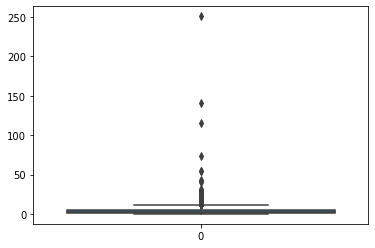

Total Time Spent on Website


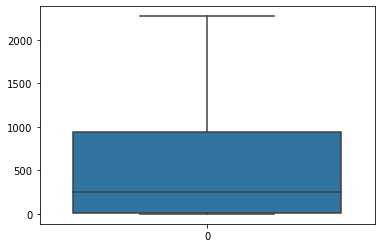

Page Views Per Visit


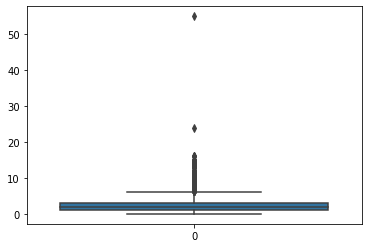

In [8]:
for i in cont_cols:
    print(i)
    sb.boxplot(df[i])
    plt.show()

TotalVisits


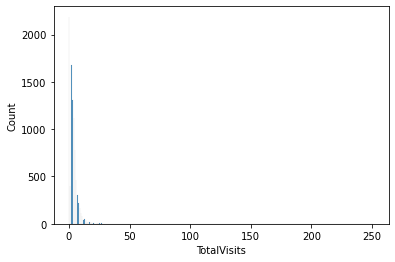

Total Time Spent on Website


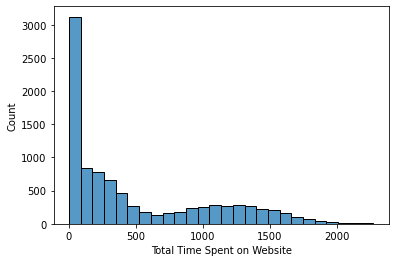

Page Views Per Visit


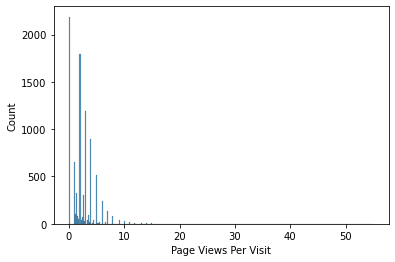

In [9]:
for i in cont_cols:
    print(i)
    sb.histplot(df[i])
    plt.show()

Lead Origin


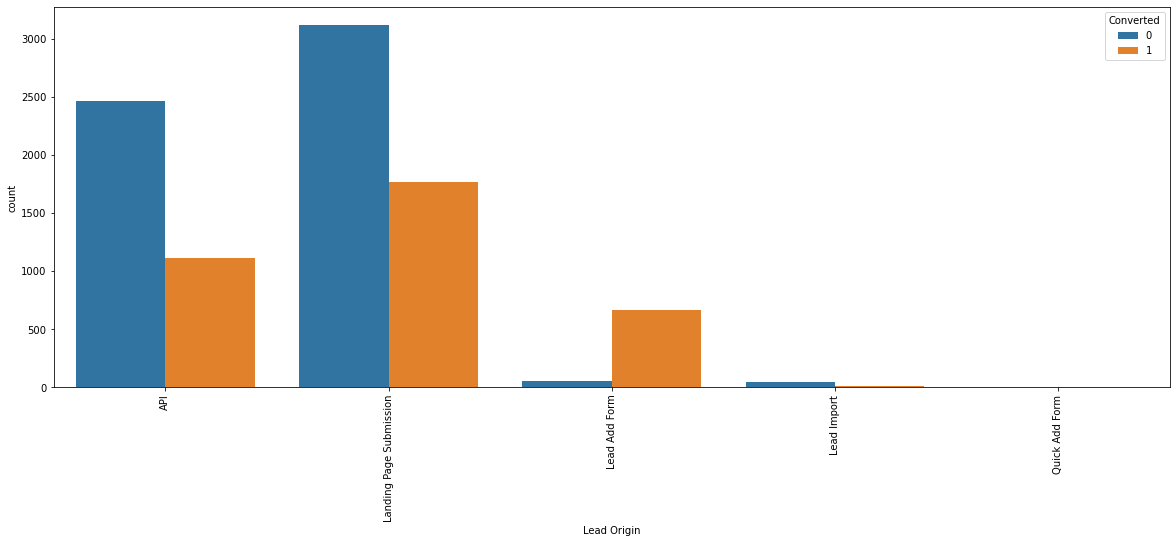

Lead Source


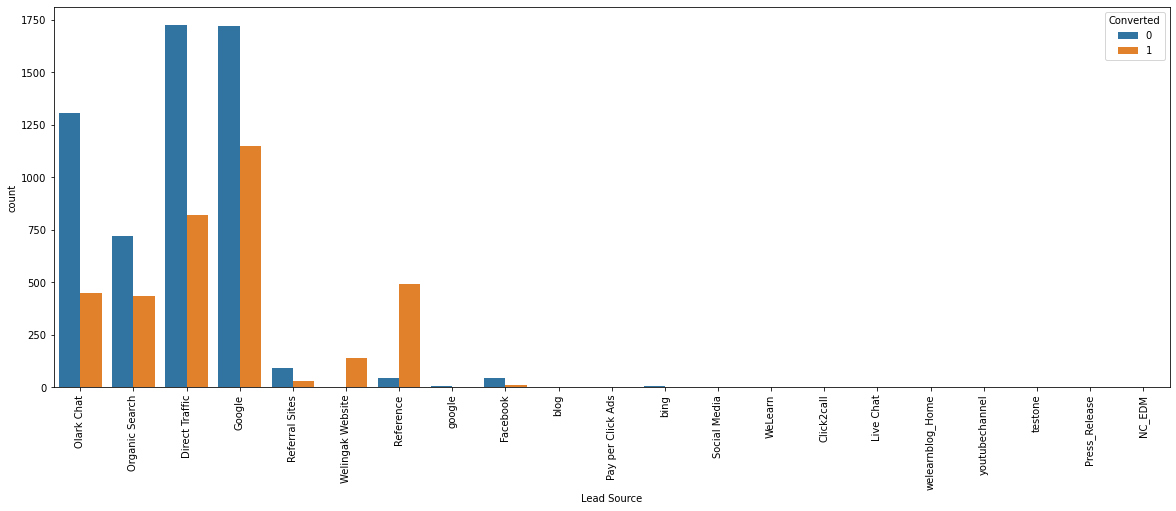

Do Not Email


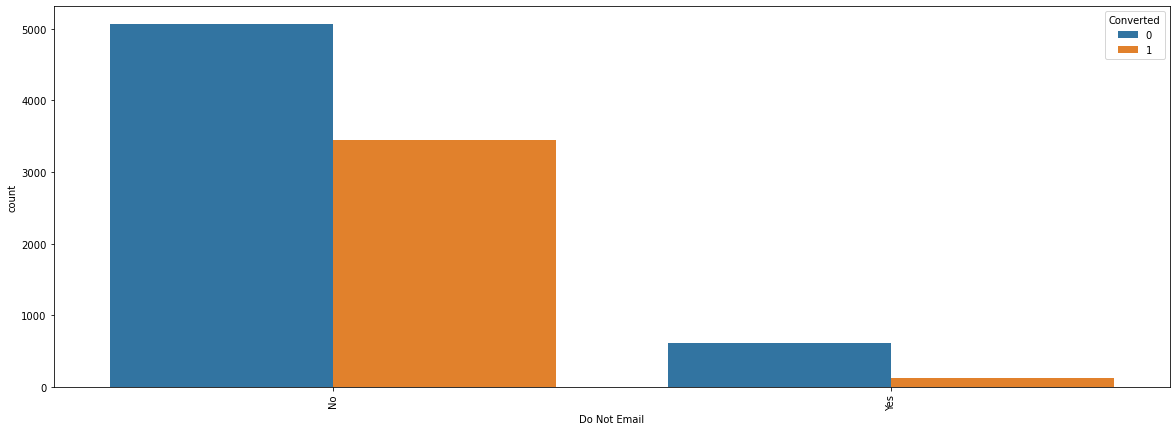

Do Not Call


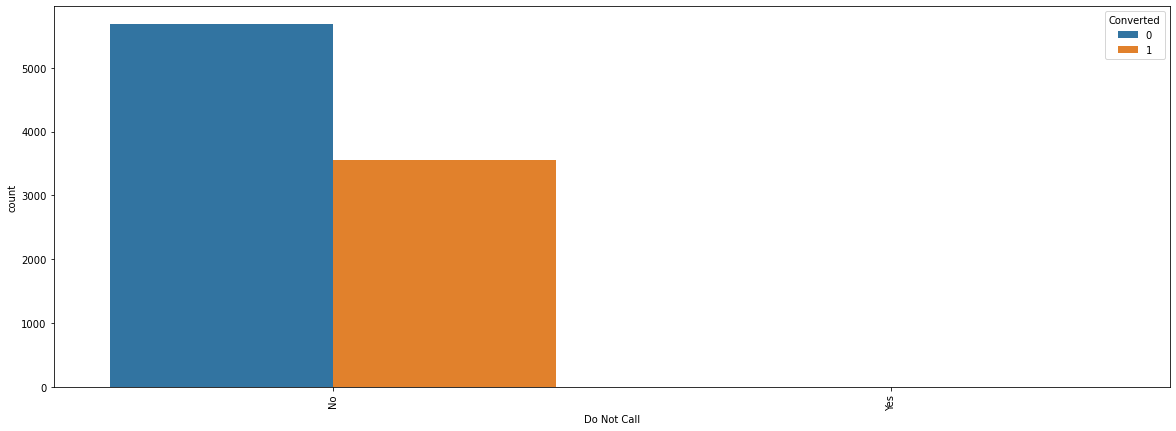

Last Activity


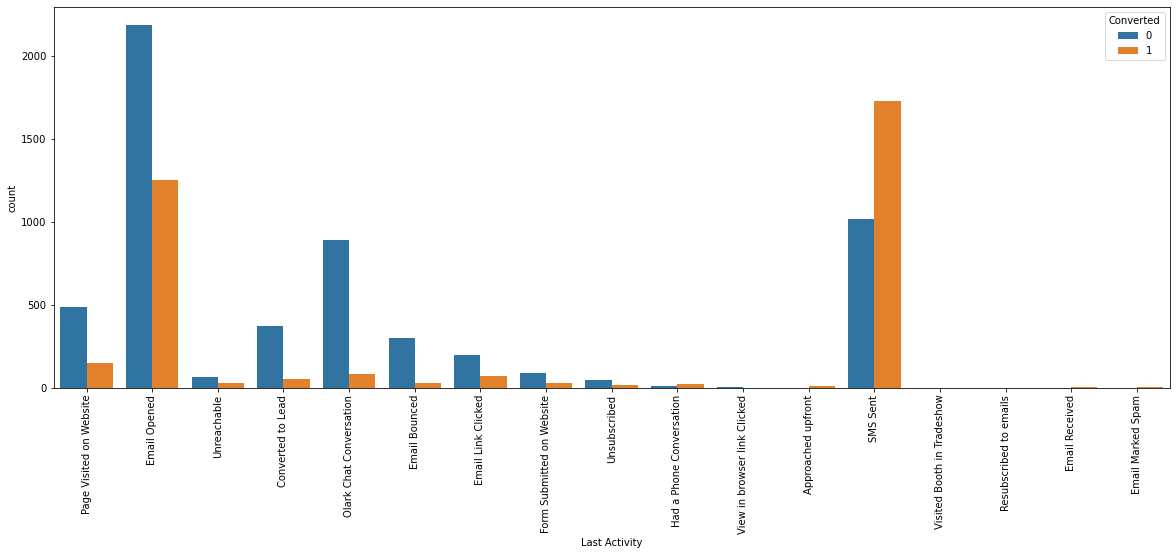

Country


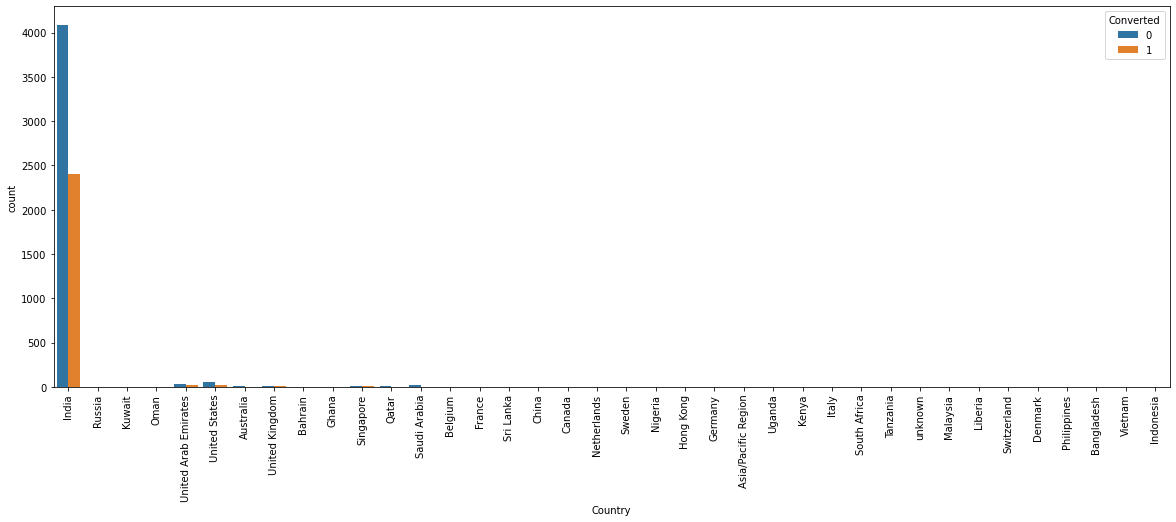

Specialization


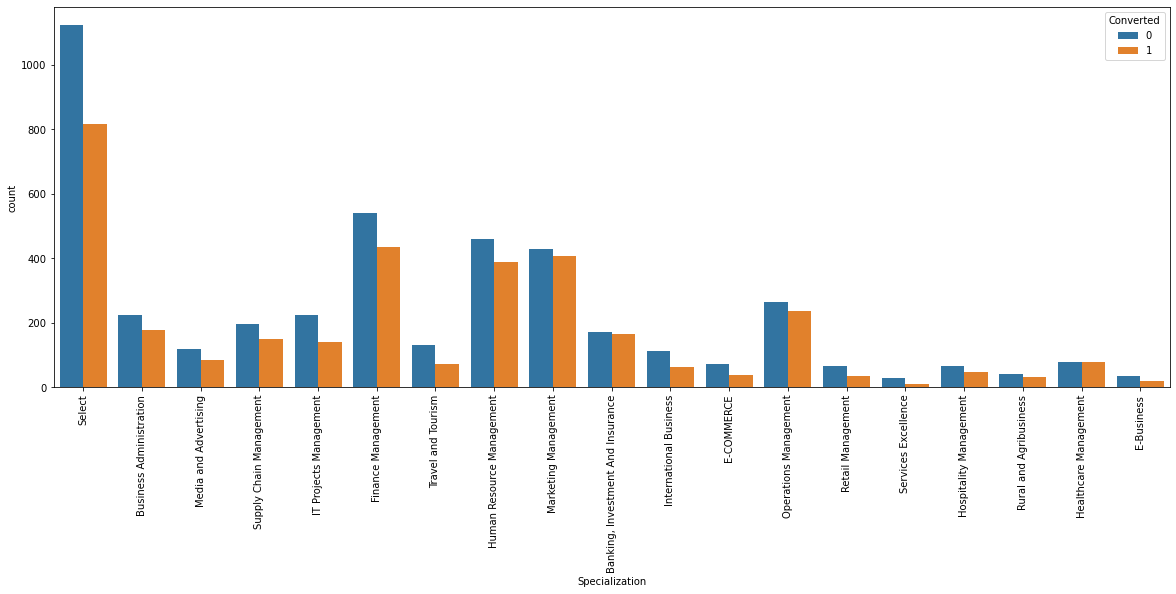

How did you hear about X Education


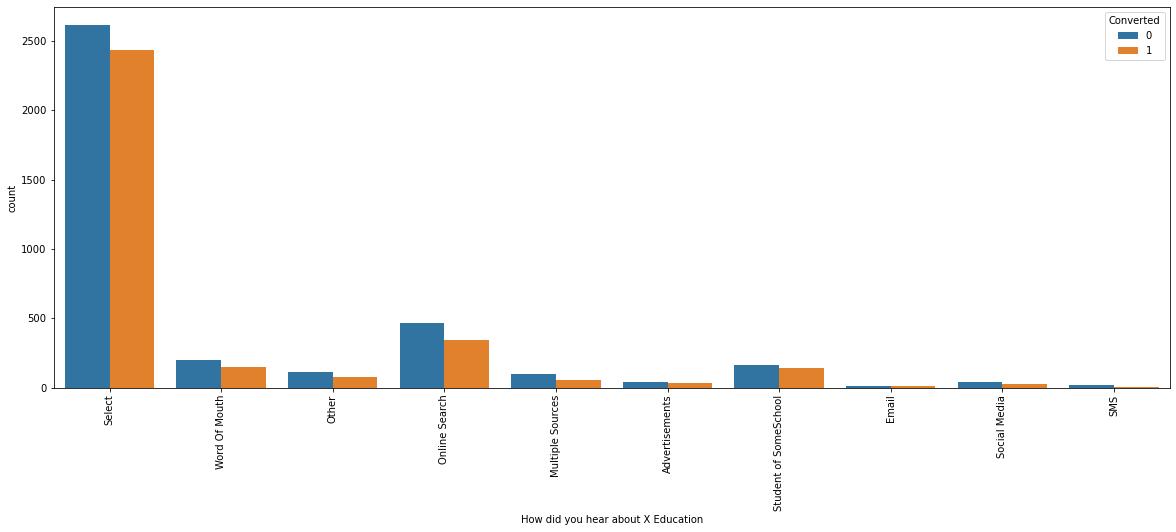

What is your current occupation


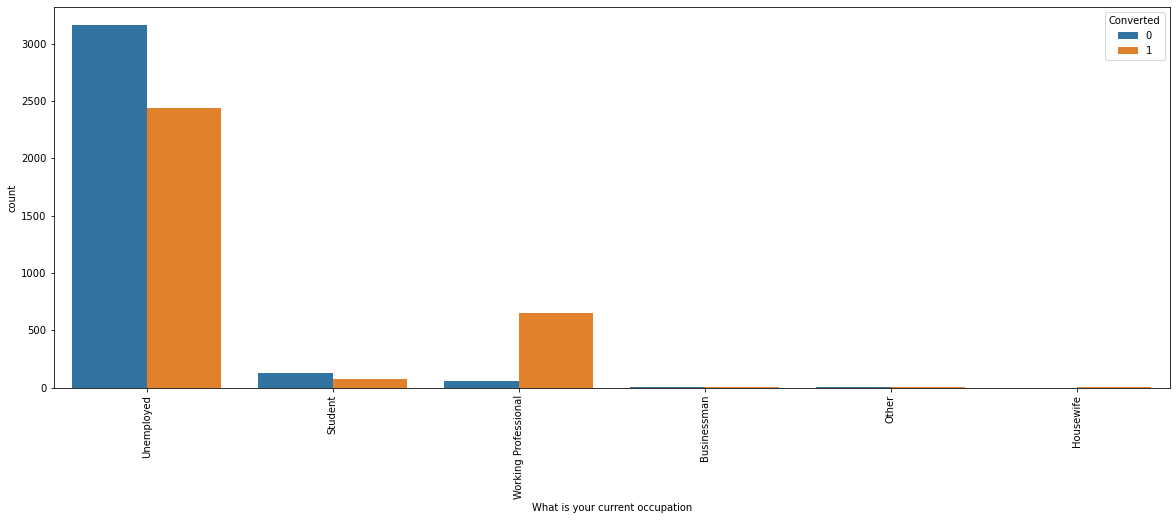

What matters most to you in choosing a course


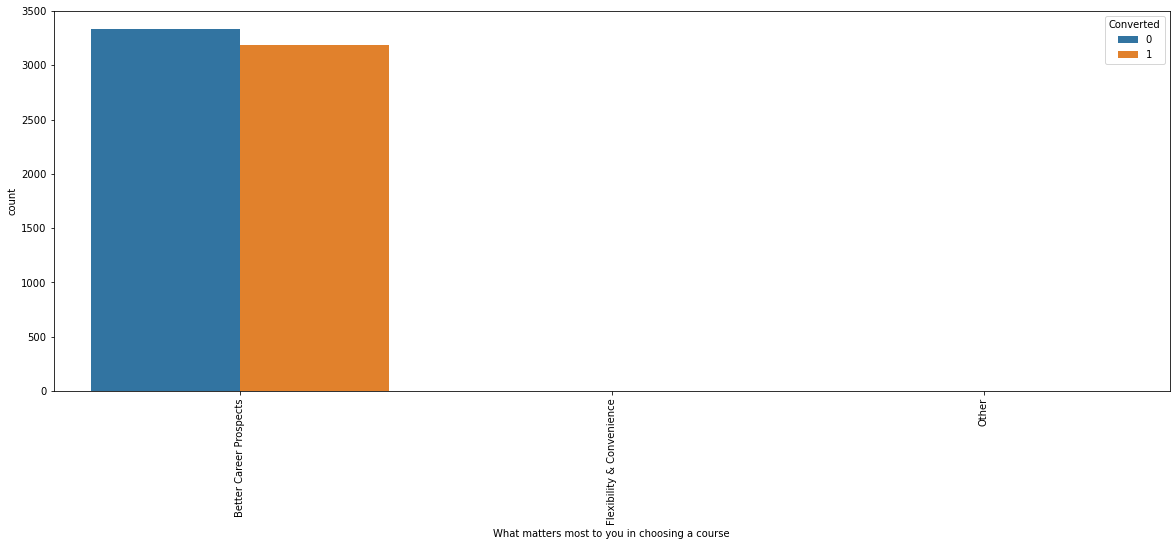

Search


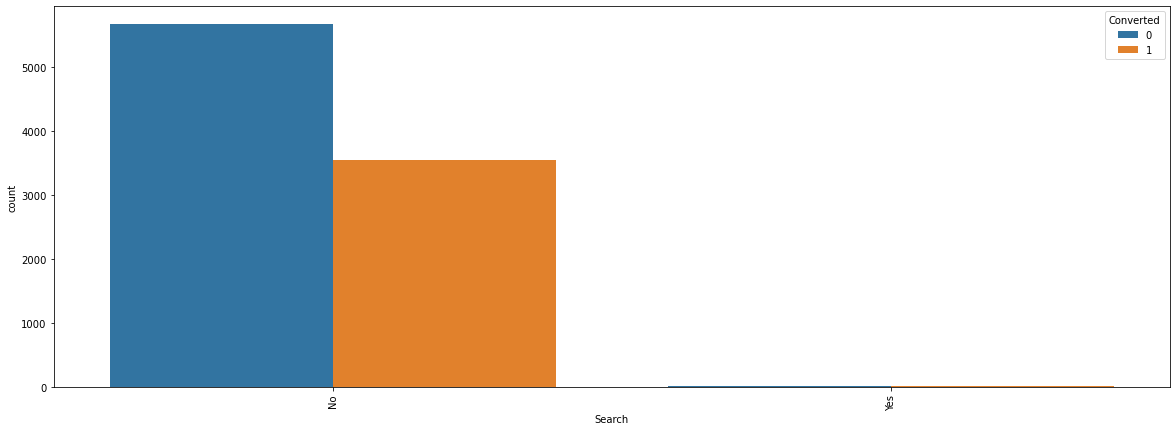

Magazine


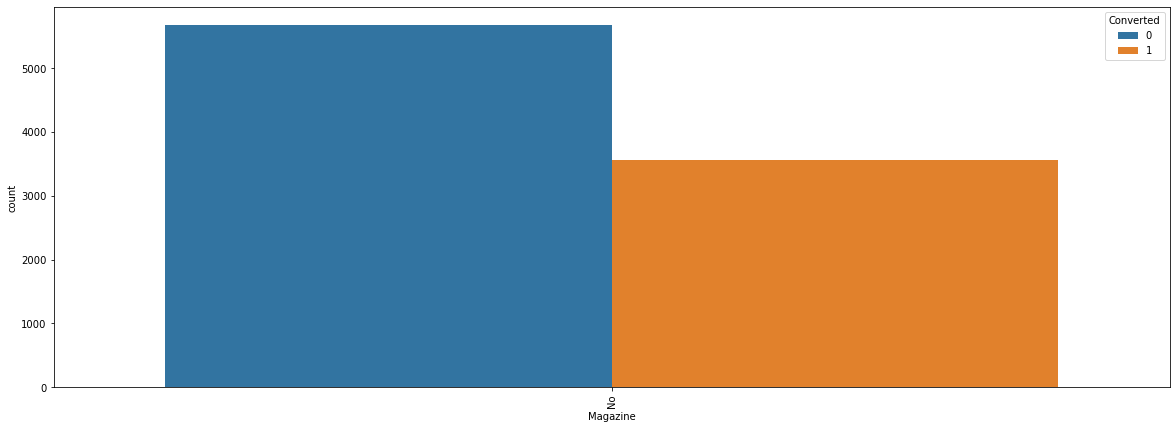

Newspaper Article


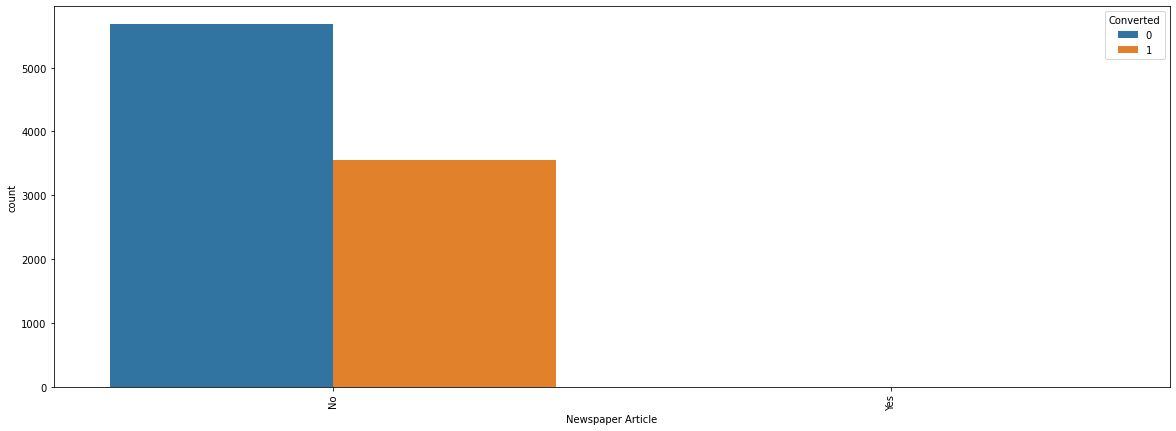

X Education Forums


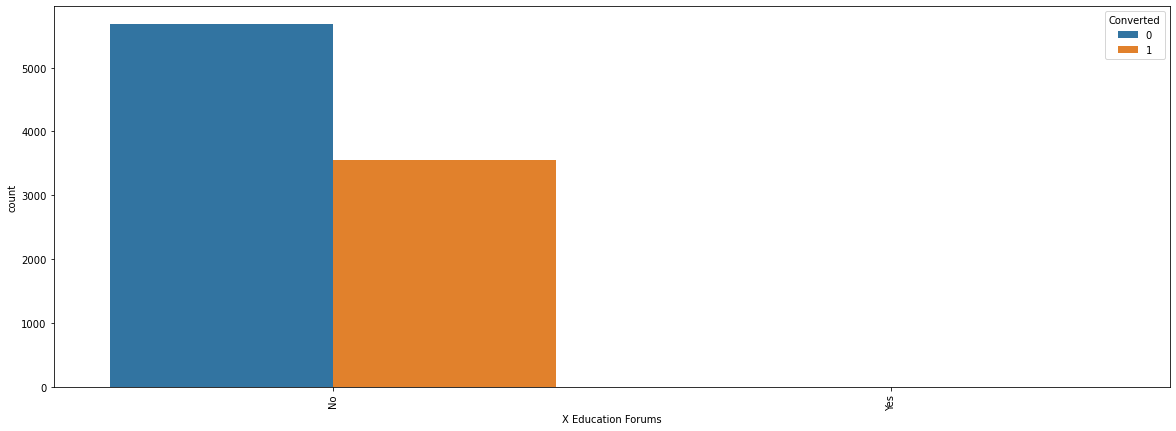

Newspaper


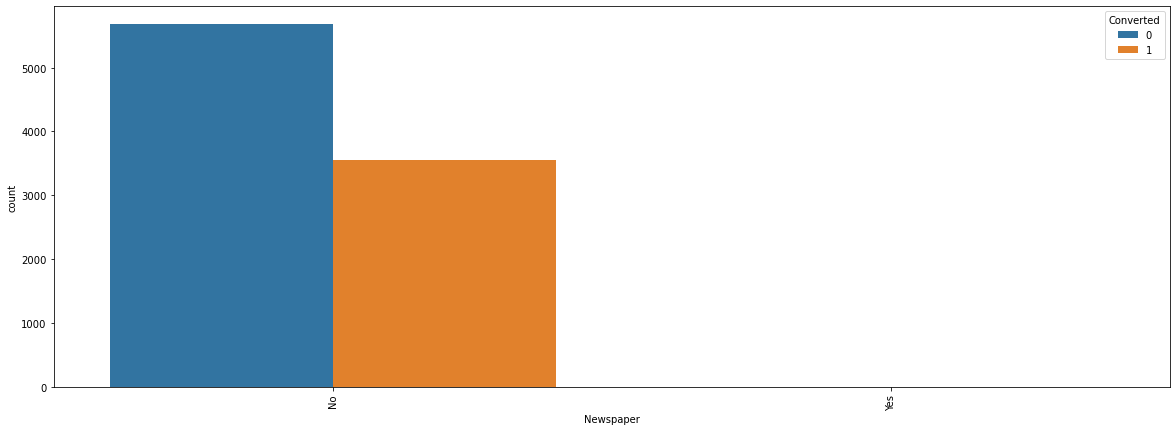

Digital Advertisement


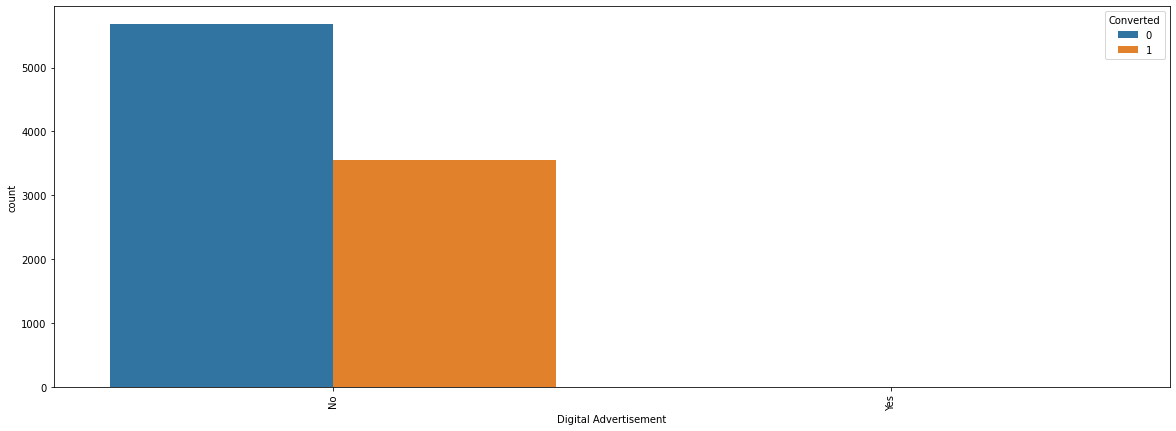

Through Recommendations


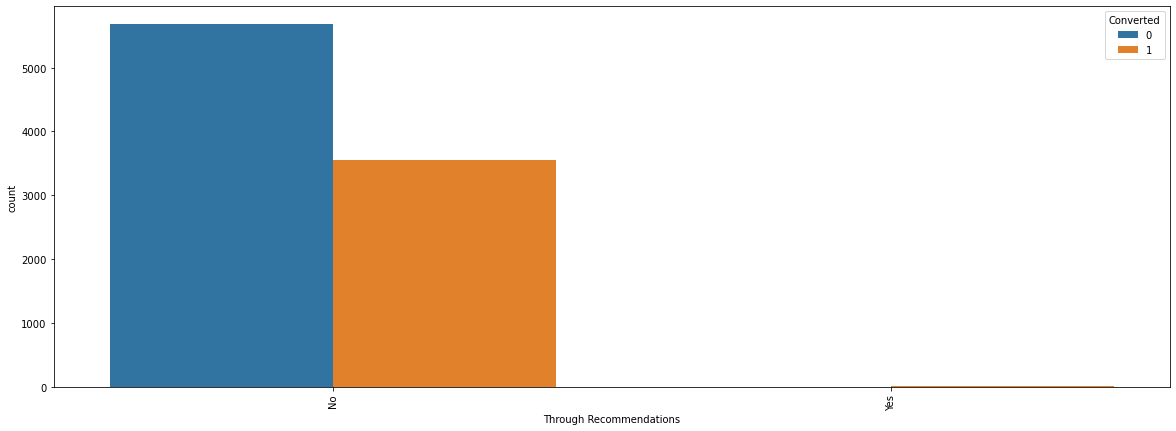

Receive More Updates About Our Courses


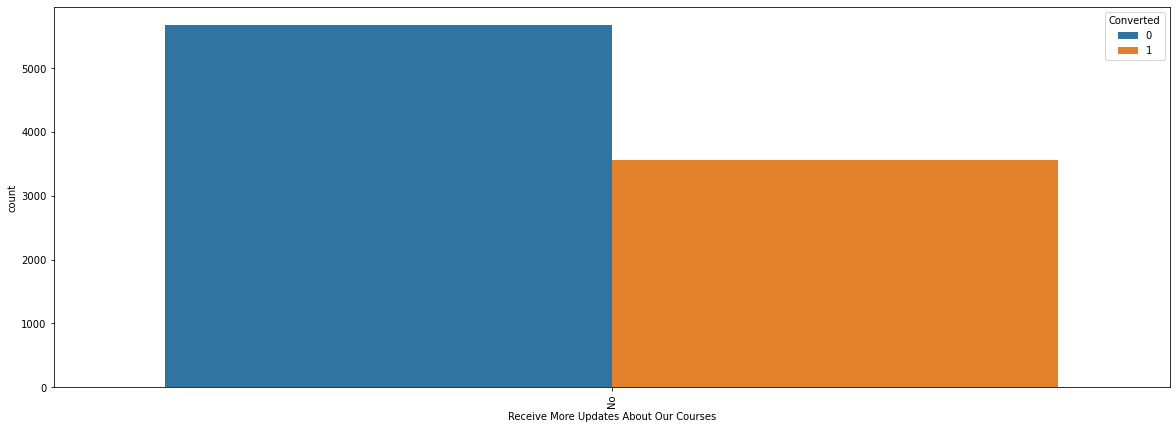

Tags


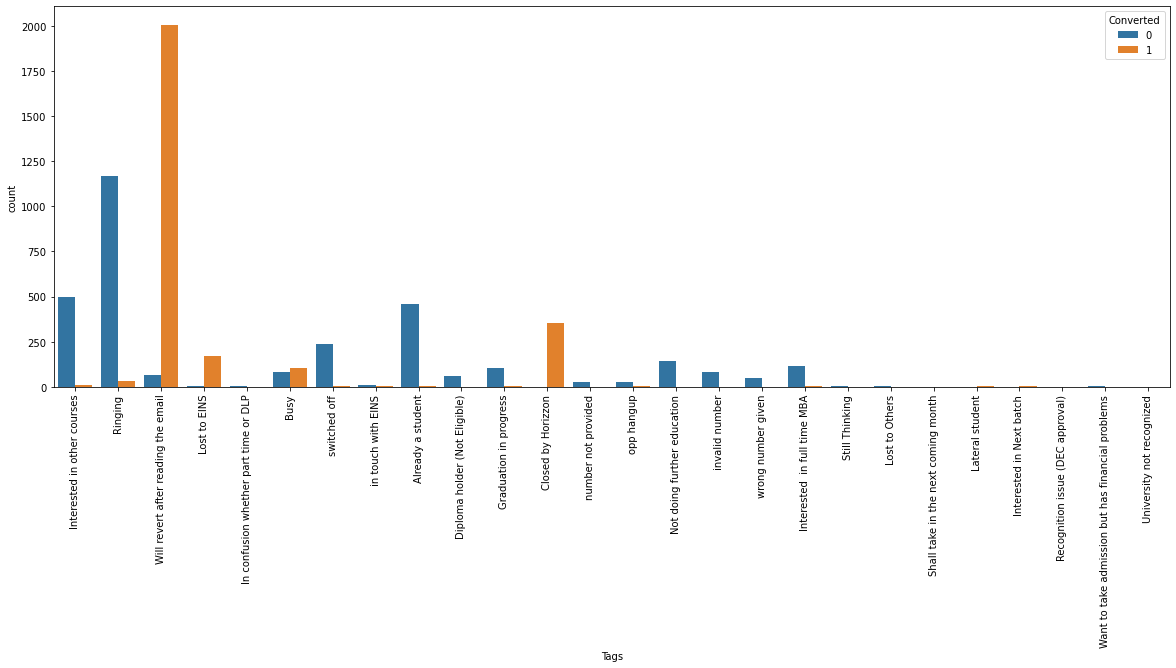

Lead Quality


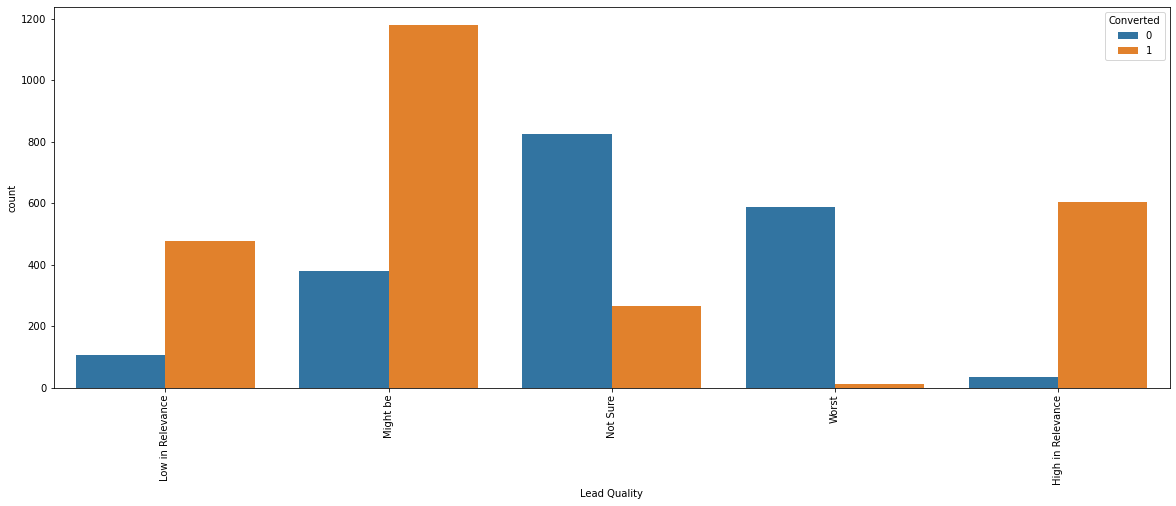

Update me on Supply Chain Content


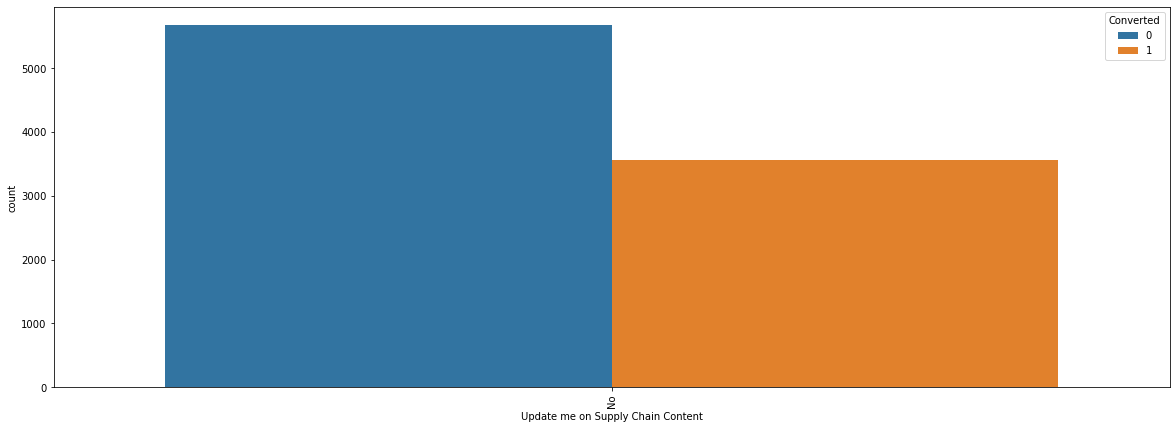

Get updates on DM Content


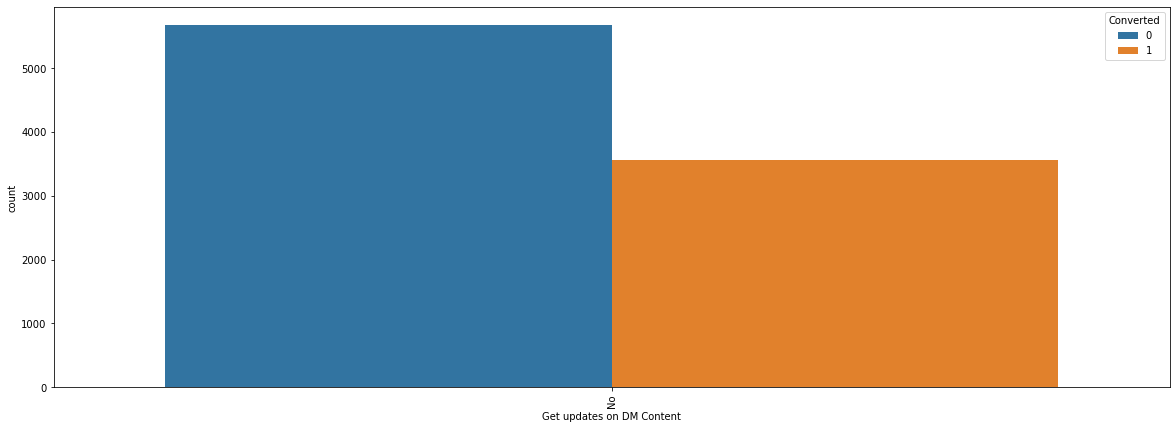

Lead Profile


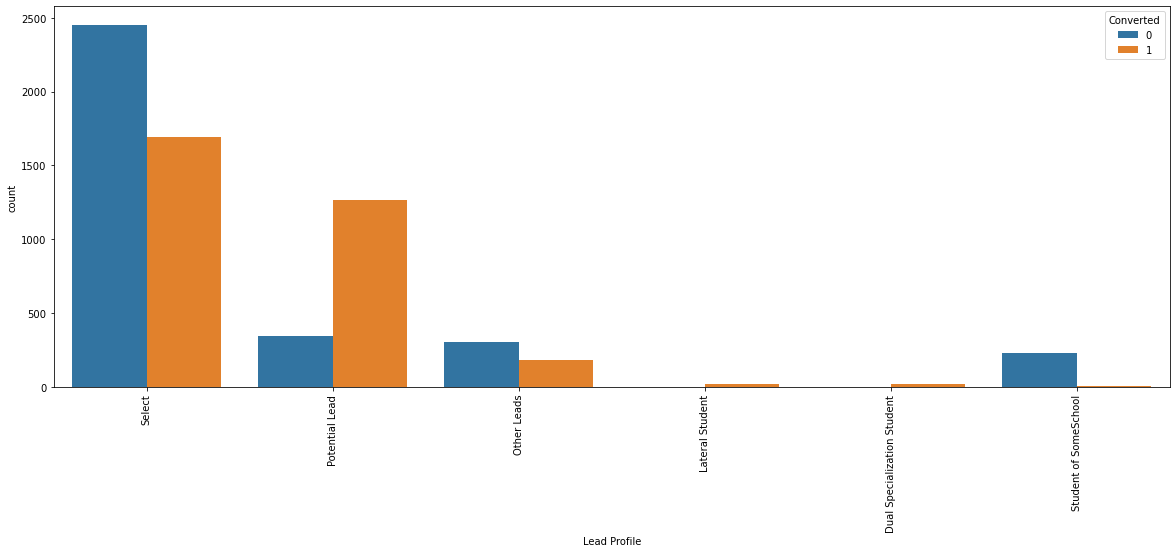

City


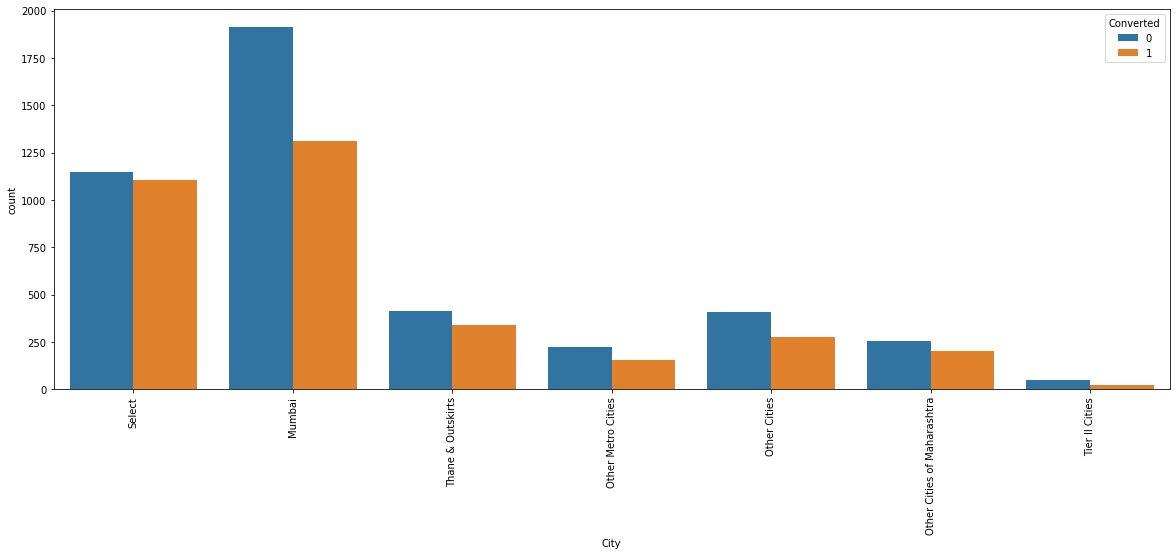

I agree to pay the amount through cheque


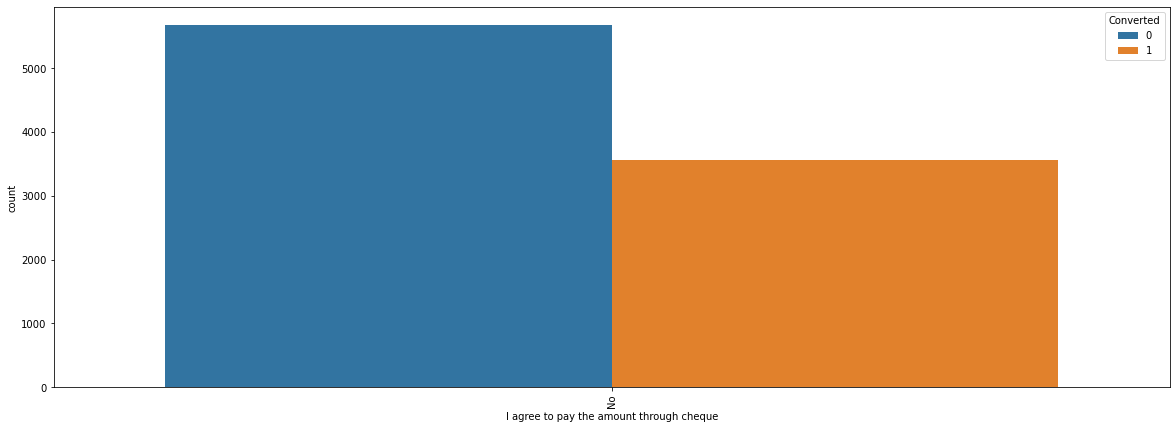

A free copy of Mastering The Interview


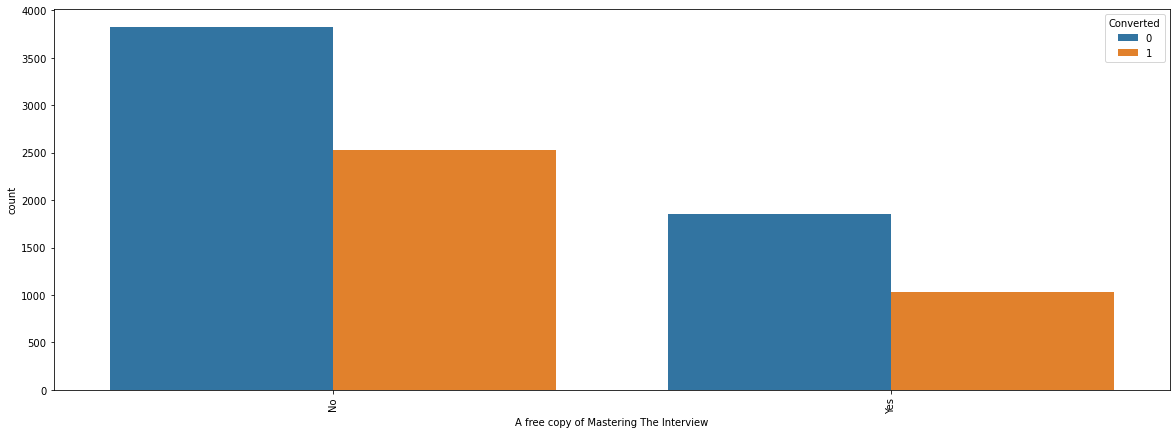

Last Notable Activity


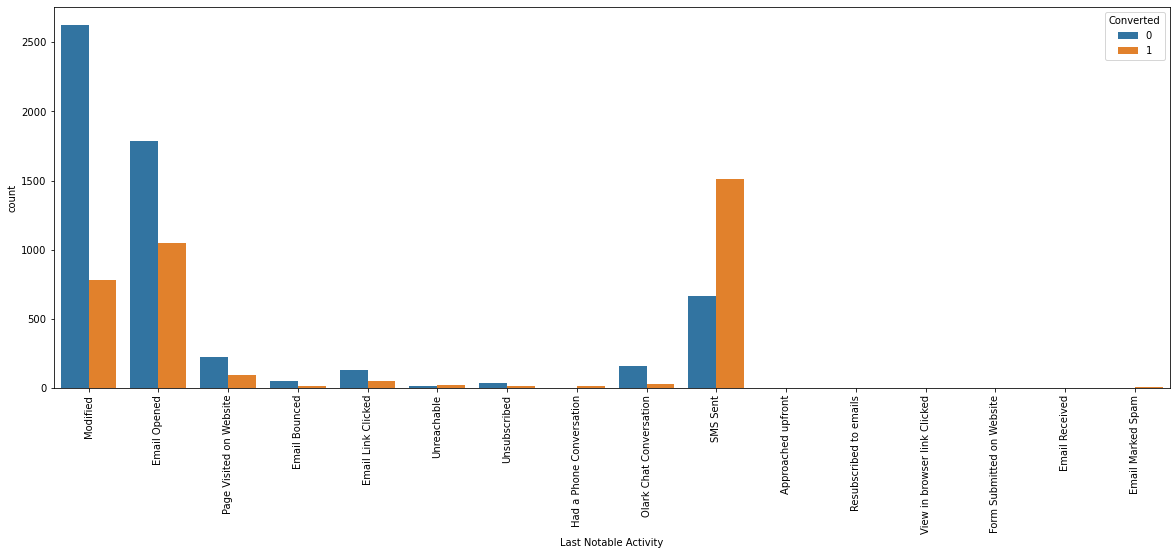

In [10]:
for i in cat_cols:
    print(i)
    plt.figure(figsize=(20, 7))
    sb.countplot(data=df, x=i, hue='Converted')
    plt.xticks(rotation=90)
    plt.show()

#### INFERENCES
##### 1) Lead Add form has the highest conversion rate among all other lead origin.
##### 2) Reference Lead source has the best rate of conversion.
##### 3) SMS sent last activity has highest rate of conversion.
##### 4) Mostly customers not selected any specialization.
##### 5) Mostly customers hear about x education on online search.
##### 6) Mostly customers are umemployed.

### Bivariate Analysis

Boxplot TotalVisits Vs Lead Origin


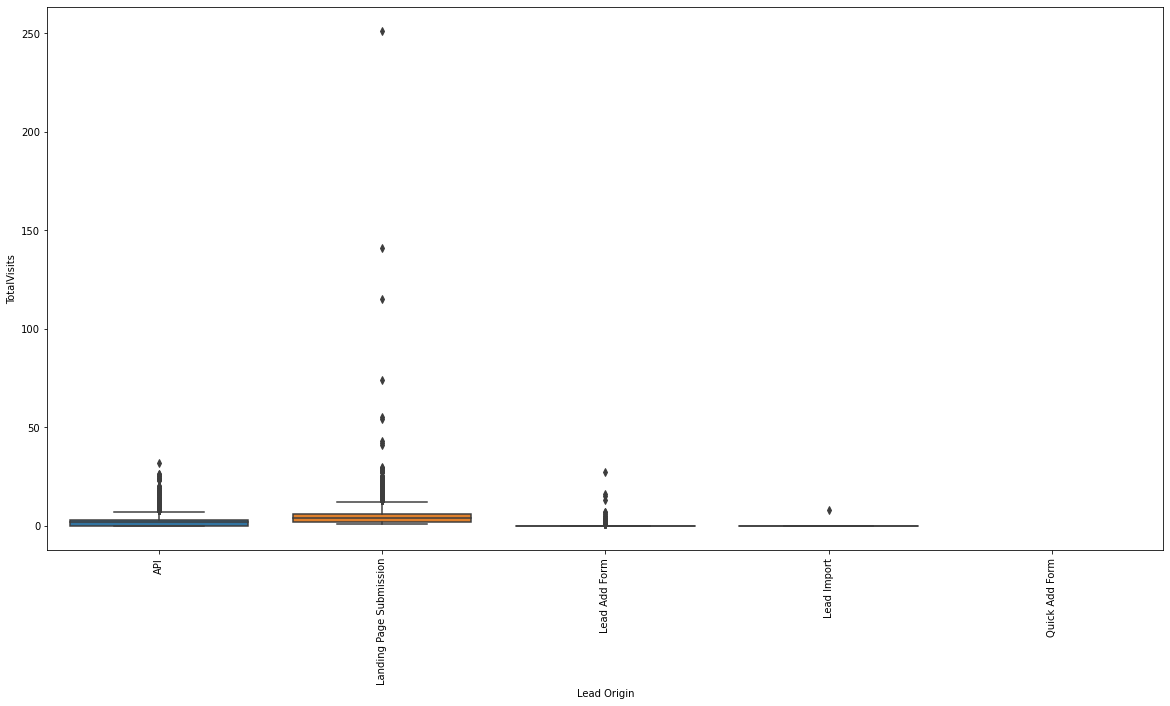

Boxplot TotalVisits Vs Lead Source


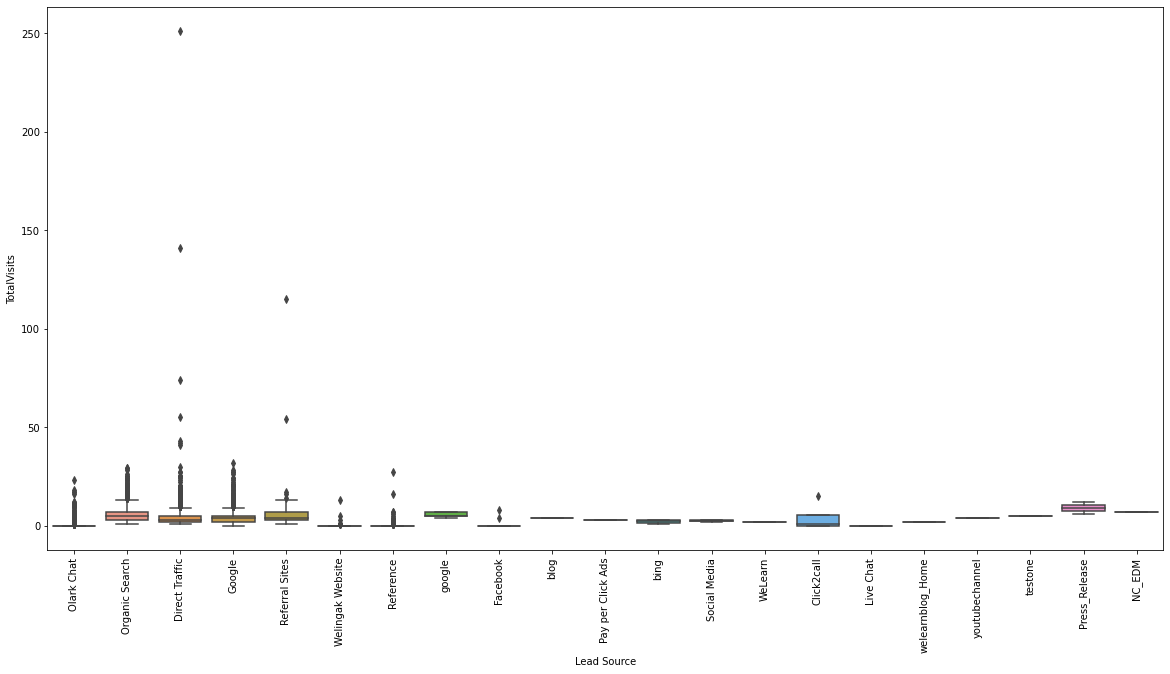

Boxplot TotalVisits Vs Do Not Email


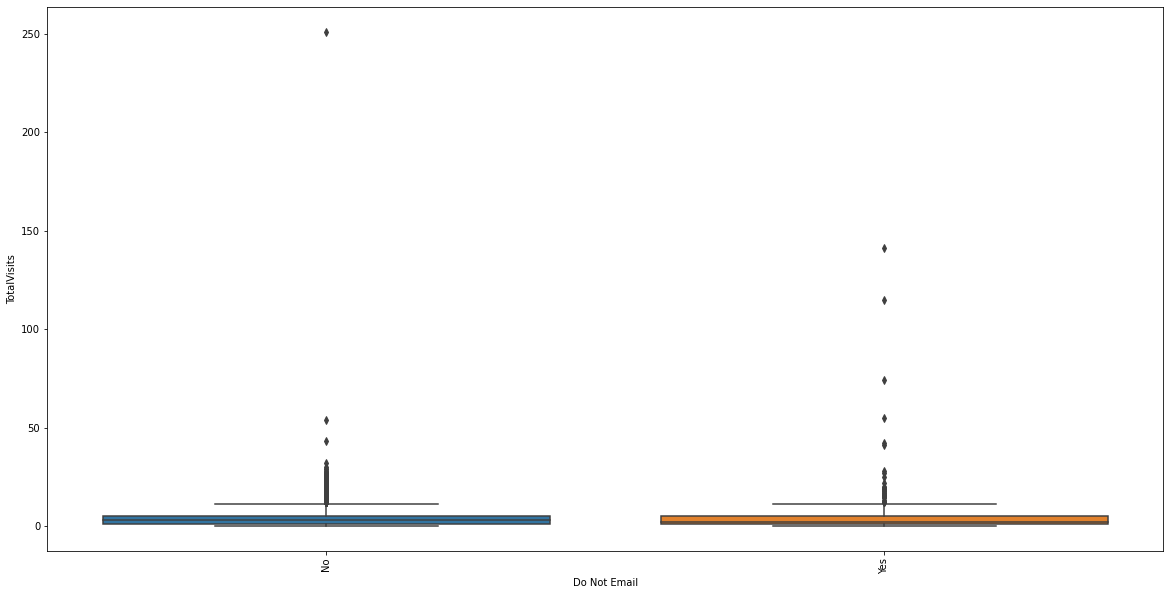

Boxplot TotalVisits Vs Do Not Call


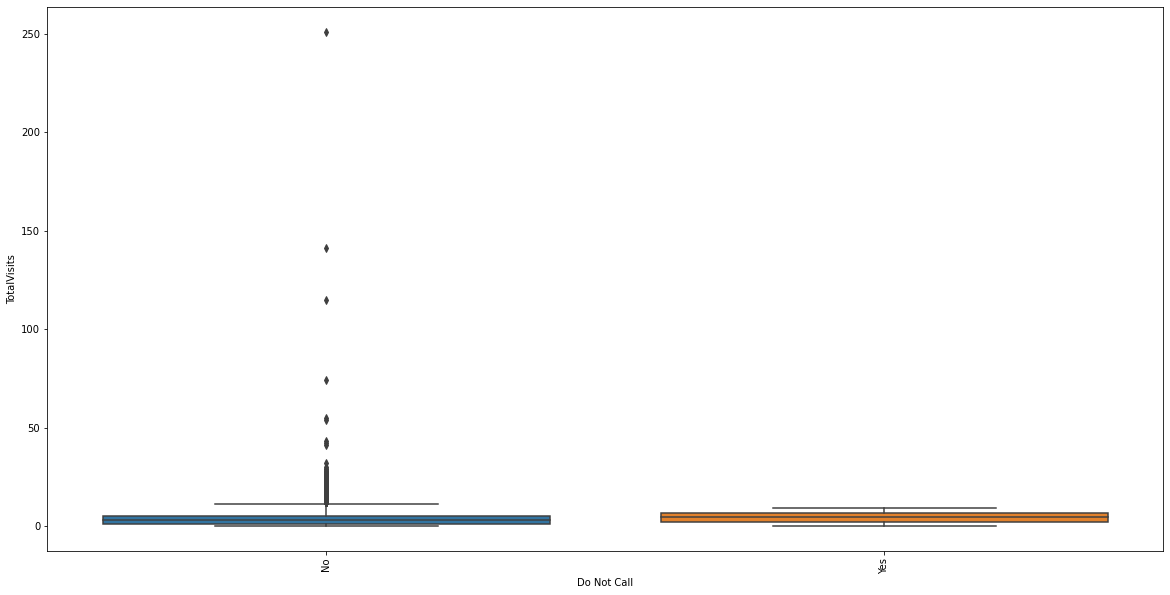

Boxplot TotalVisits Vs Last Activity


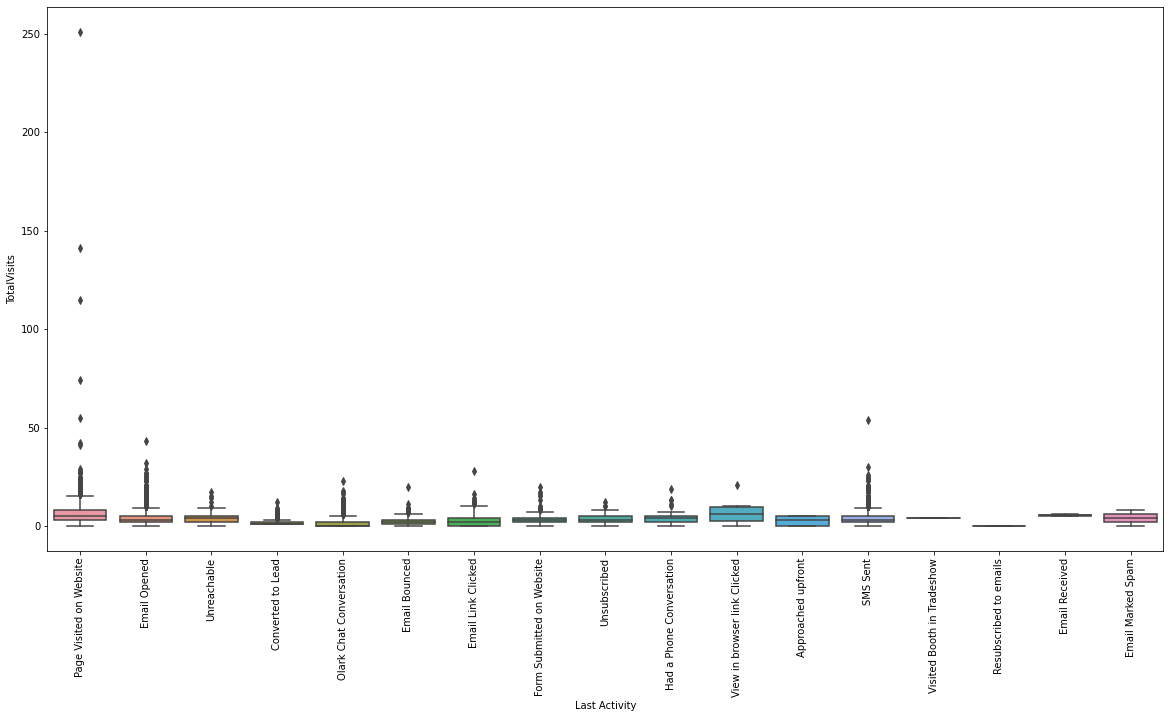

Boxplot TotalVisits Vs Country


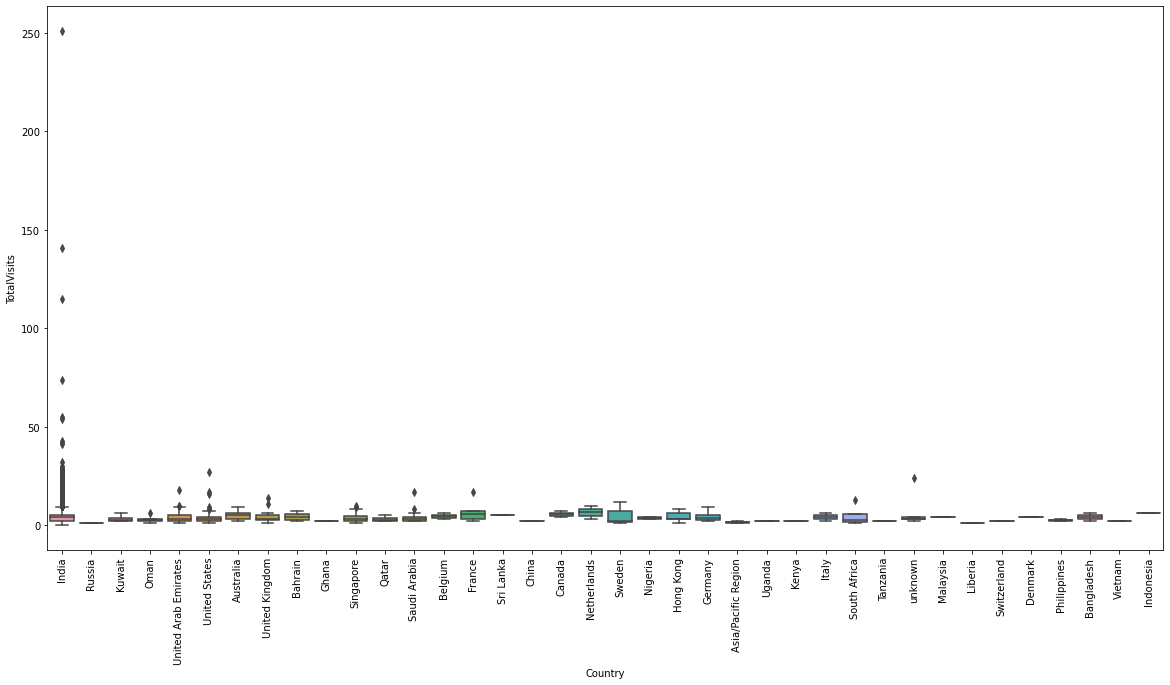

Boxplot TotalVisits Vs Specialization


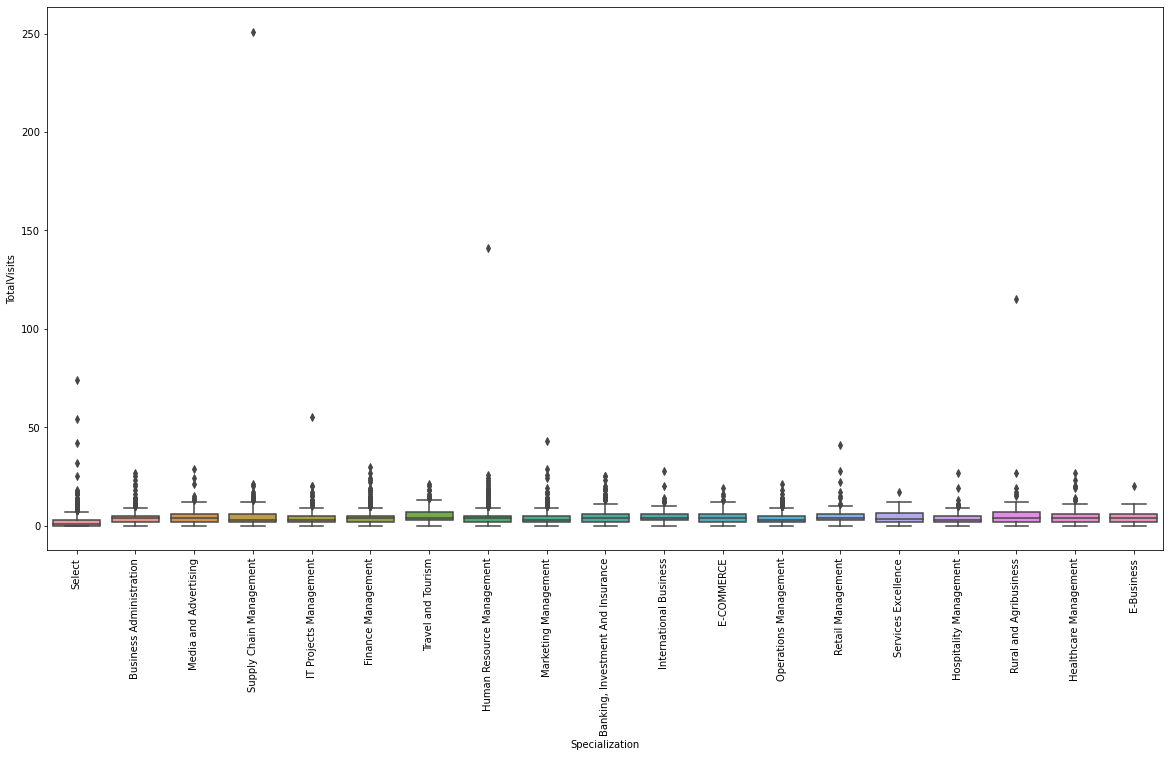

Boxplot TotalVisits Vs How did you hear about X Education


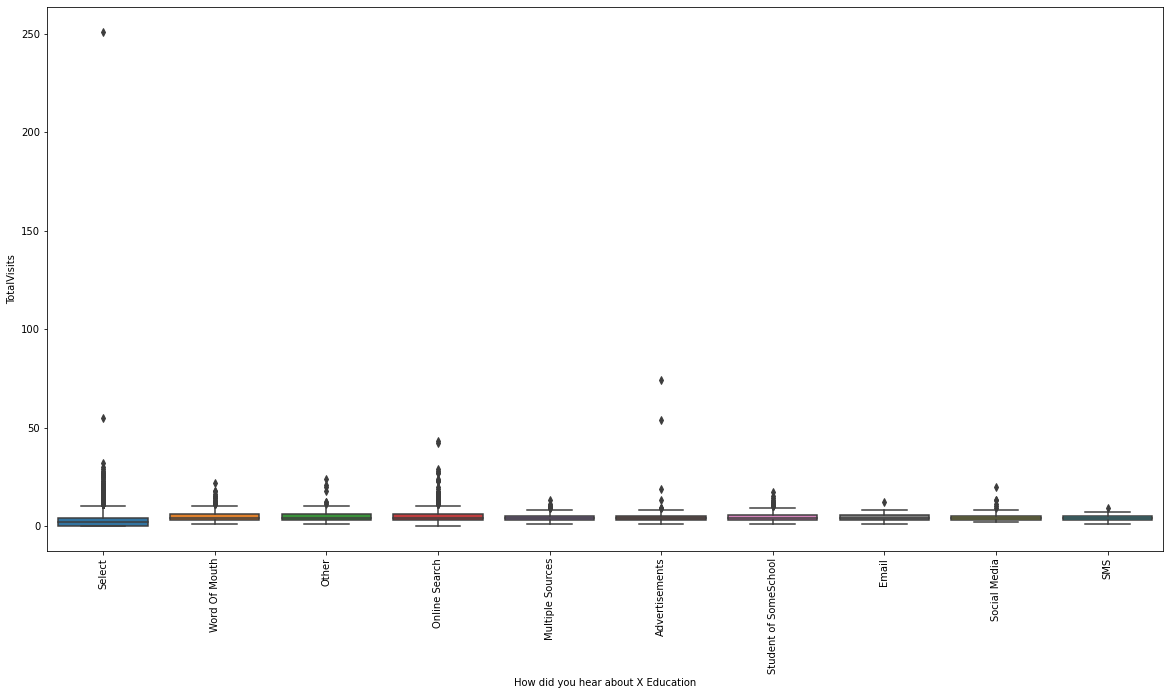

Boxplot TotalVisits Vs What is your current occupation


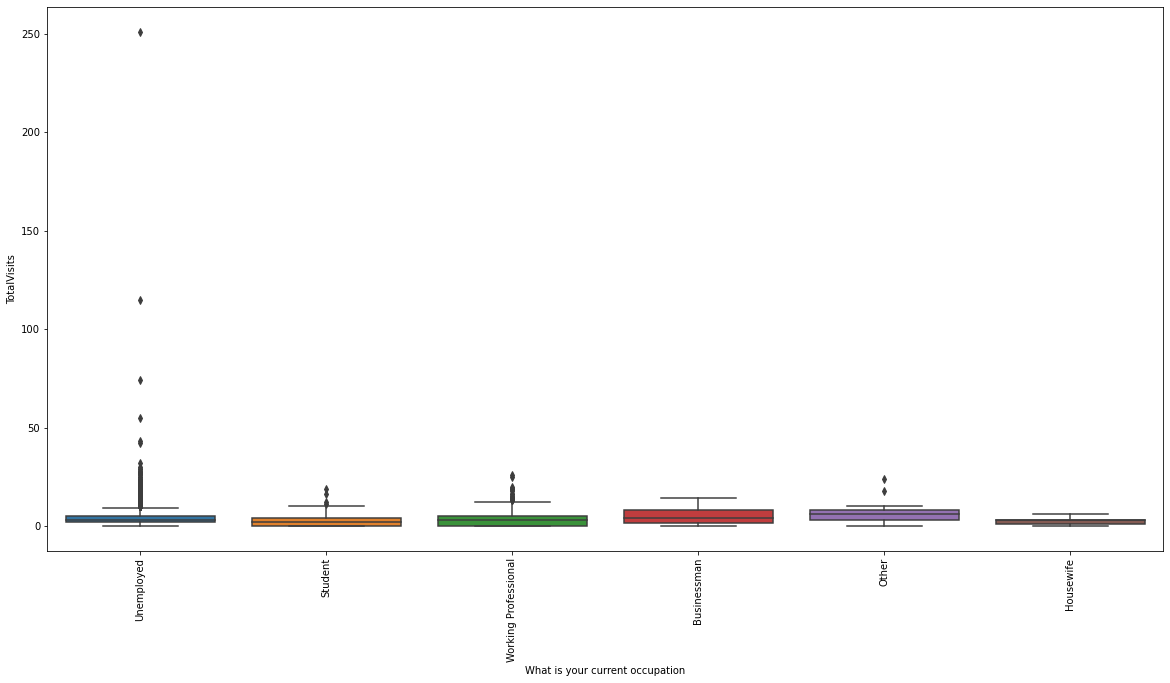

Boxplot TotalVisits Vs What matters most to you in choosing a course


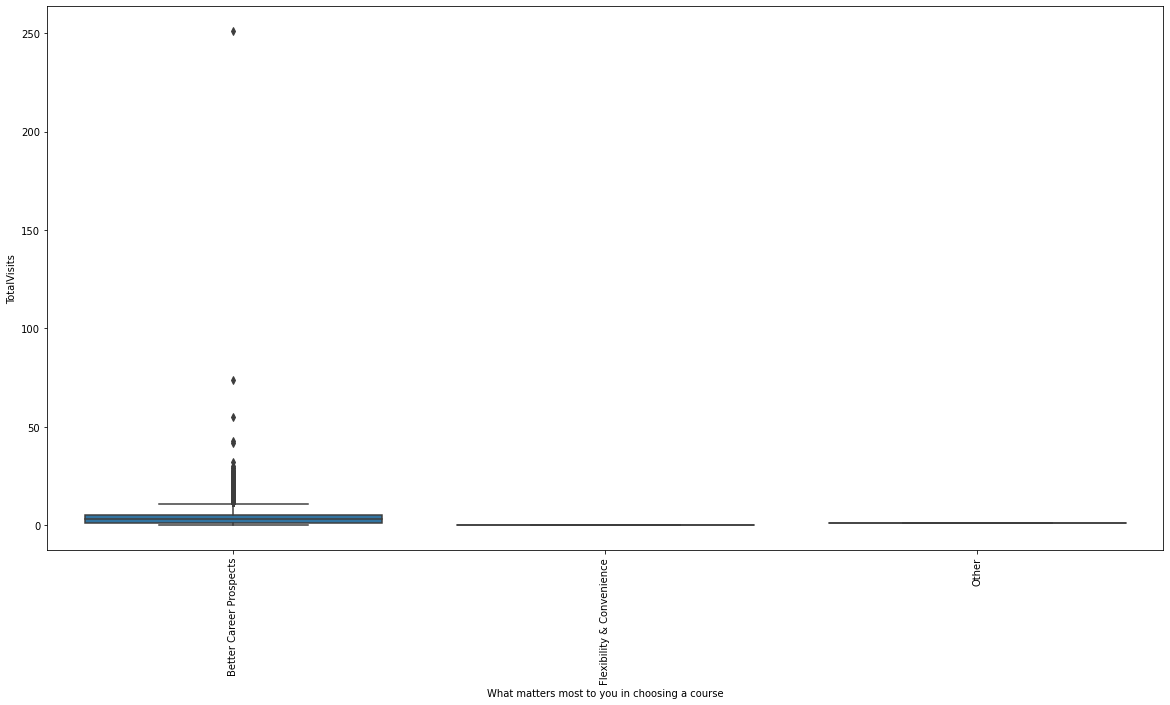

Boxplot TotalVisits Vs Search


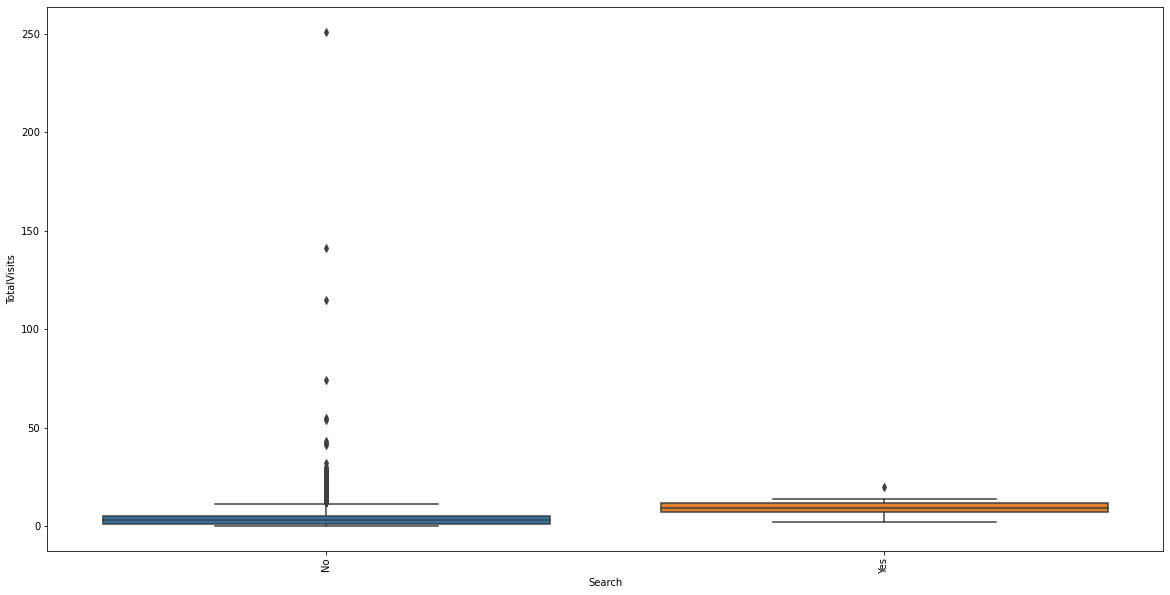

Boxplot TotalVisits Vs Magazine


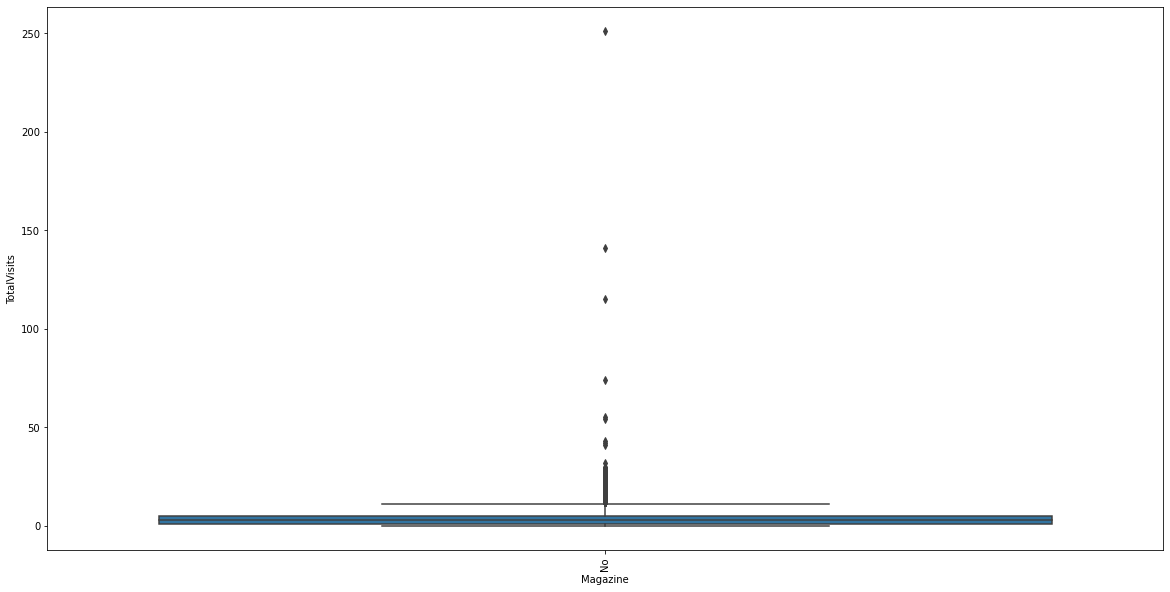

Boxplot TotalVisits Vs Newspaper Article


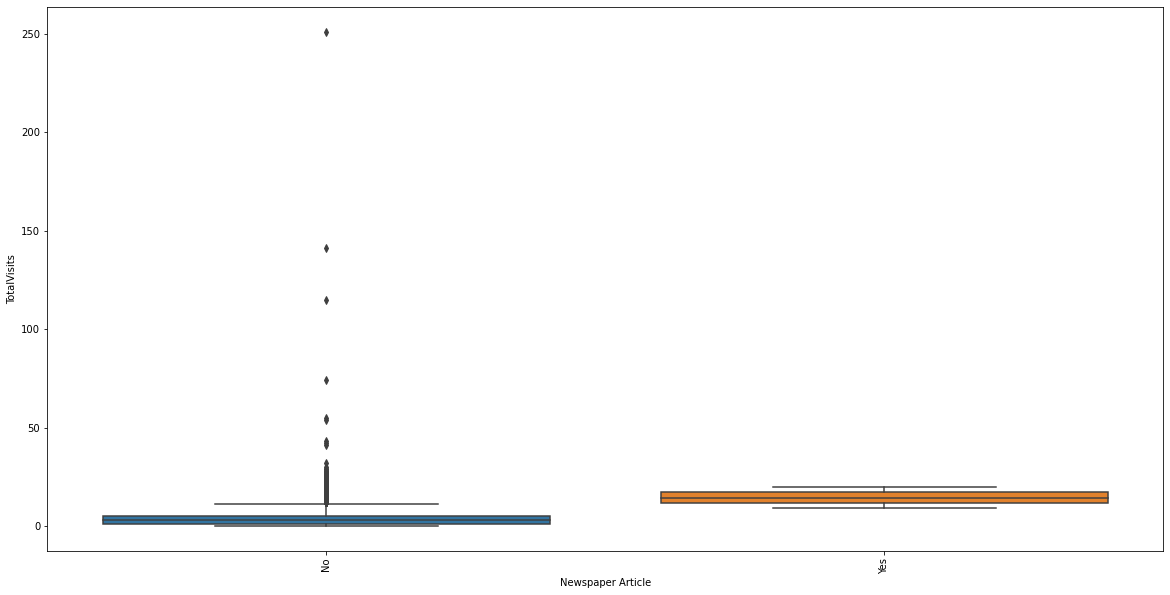

Boxplot TotalVisits Vs X Education Forums


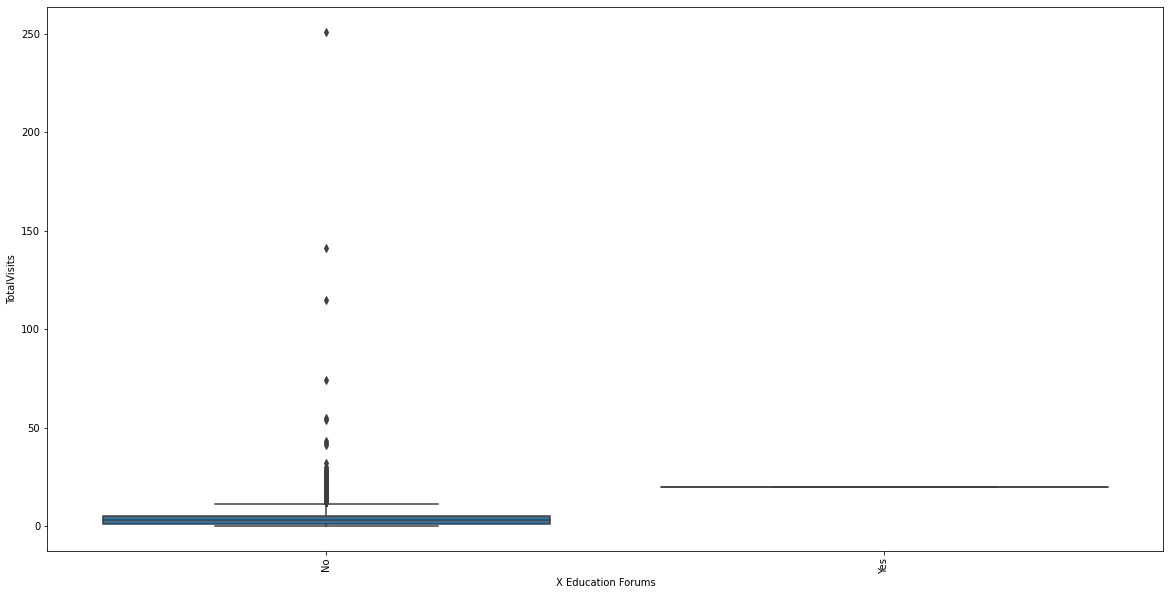

Boxplot TotalVisits Vs Newspaper


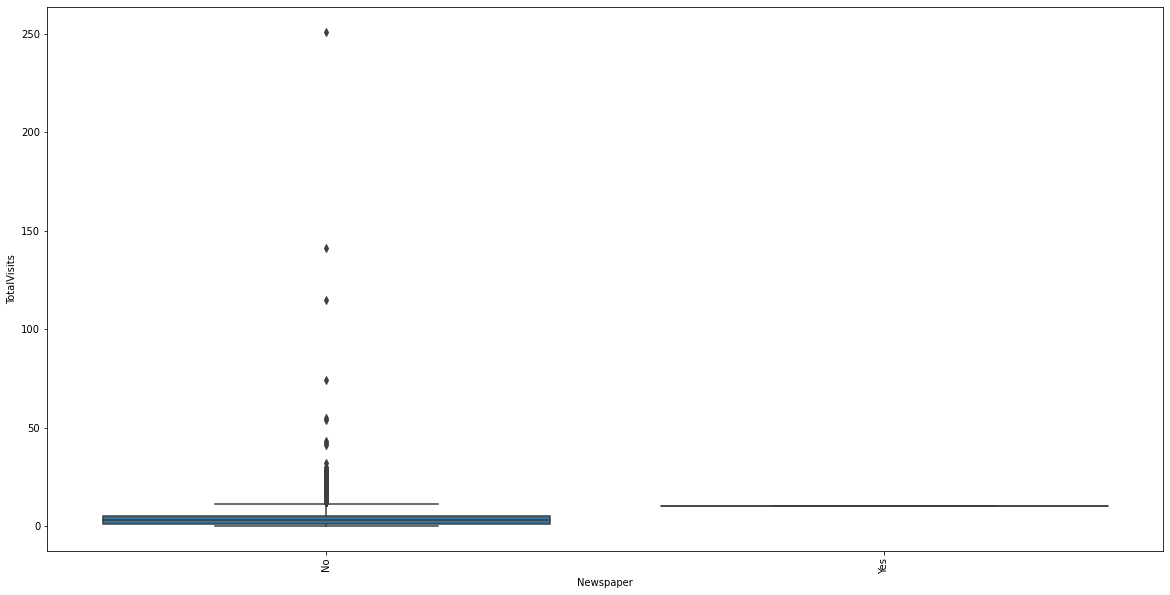

Boxplot TotalVisits Vs Digital Advertisement


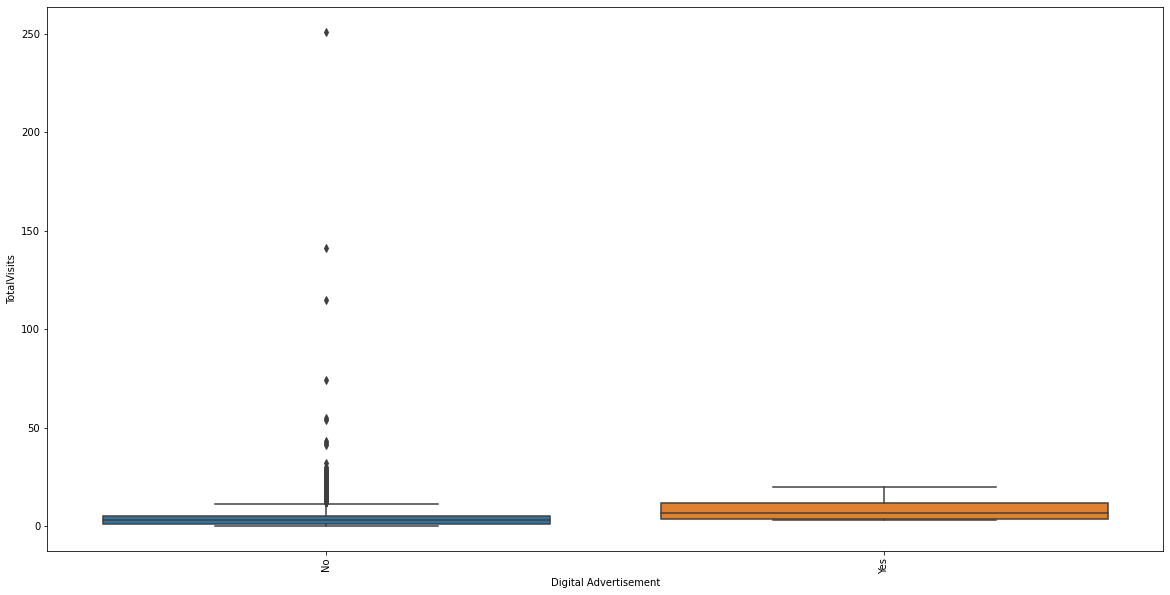

Boxplot TotalVisits Vs Through Recommendations


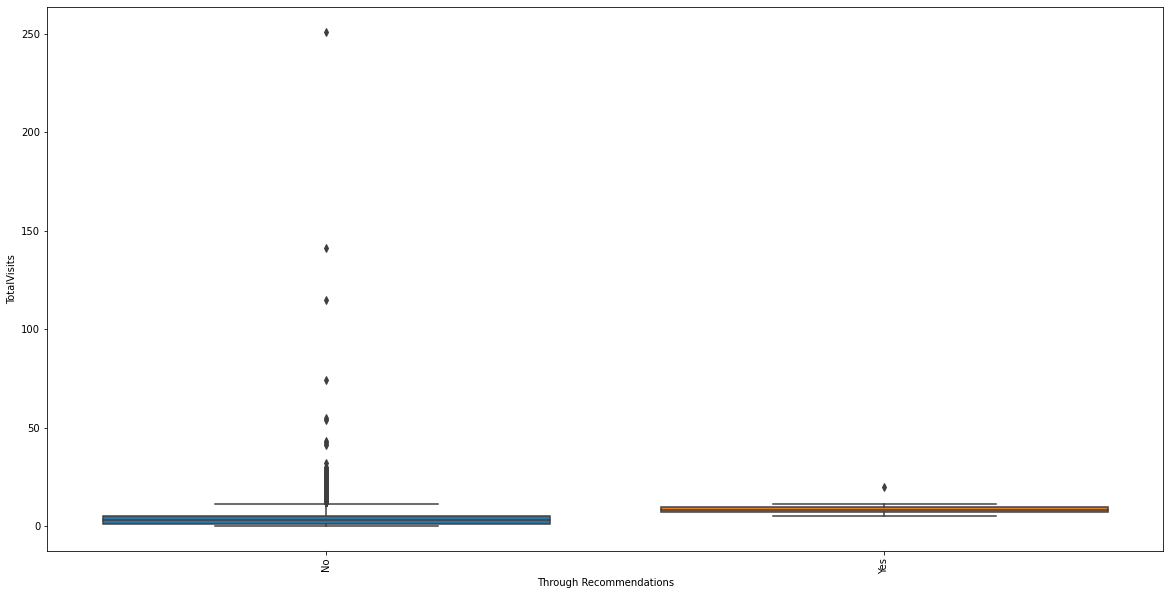

Boxplot TotalVisits Vs Receive More Updates About Our Courses


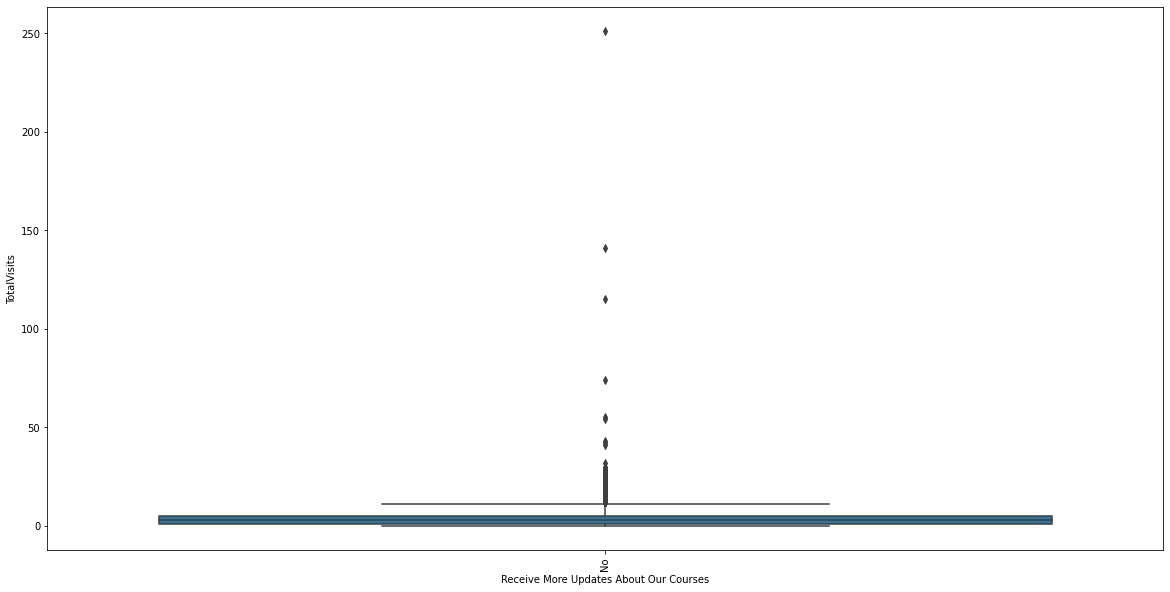

Boxplot TotalVisits Vs Tags


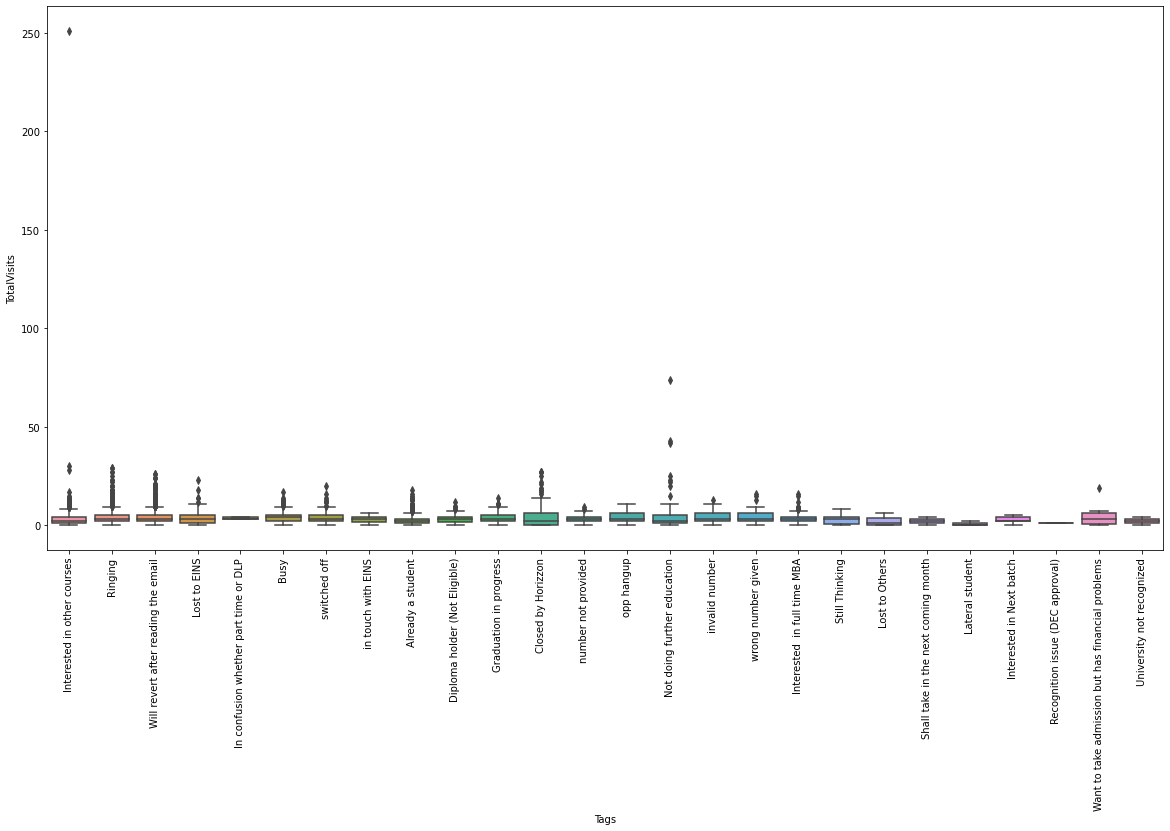

Boxplot TotalVisits Vs Lead Quality


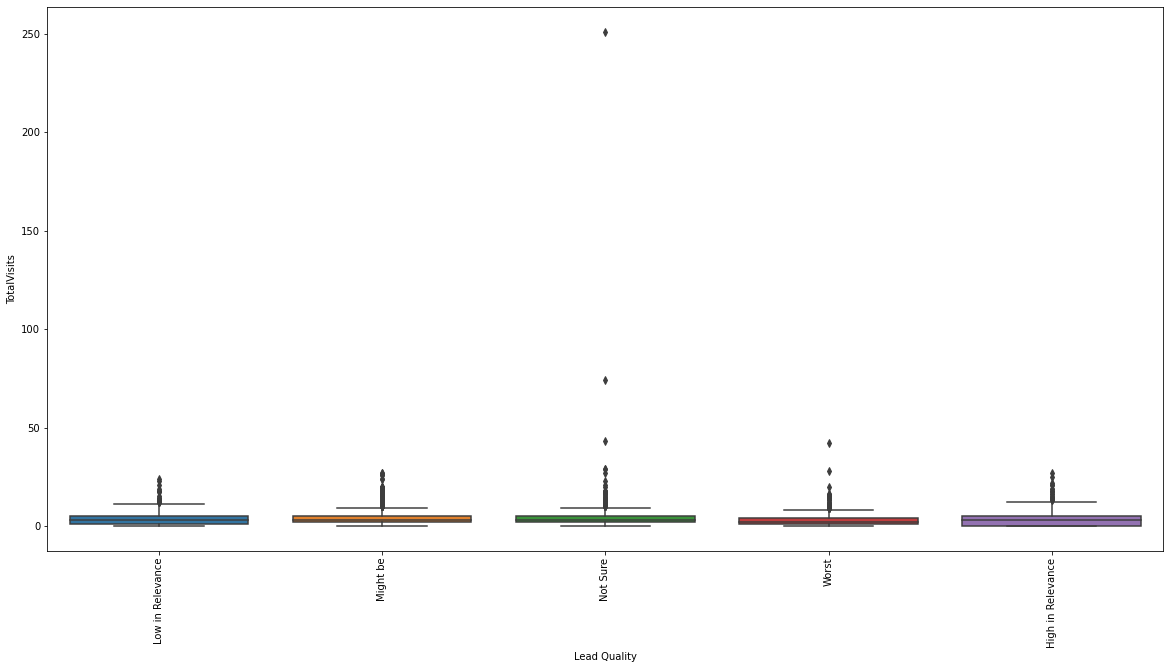

Boxplot TotalVisits Vs Update me on Supply Chain Content


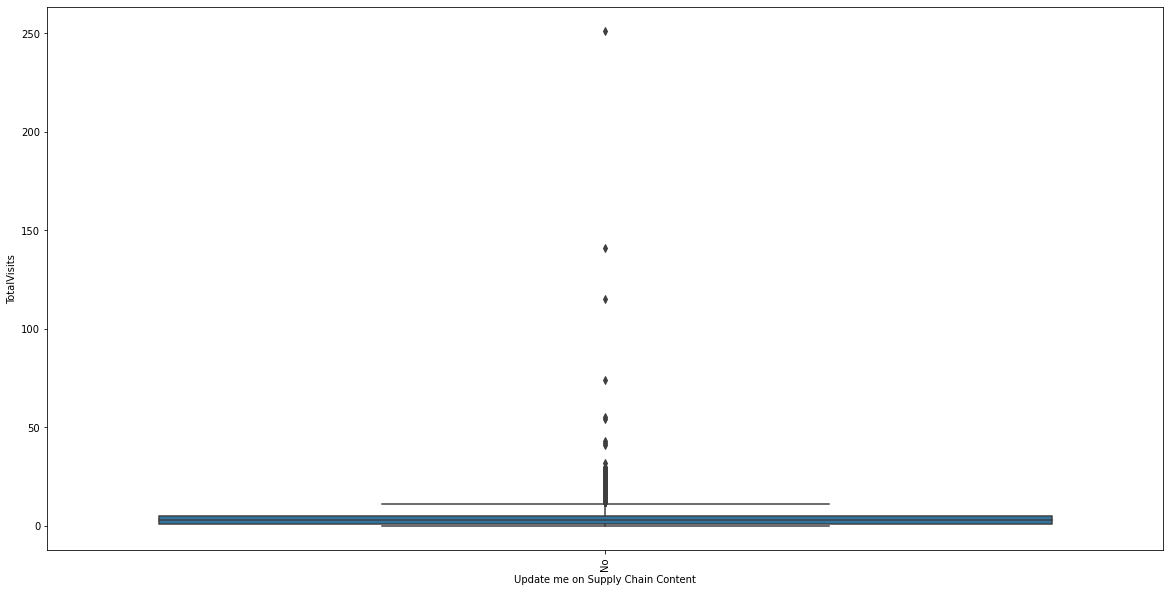

Boxplot TotalVisits Vs Get updates on DM Content


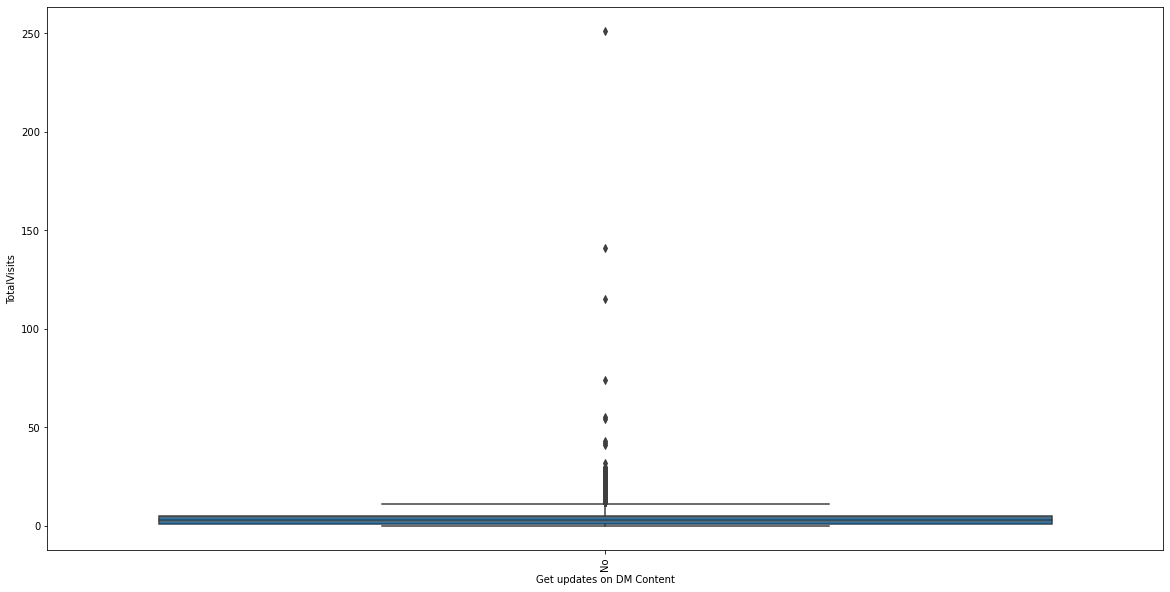

Boxplot TotalVisits Vs Lead Profile


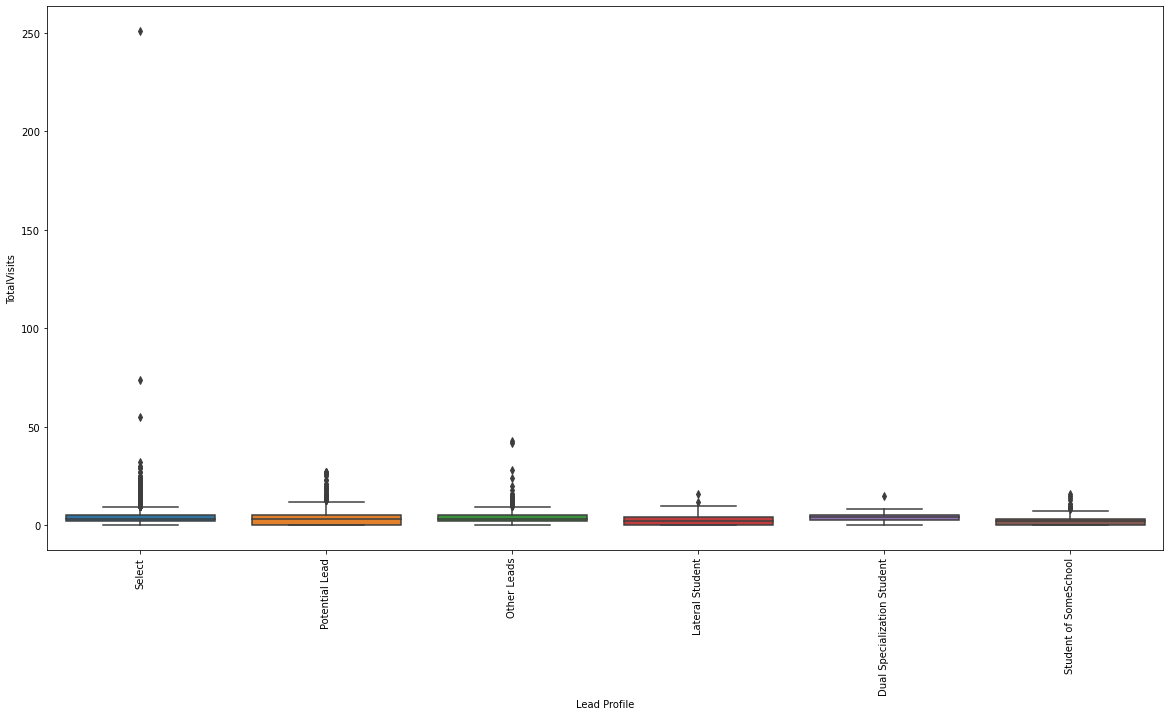

Boxplot TotalVisits Vs City


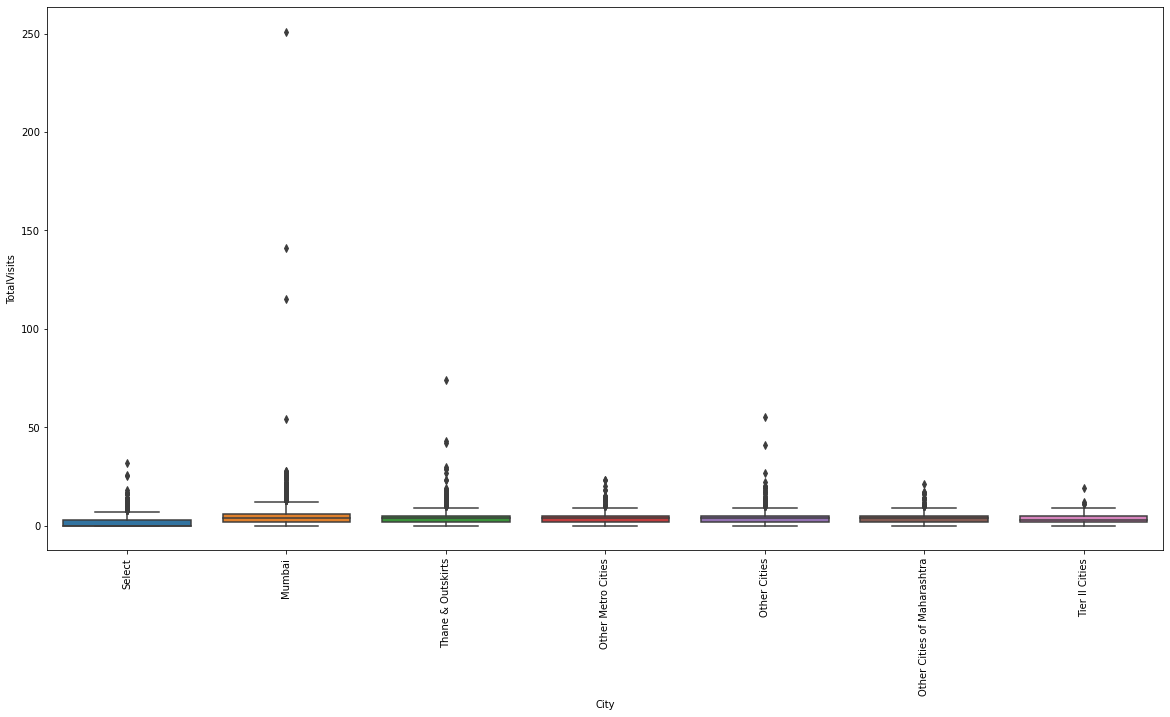

Boxplot TotalVisits Vs I agree to pay the amount through cheque


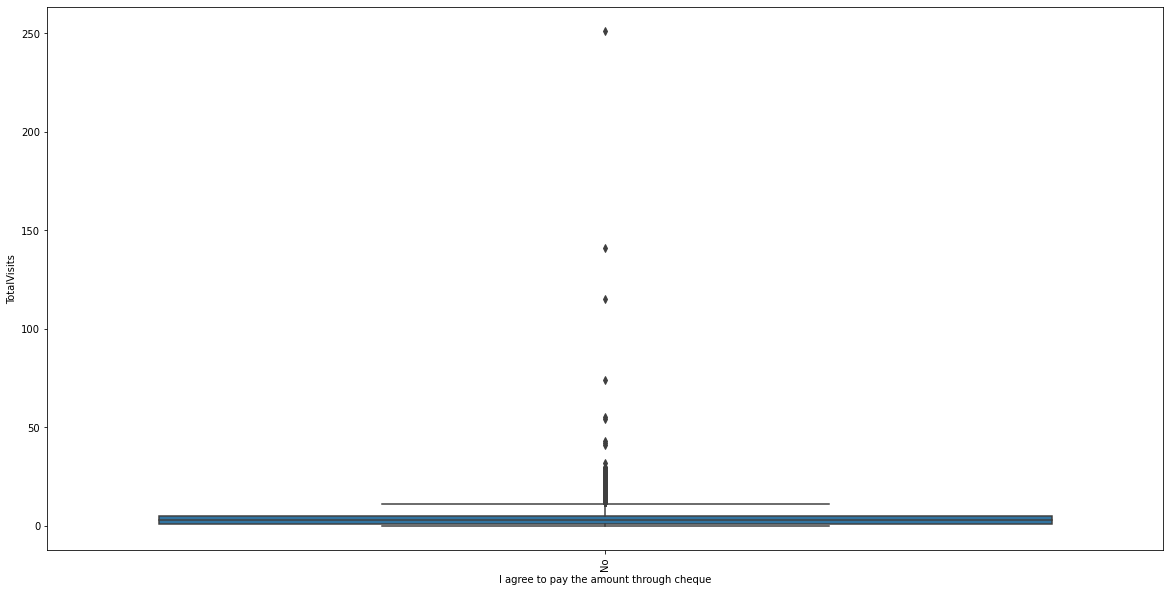

Boxplot TotalVisits Vs A free copy of Mastering The Interview


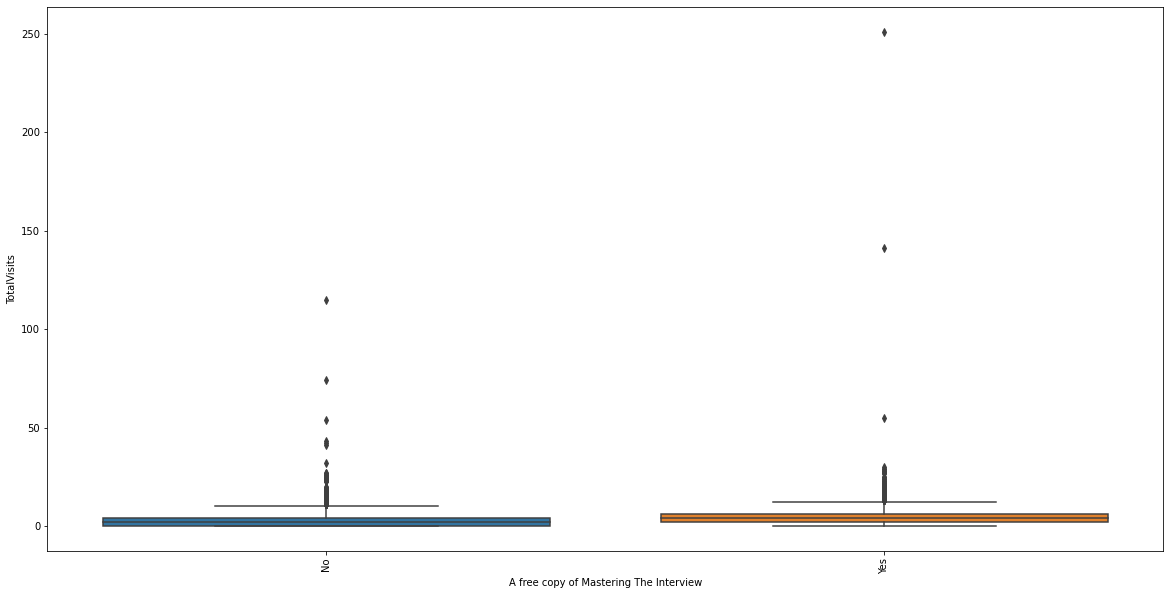

Boxplot TotalVisits Vs Last Notable Activity


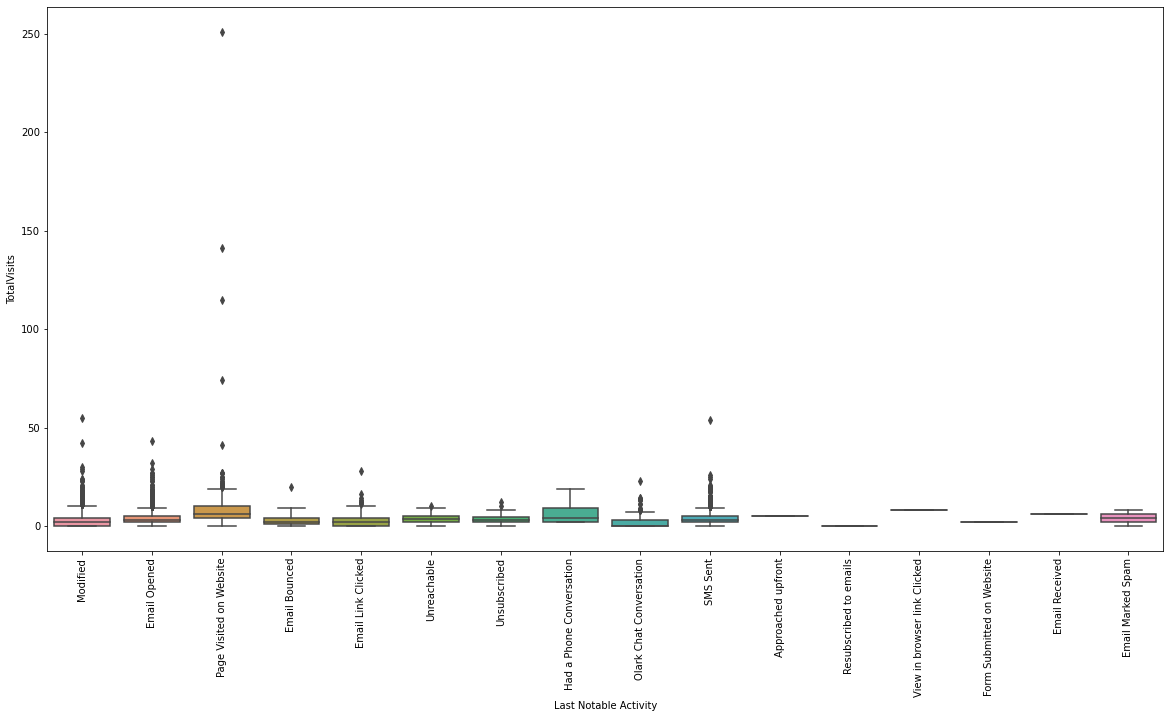

Boxplot Total Time Spent on Website Vs Lead Origin


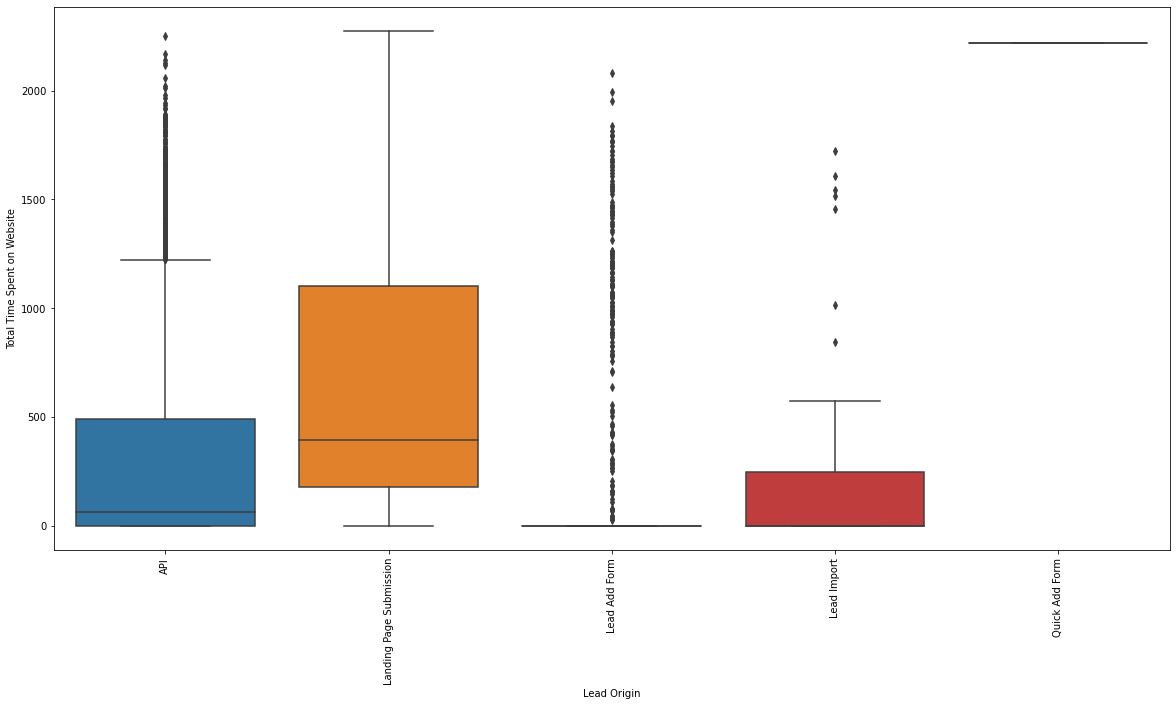

Boxplot Total Time Spent on Website Vs Lead Source


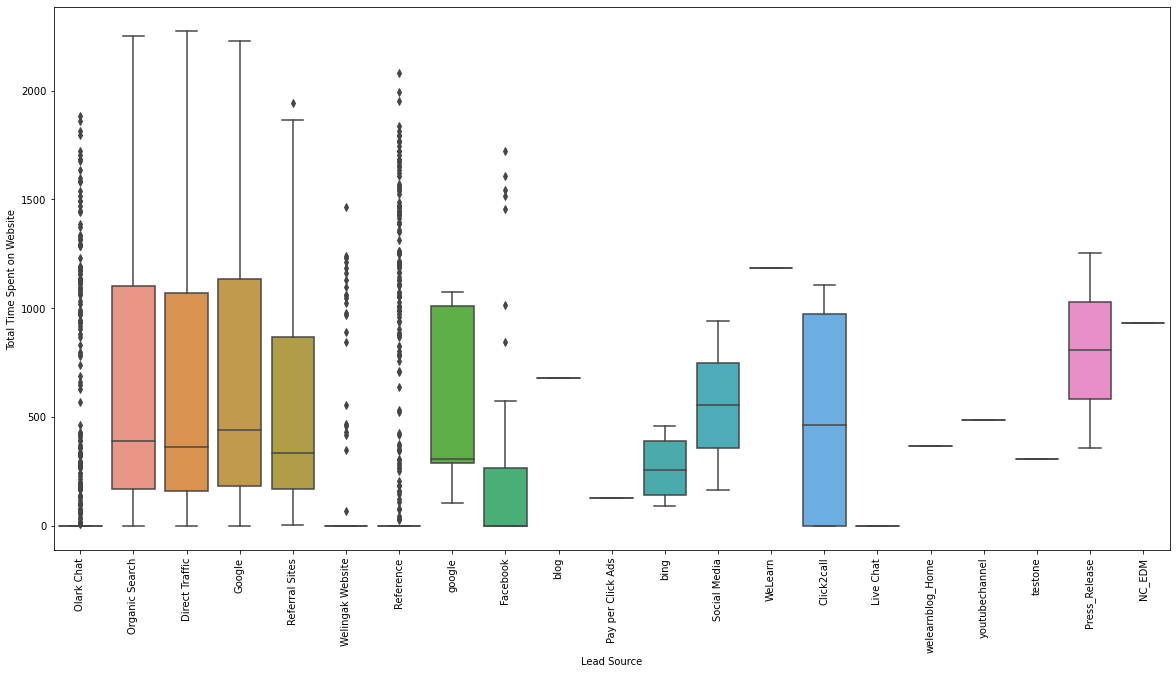

Boxplot Total Time Spent on Website Vs Do Not Email


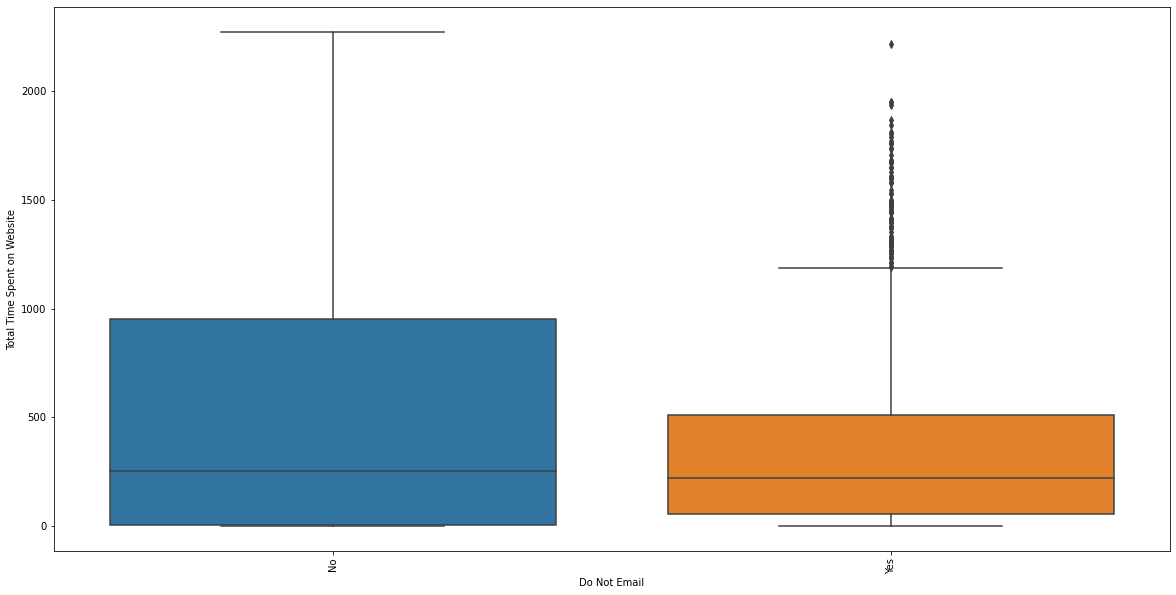

Boxplot Total Time Spent on Website Vs Do Not Call


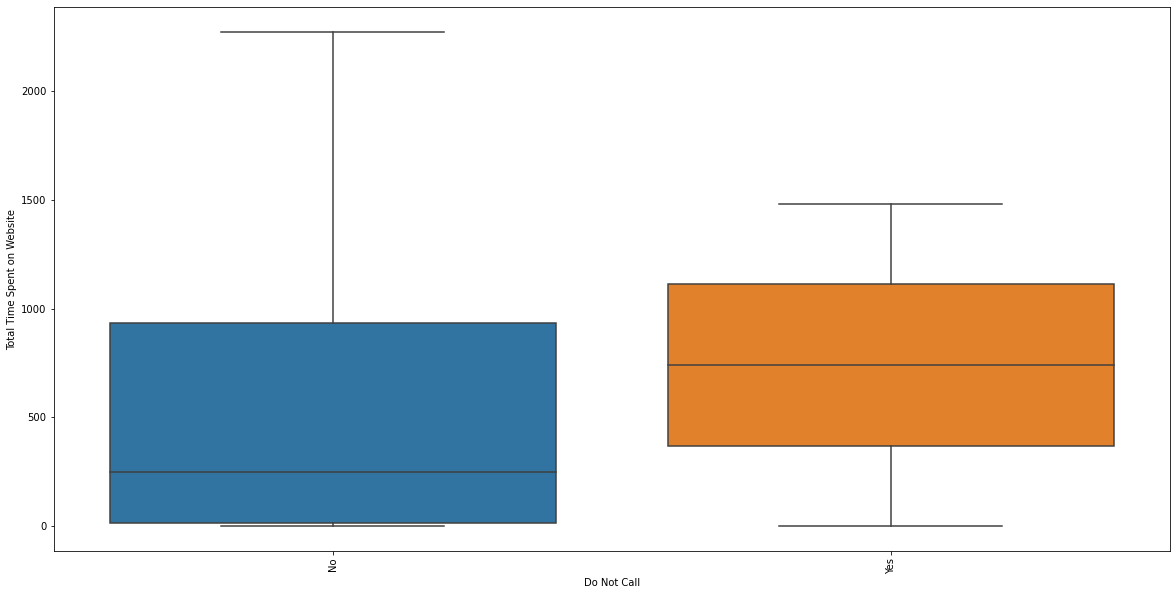

Boxplot Total Time Spent on Website Vs Last Activity


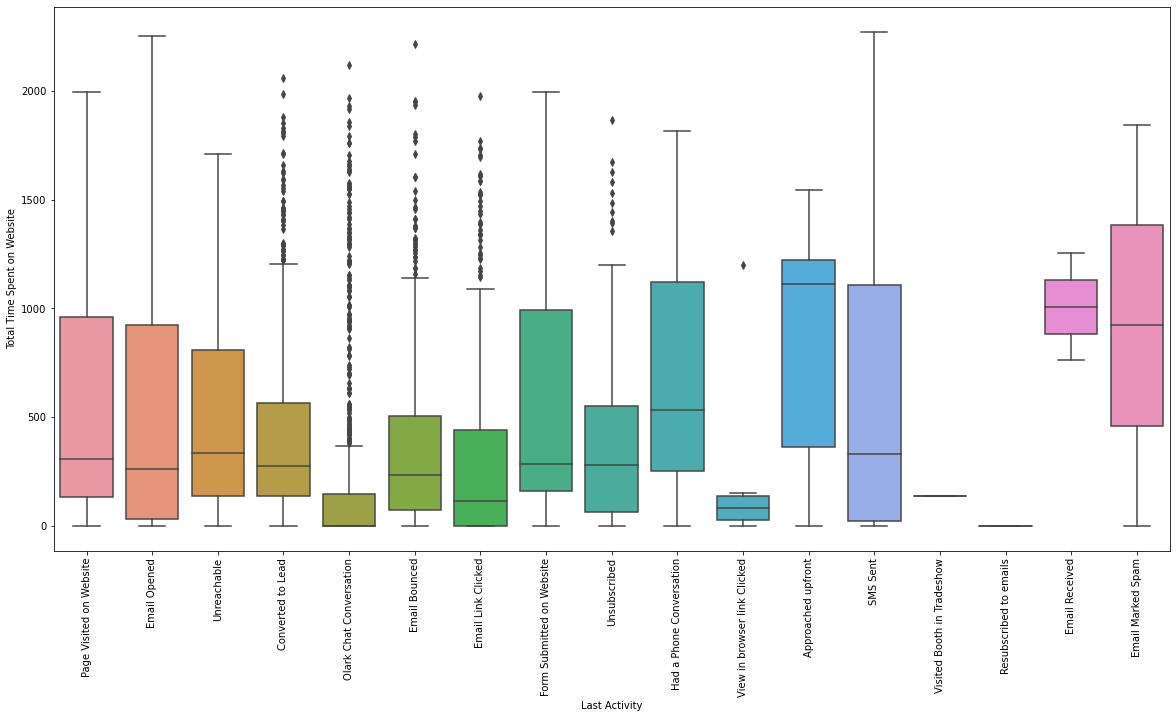

Boxplot Total Time Spent on Website Vs Country


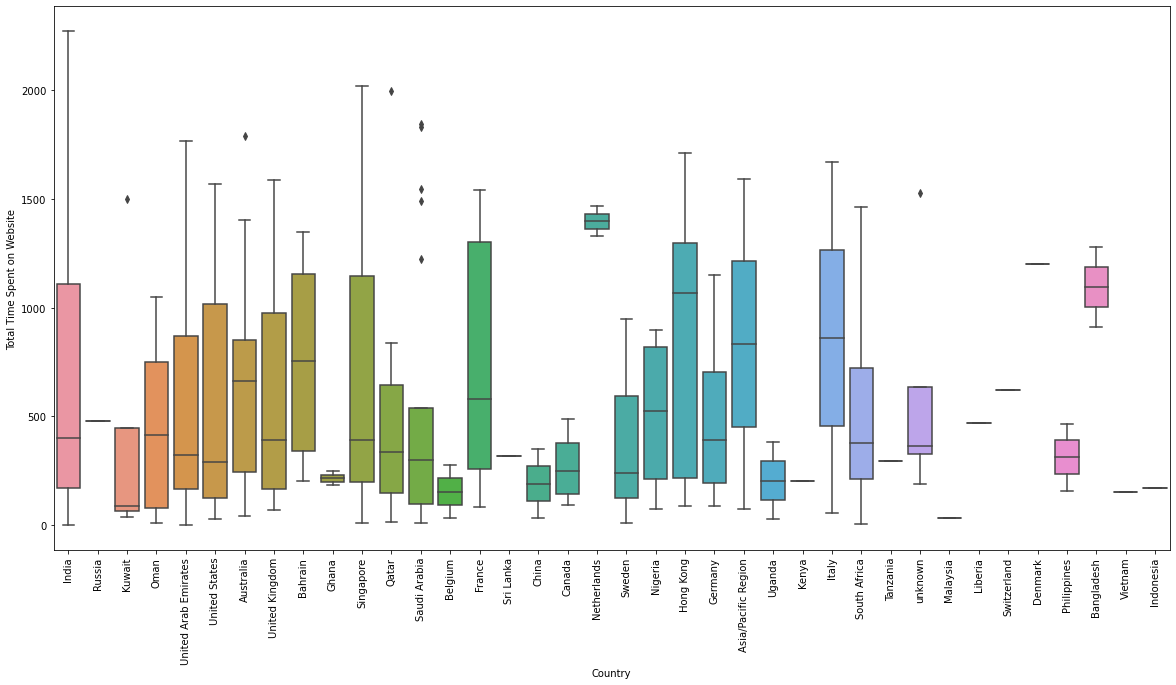

Boxplot Total Time Spent on Website Vs Specialization


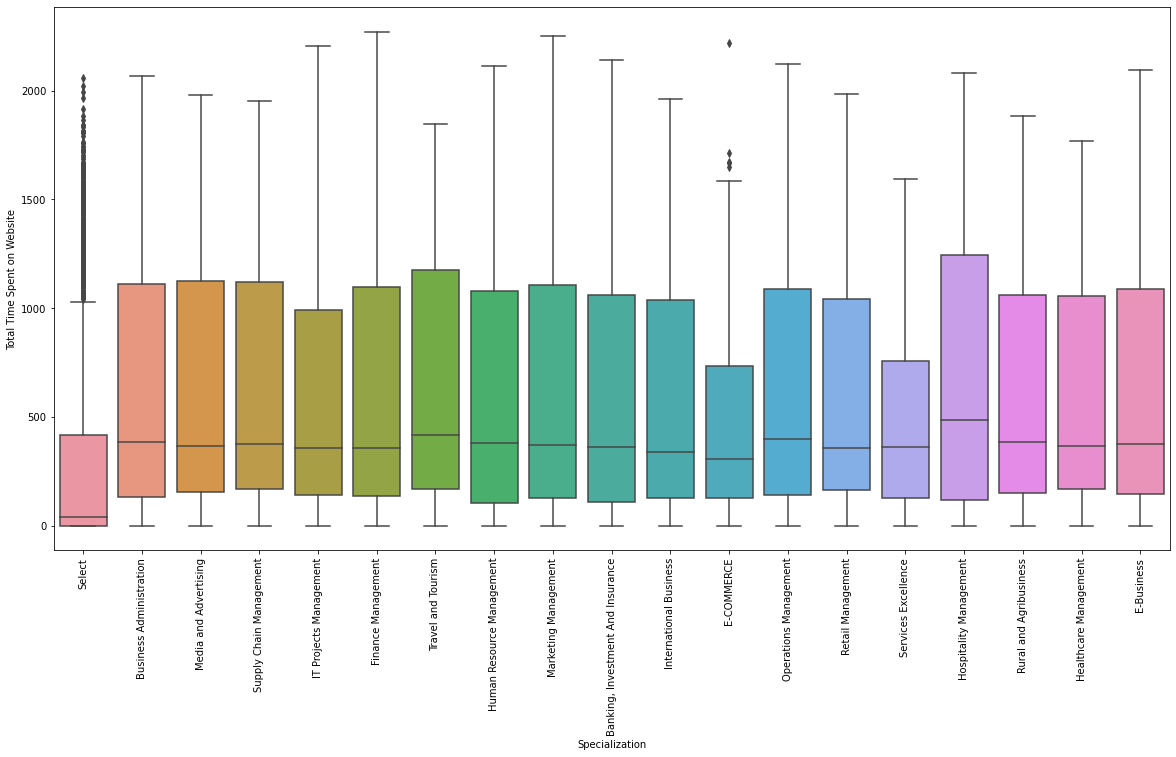

Boxplot Total Time Spent on Website Vs How did you hear about X Education


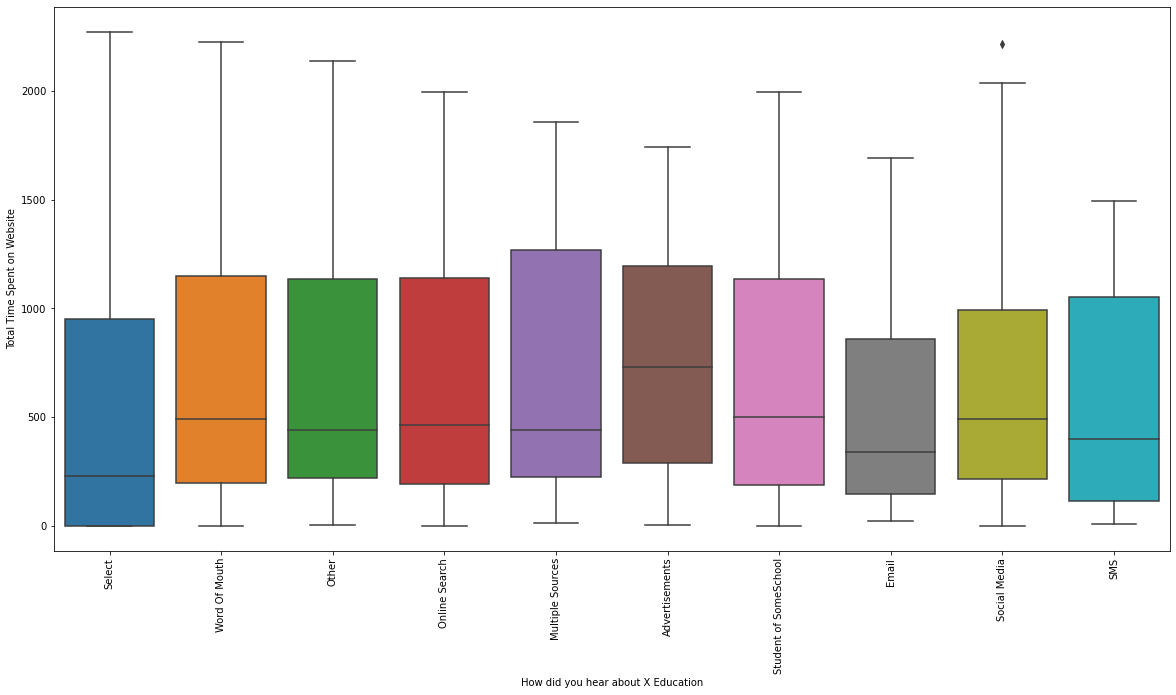

Boxplot Total Time Spent on Website Vs What is your current occupation


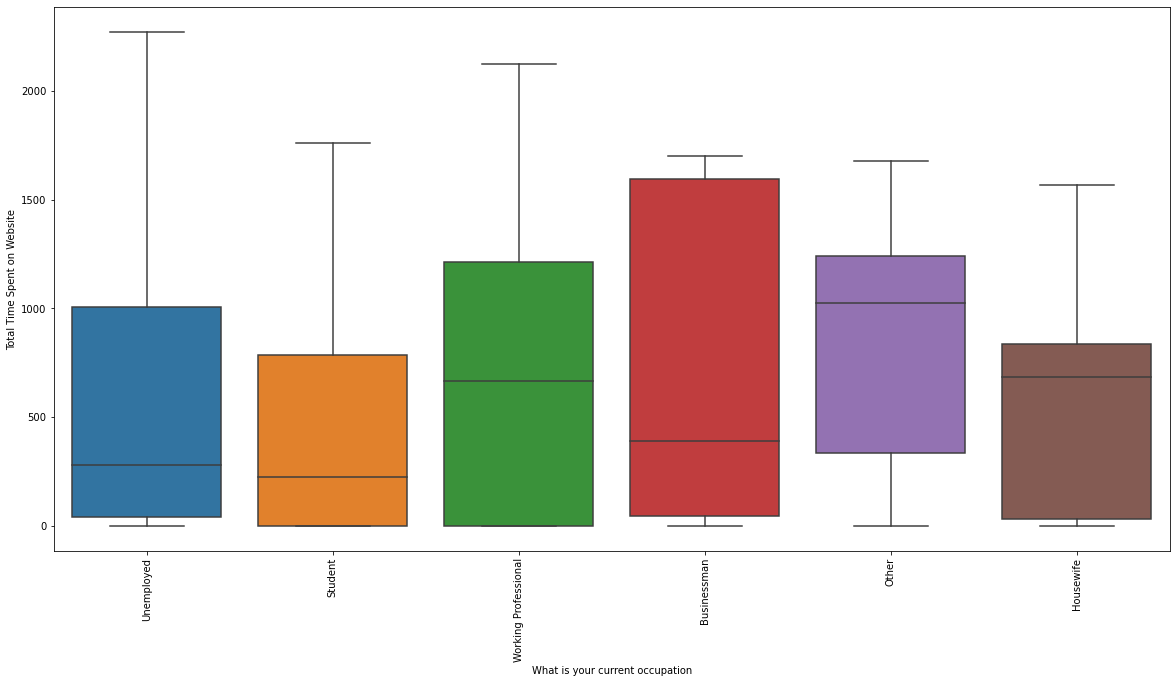

Boxplot Total Time Spent on Website Vs What matters most to you in choosing a course


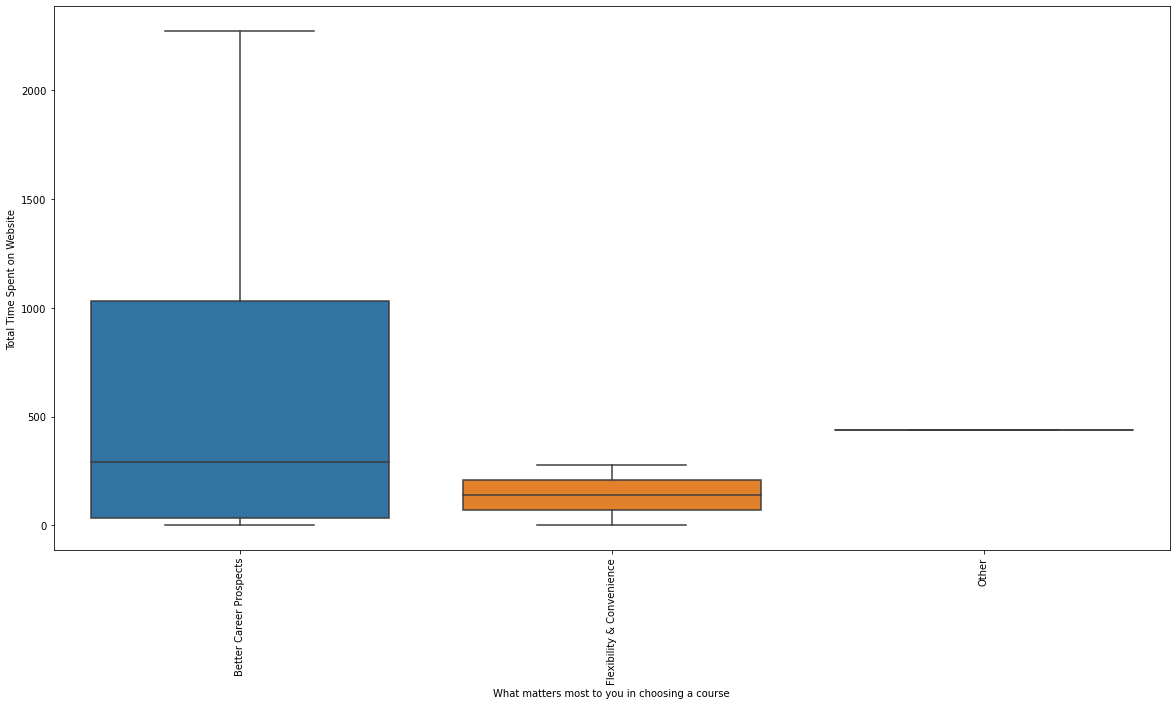

Boxplot Total Time Spent on Website Vs Search


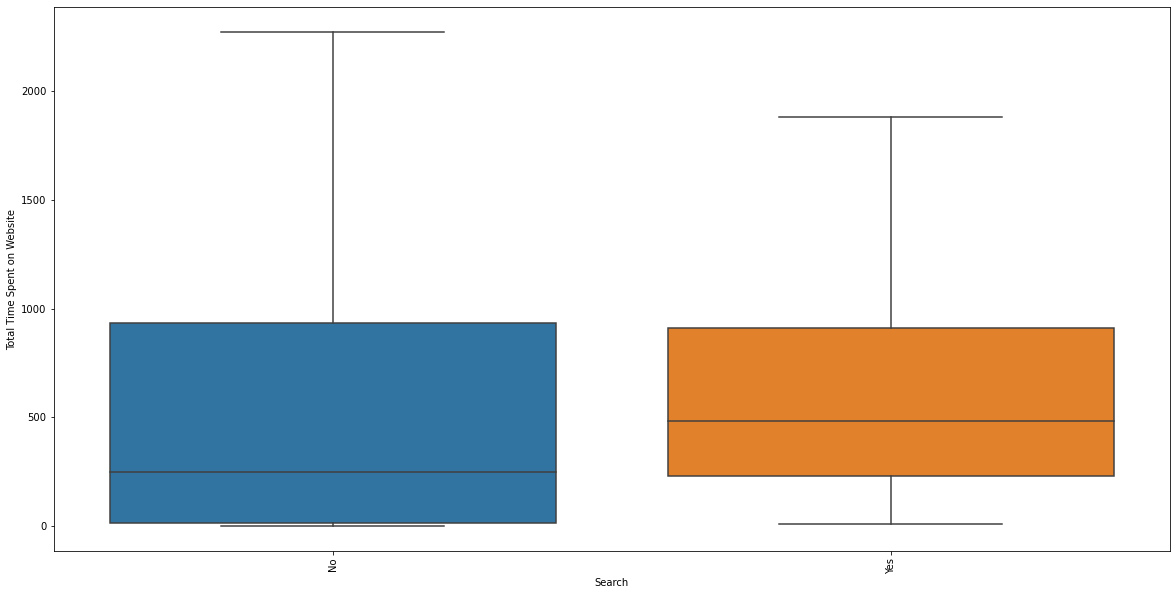

Boxplot Total Time Spent on Website Vs Magazine


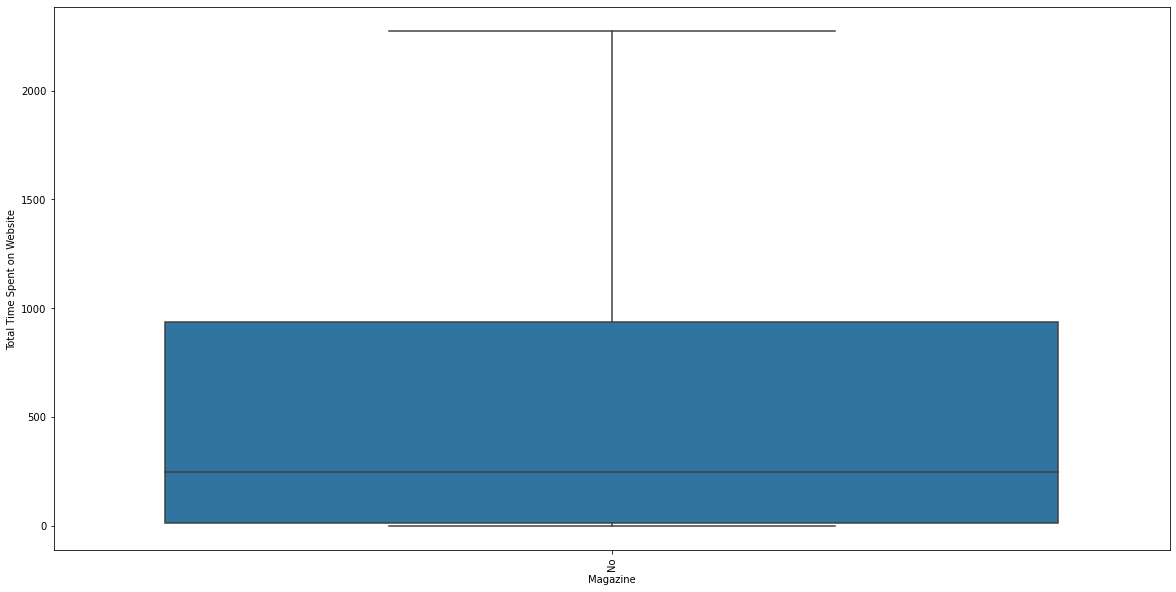

Boxplot Total Time Spent on Website Vs Newspaper Article


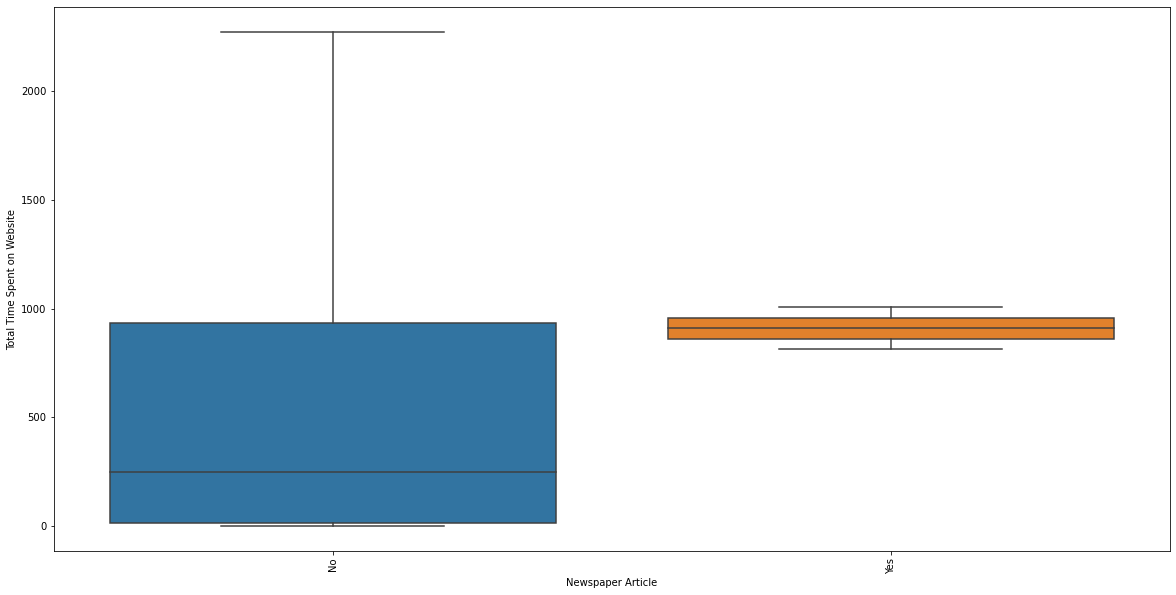

Boxplot Total Time Spent on Website Vs X Education Forums


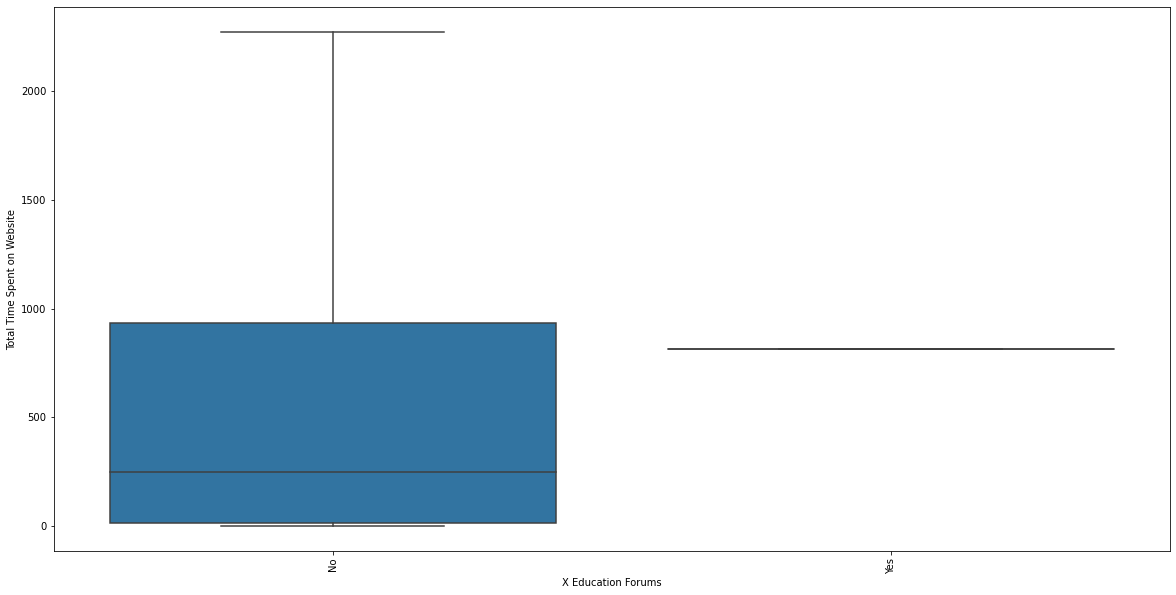

Boxplot Total Time Spent on Website Vs Newspaper


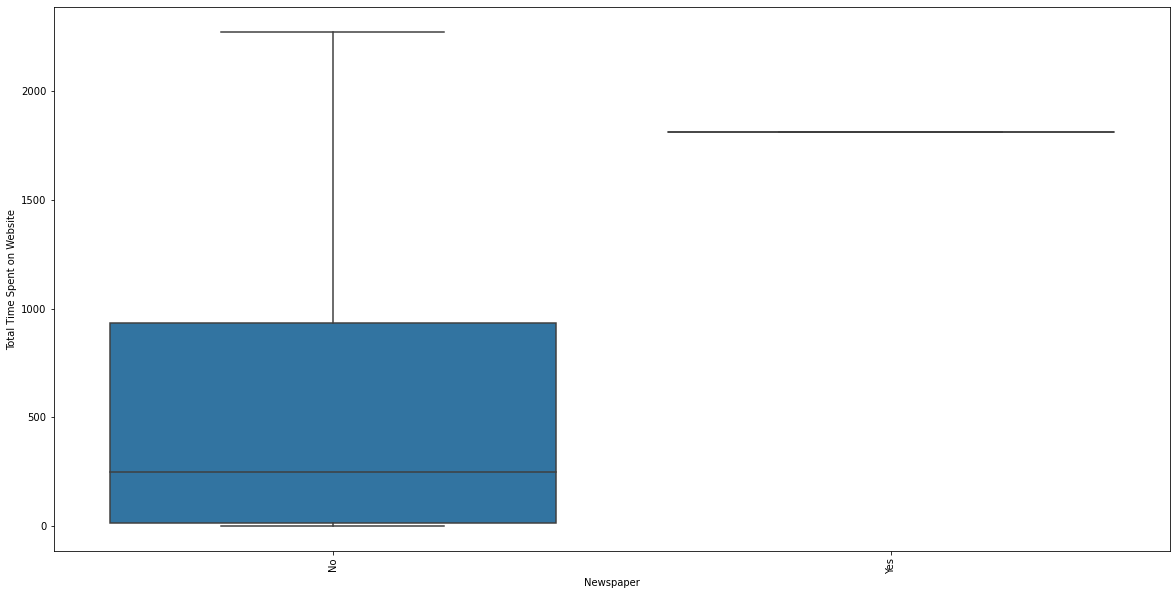

Boxplot Total Time Spent on Website Vs Digital Advertisement


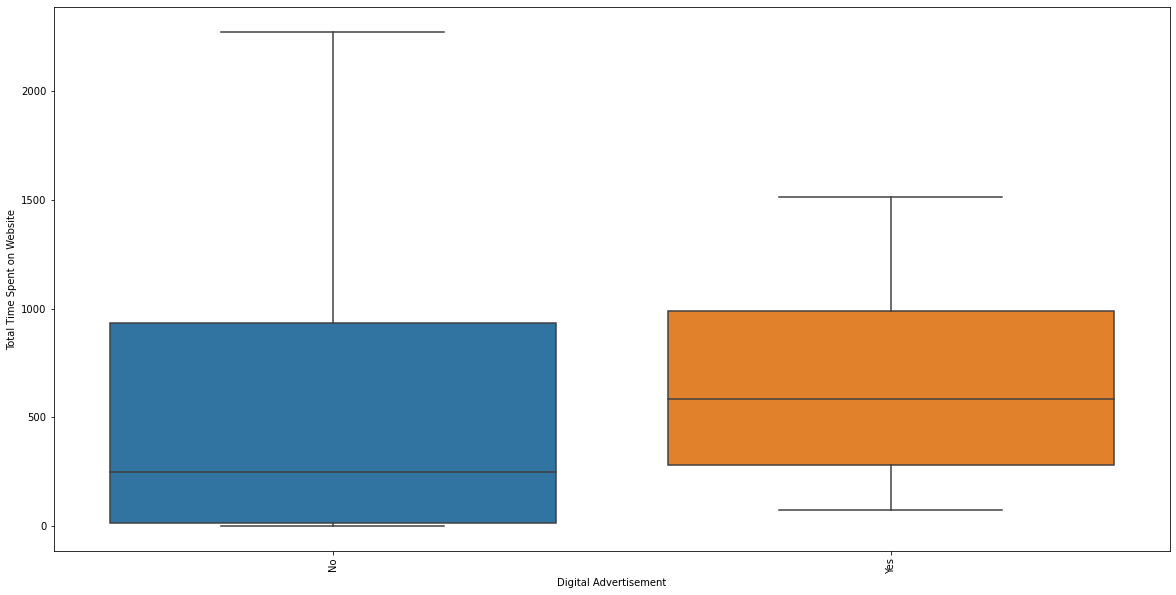

Boxplot Total Time Spent on Website Vs Through Recommendations


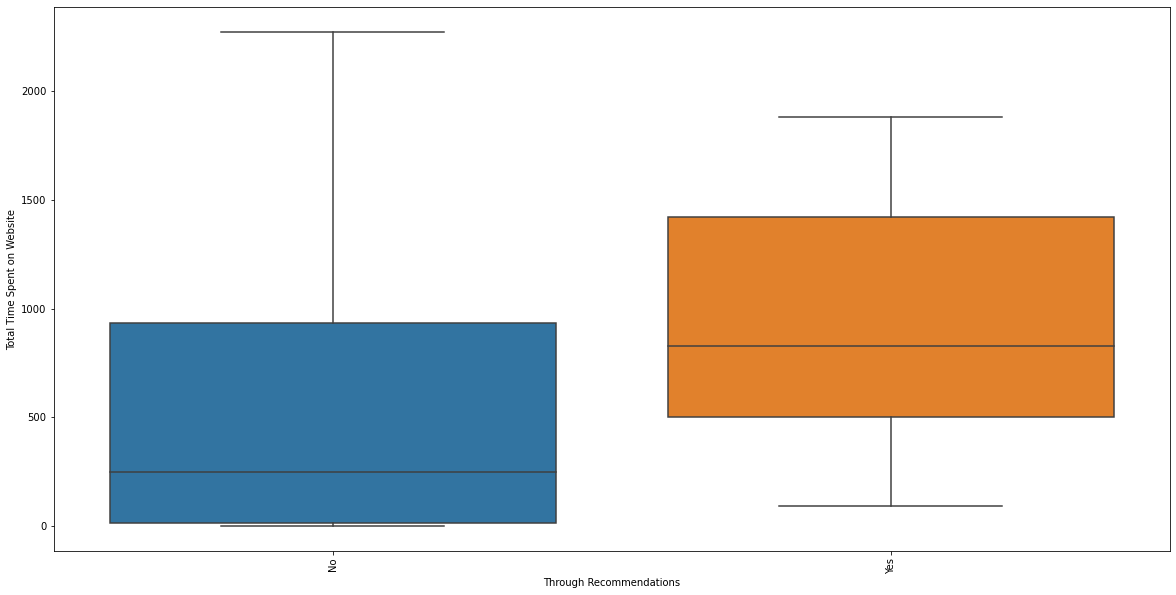

Boxplot Total Time Spent on Website Vs Receive More Updates About Our Courses


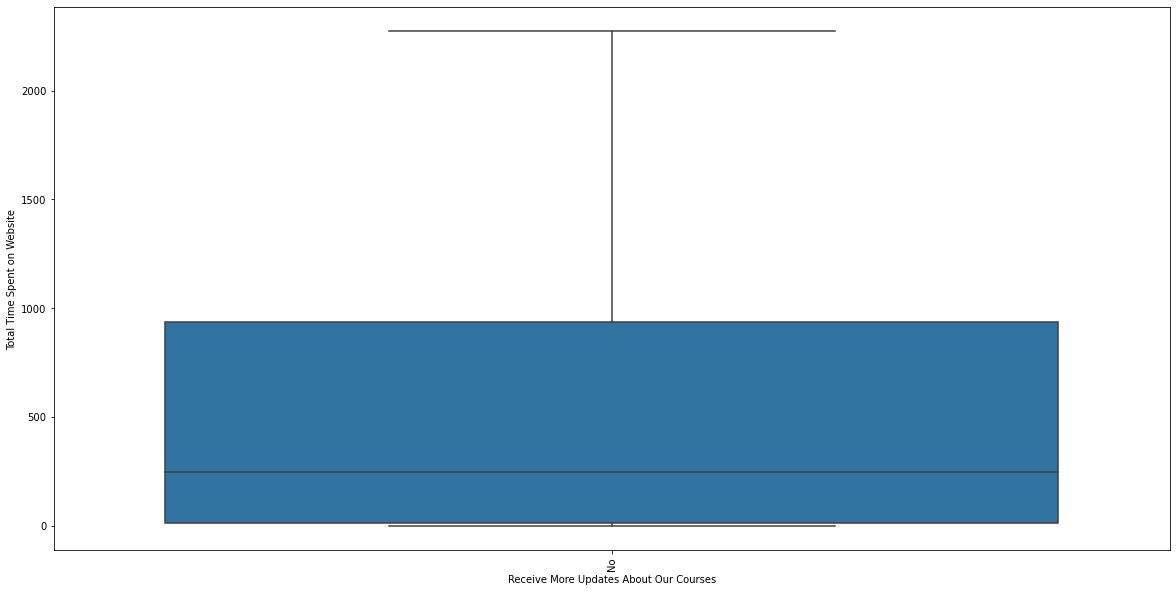

Boxplot Total Time Spent on Website Vs Tags


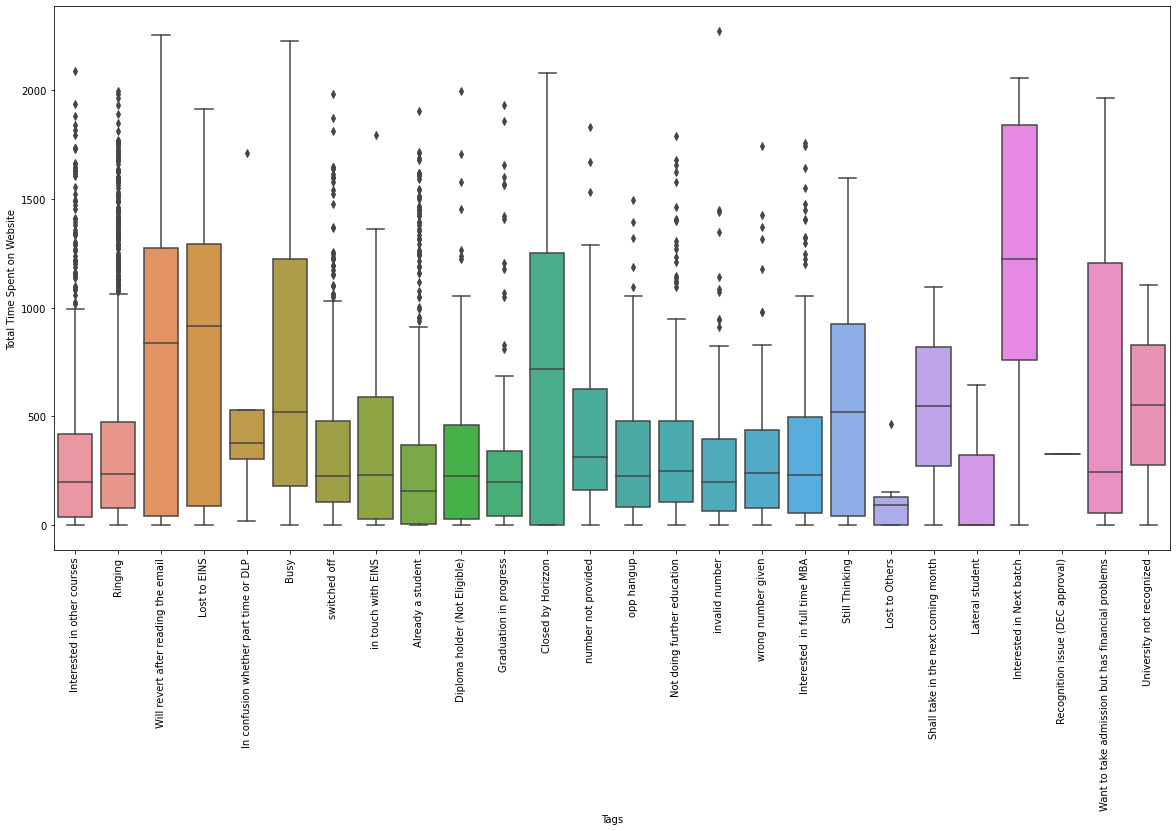

Boxplot Total Time Spent on Website Vs Lead Quality


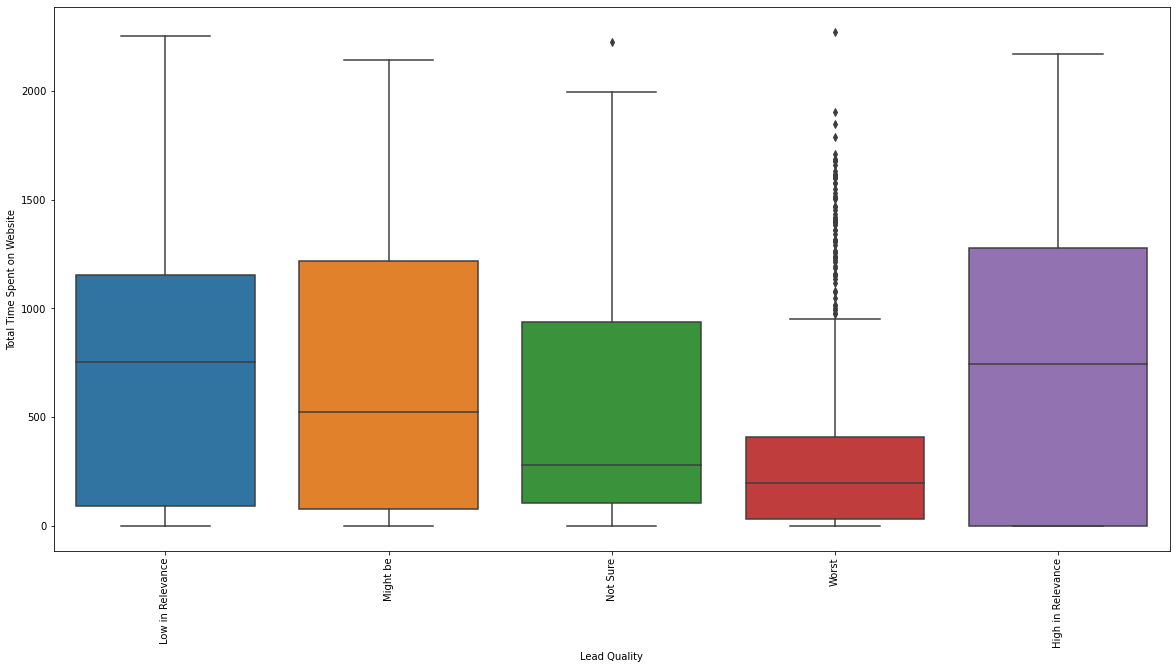

Boxplot Total Time Spent on Website Vs Update me on Supply Chain Content


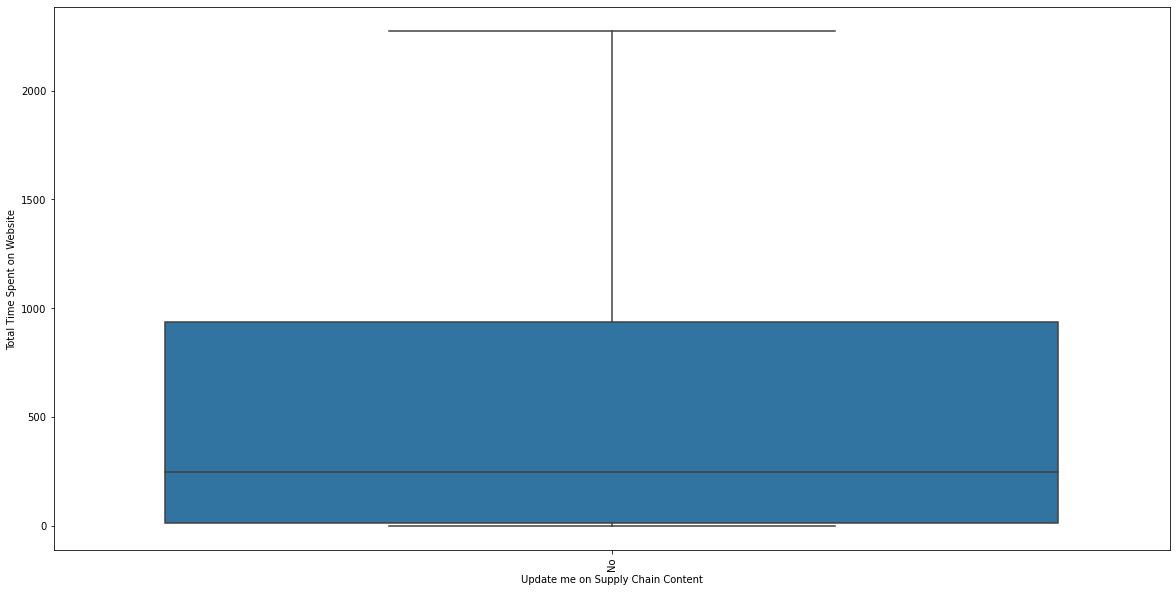

Boxplot Total Time Spent on Website Vs Get updates on DM Content


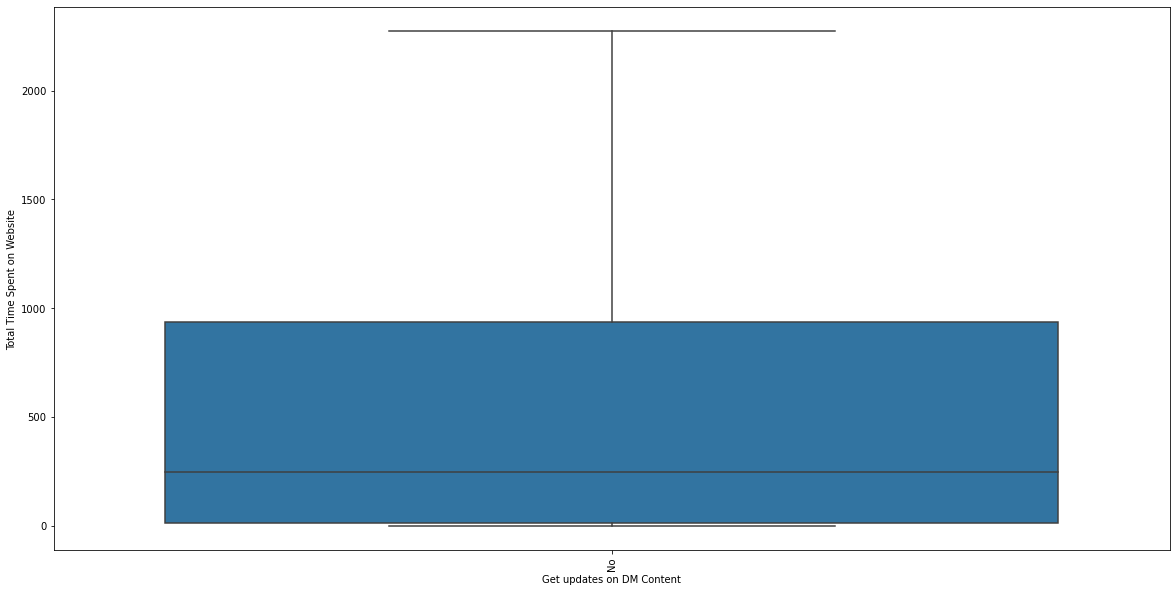

Boxplot Total Time Spent on Website Vs Lead Profile


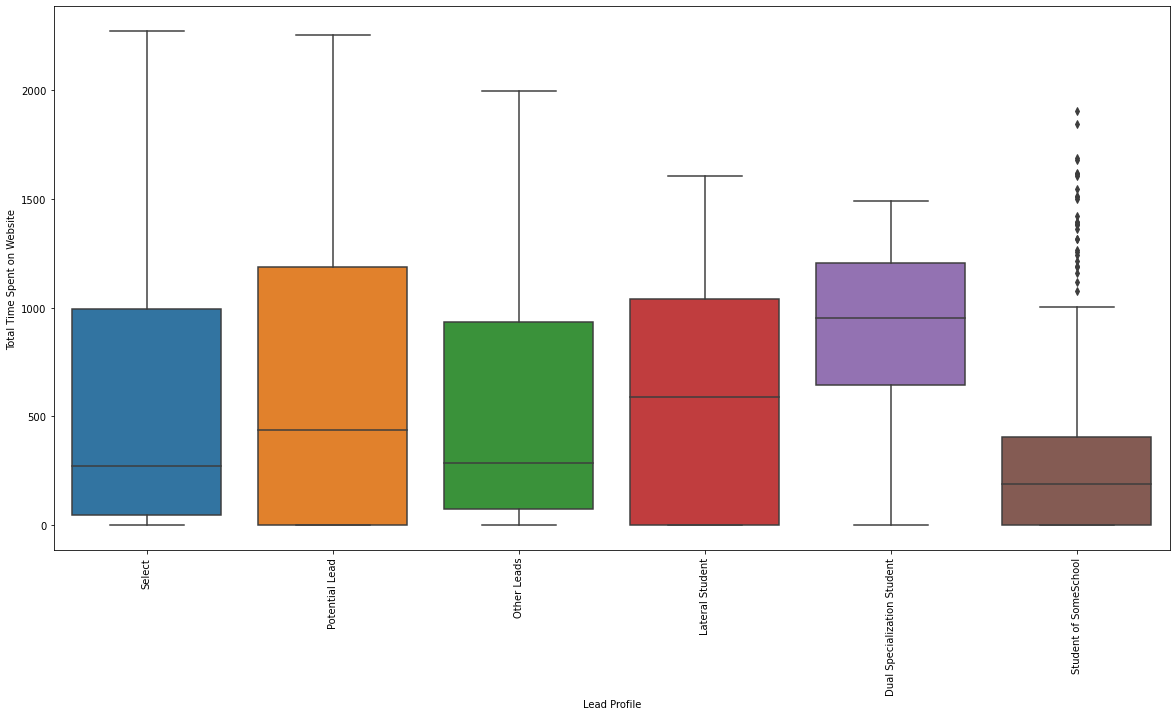

Boxplot Total Time Spent on Website Vs City


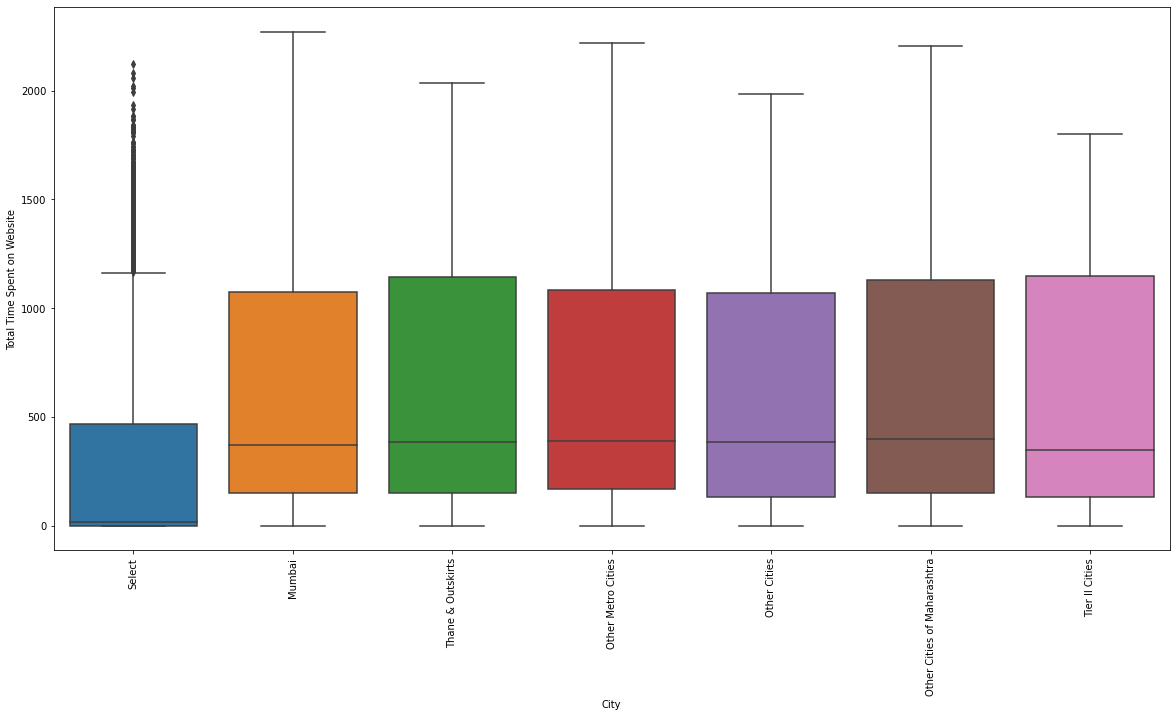

Boxplot Total Time Spent on Website Vs I agree to pay the amount through cheque


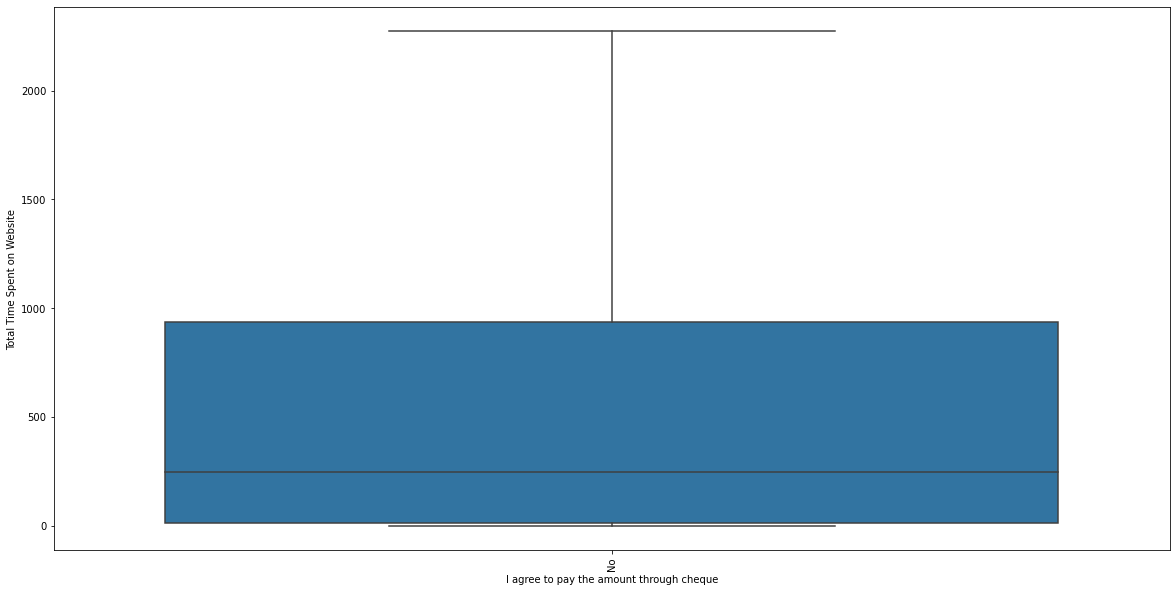

Boxplot Total Time Spent on Website Vs A free copy of Mastering The Interview


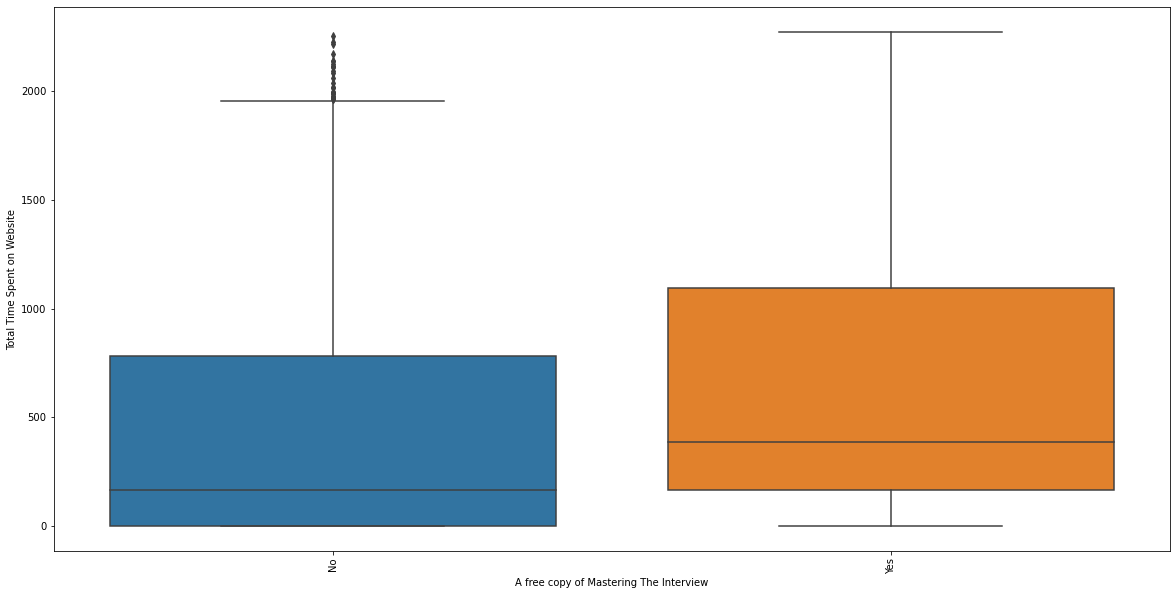

Boxplot Total Time Spent on Website Vs Last Notable Activity


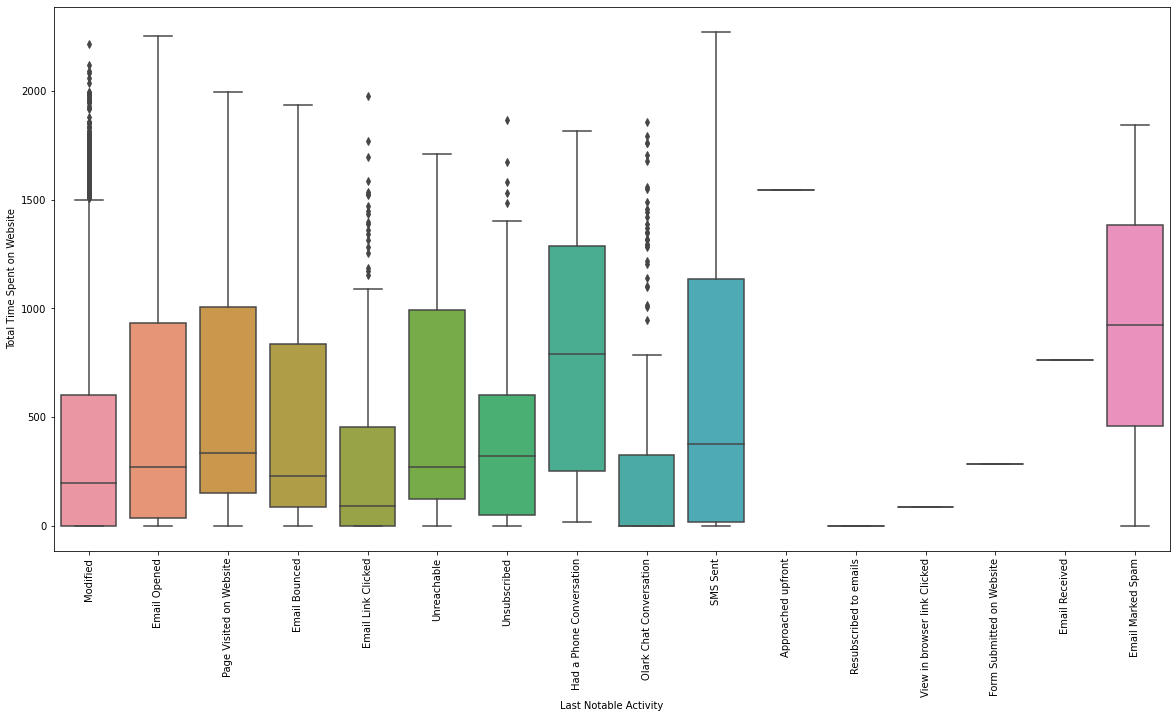

Boxplot Page Views Per Visit Vs Lead Origin


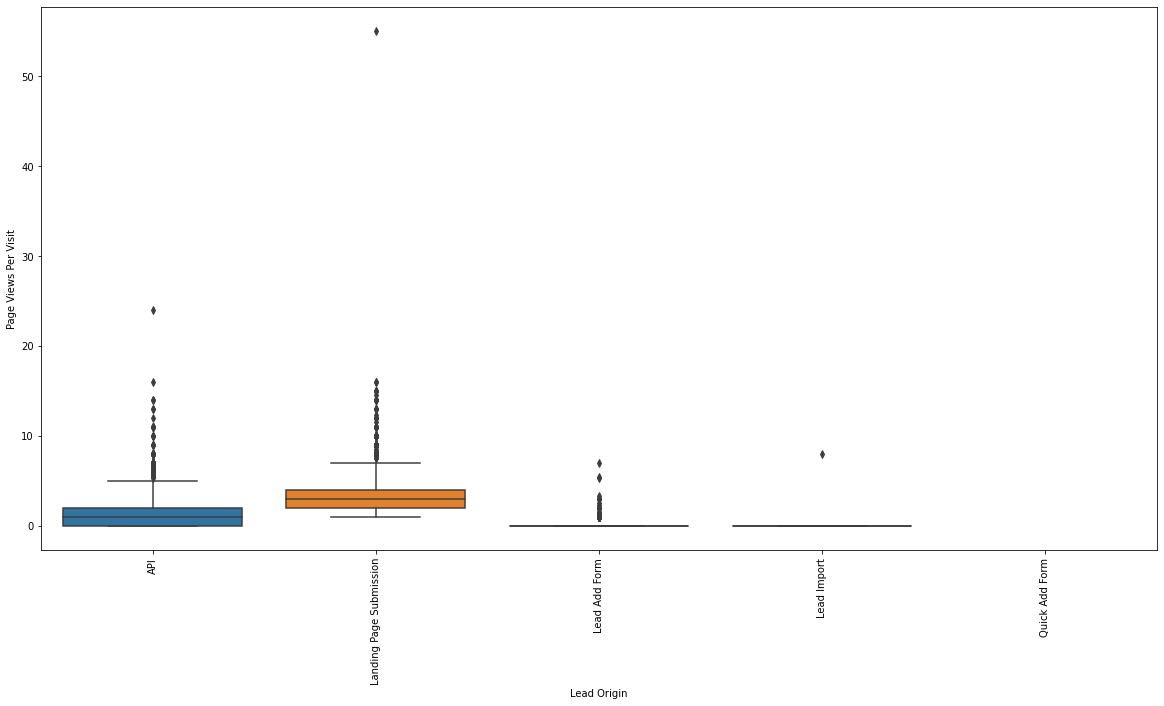

Boxplot Page Views Per Visit Vs Lead Source


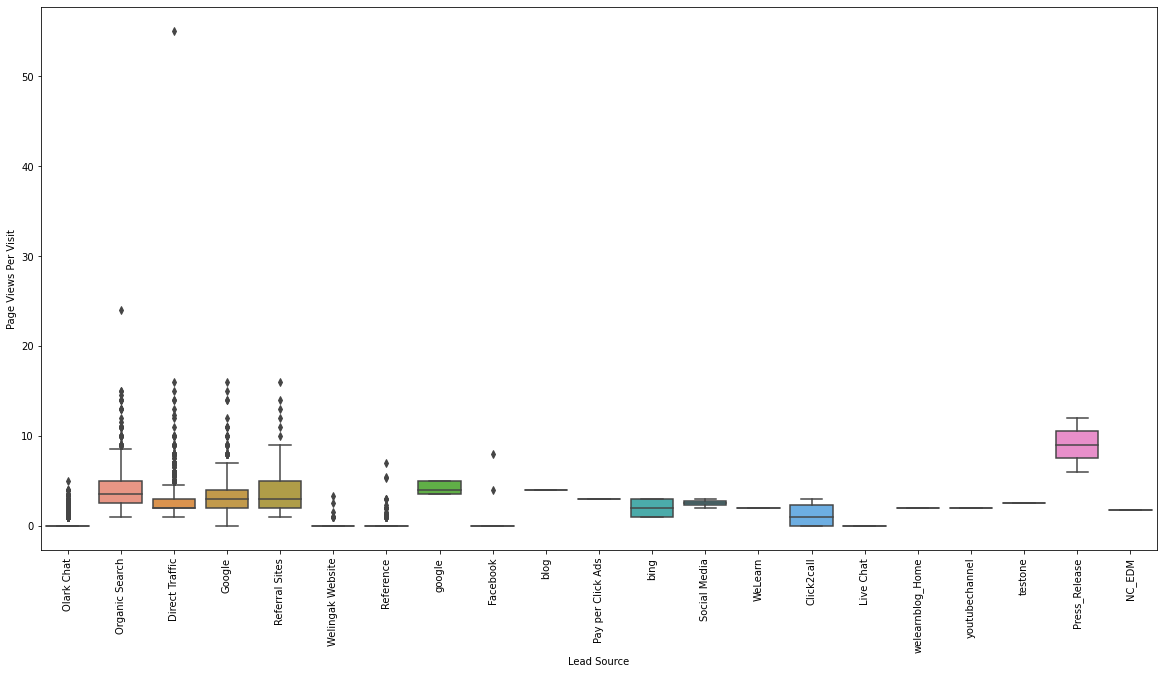

Boxplot Page Views Per Visit Vs Do Not Email


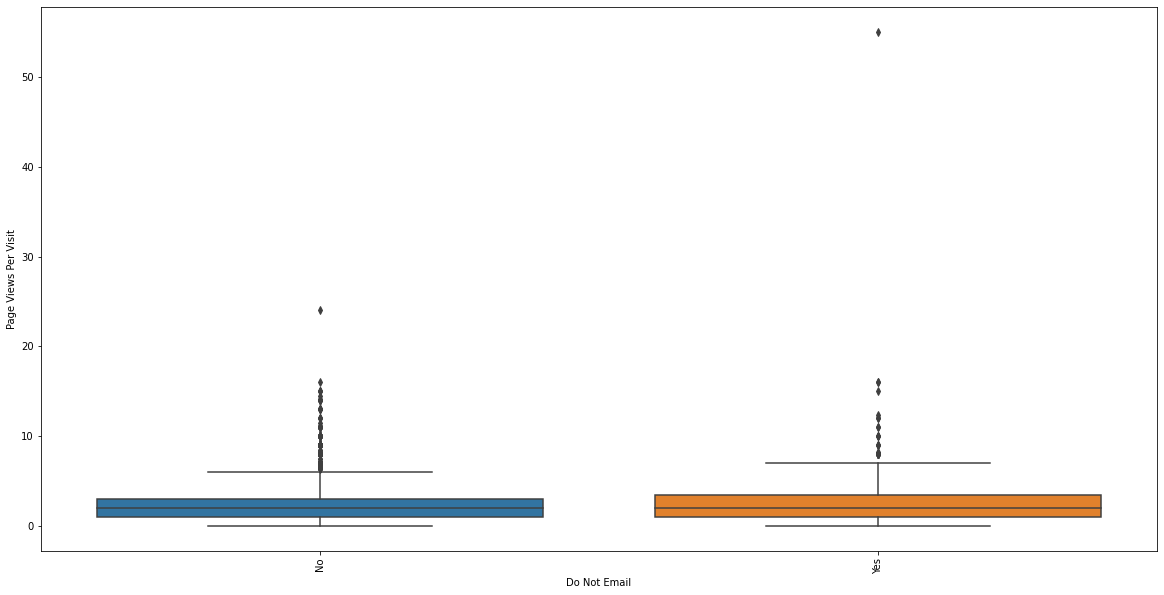

Boxplot Page Views Per Visit Vs Do Not Call


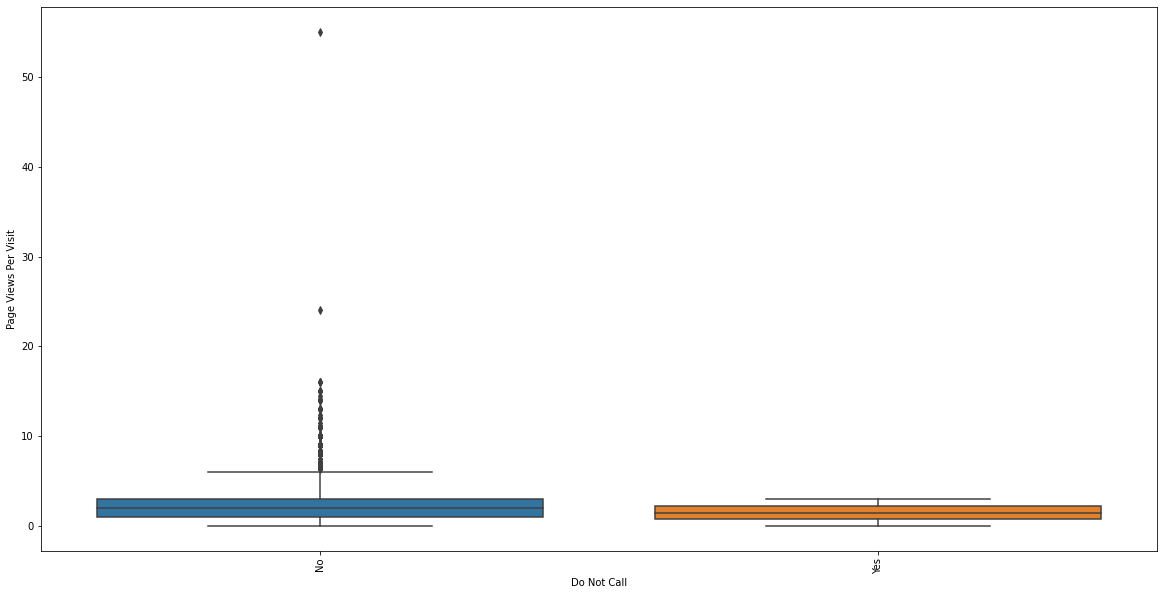

Boxplot Page Views Per Visit Vs Last Activity


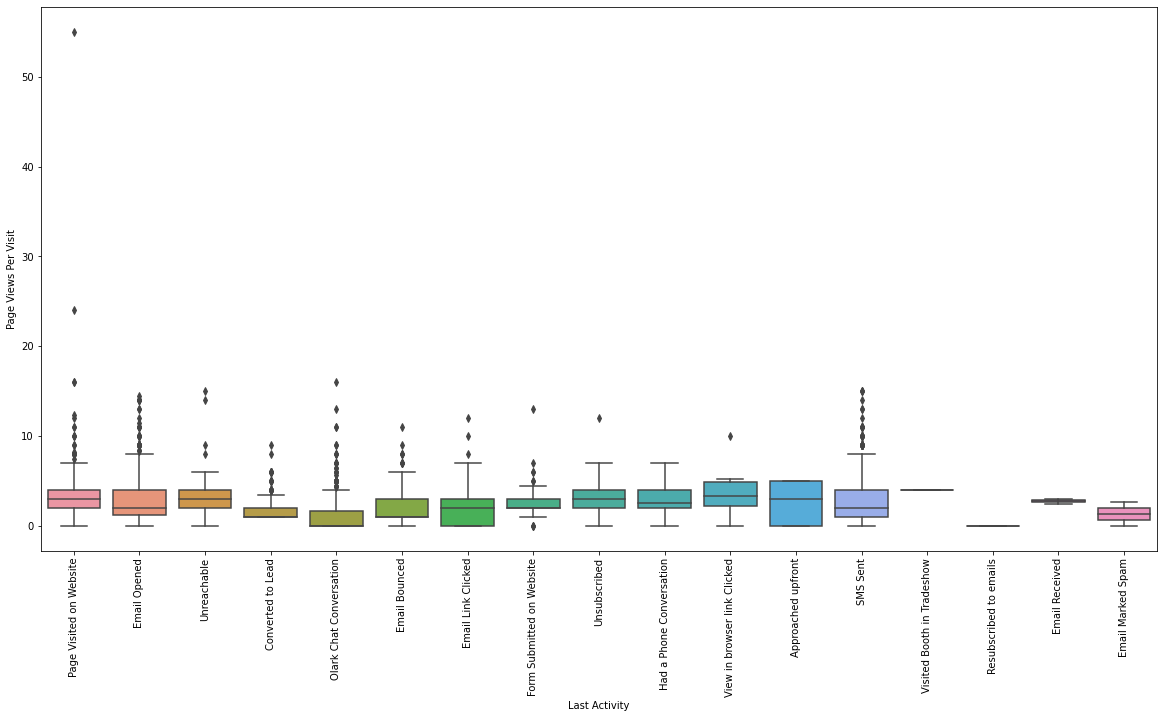

Boxplot Page Views Per Visit Vs Country


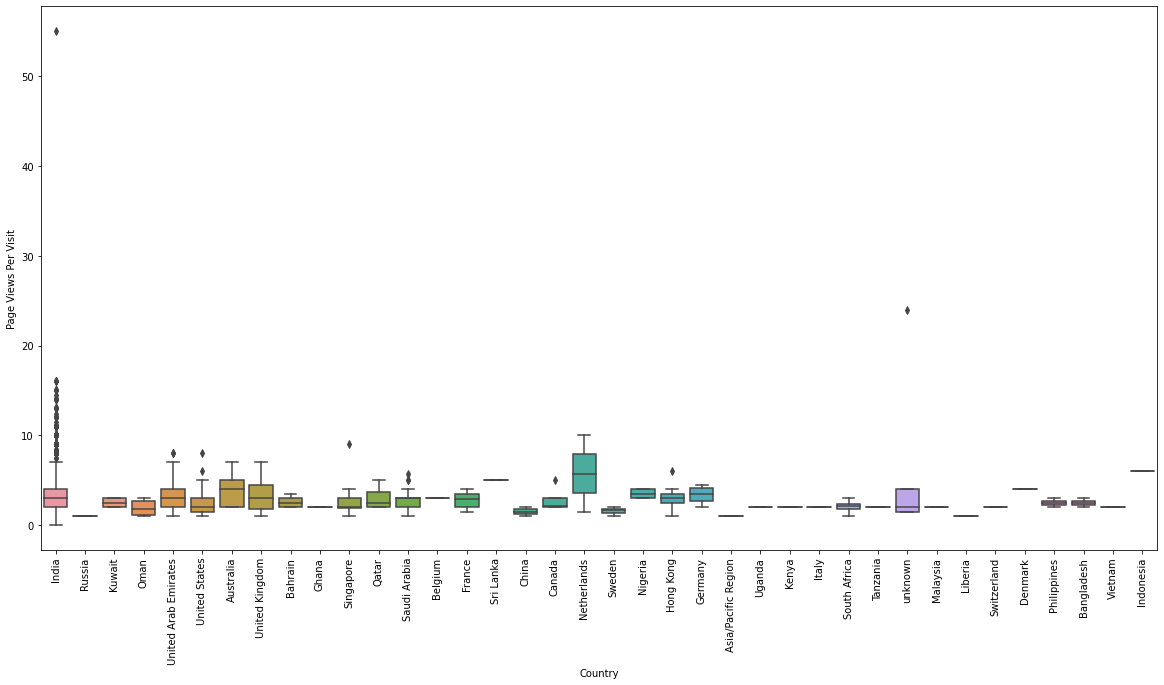

Boxplot Page Views Per Visit Vs Specialization


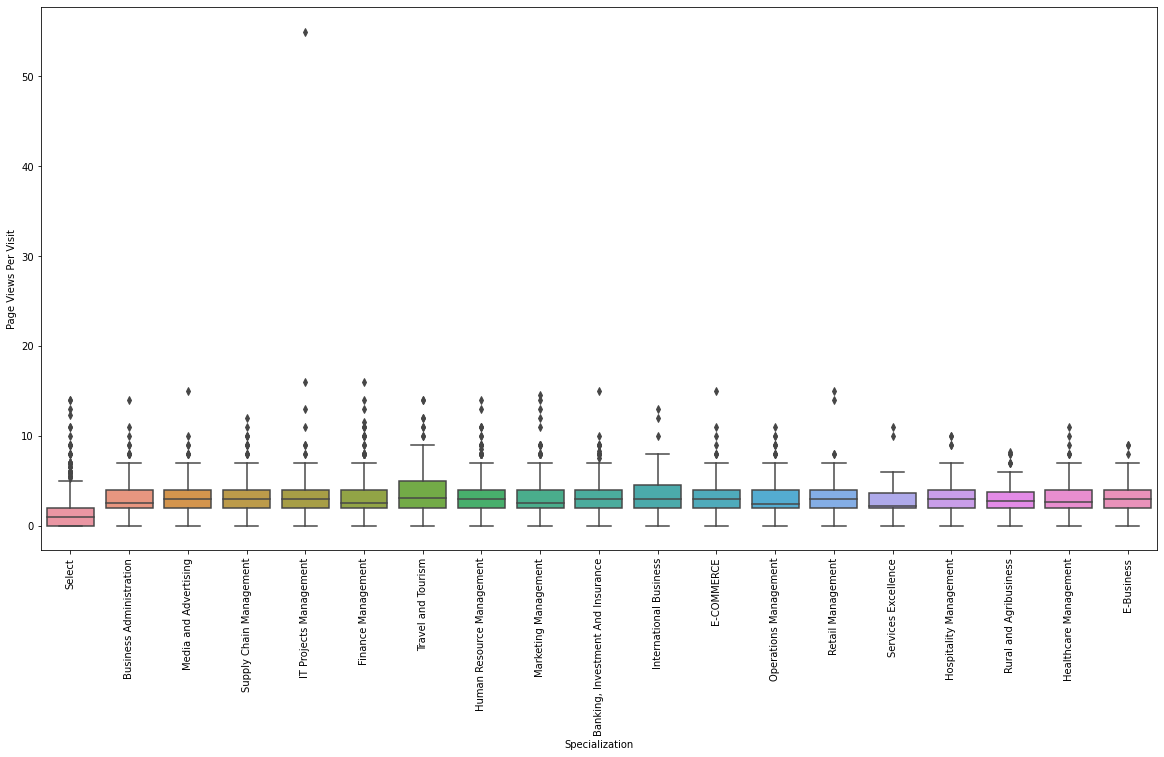

Boxplot Page Views Per Visit Vs How did you hear about X Education


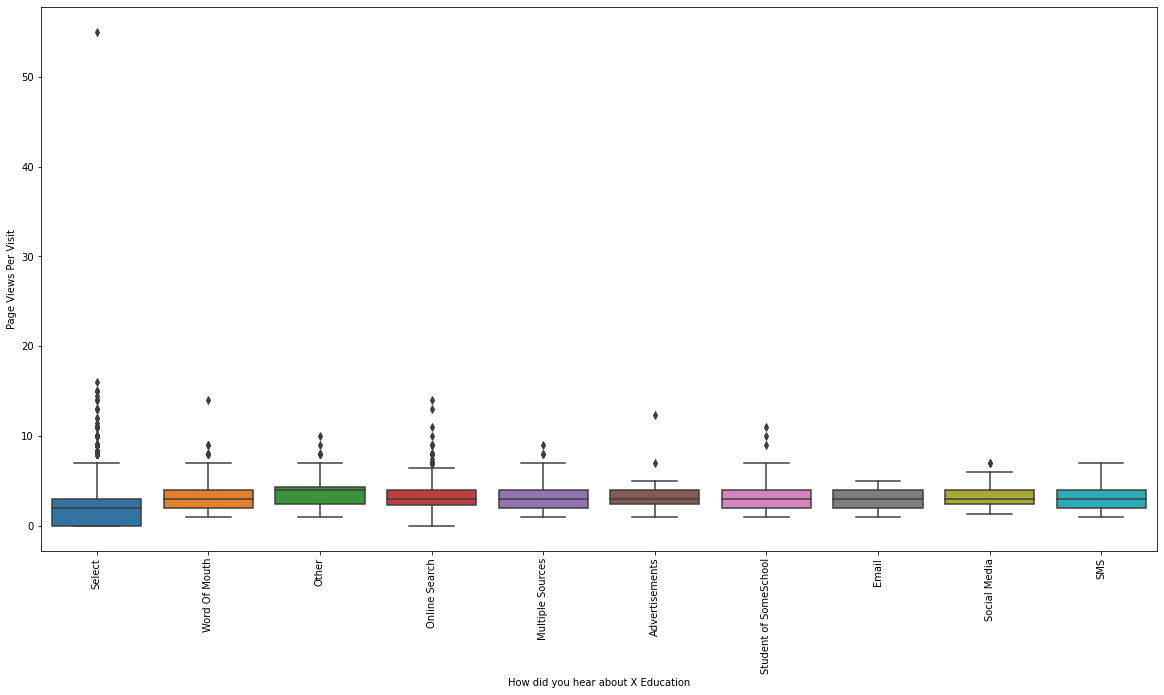

Boxplot Page Views Per Visit Vs What is your current occupation


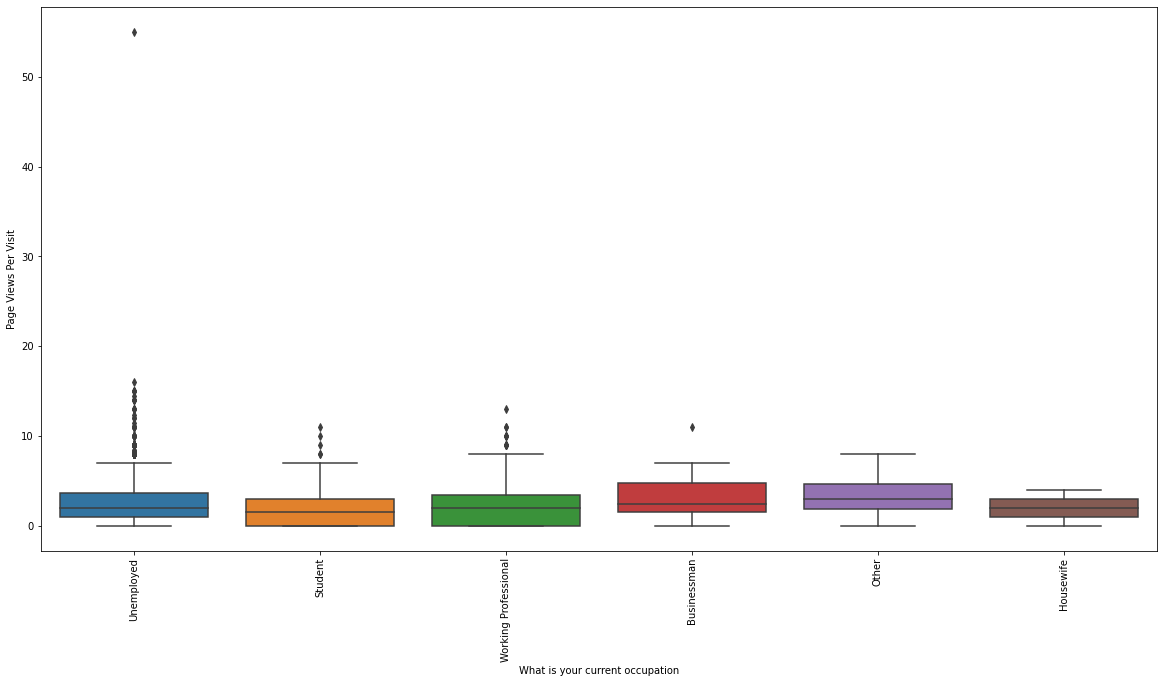

Boxplot Page Views Per Visit Vs What matters most to you in choosing a course


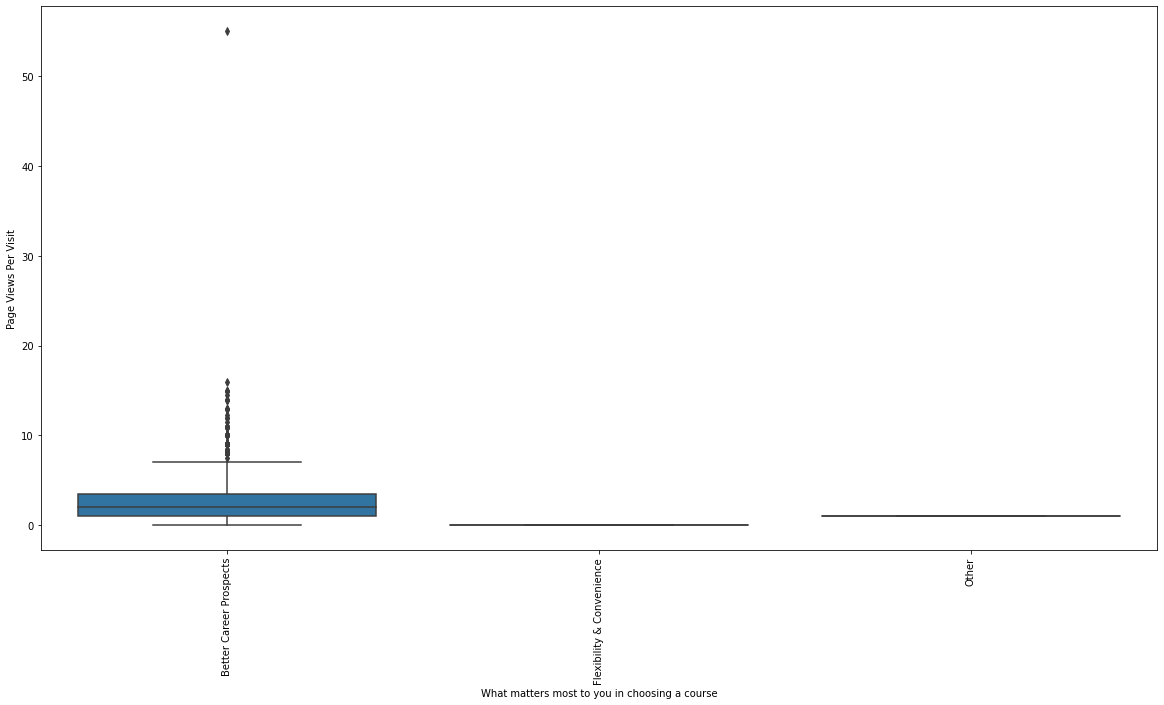

Boxplot Page Views Per Visit Vs Search


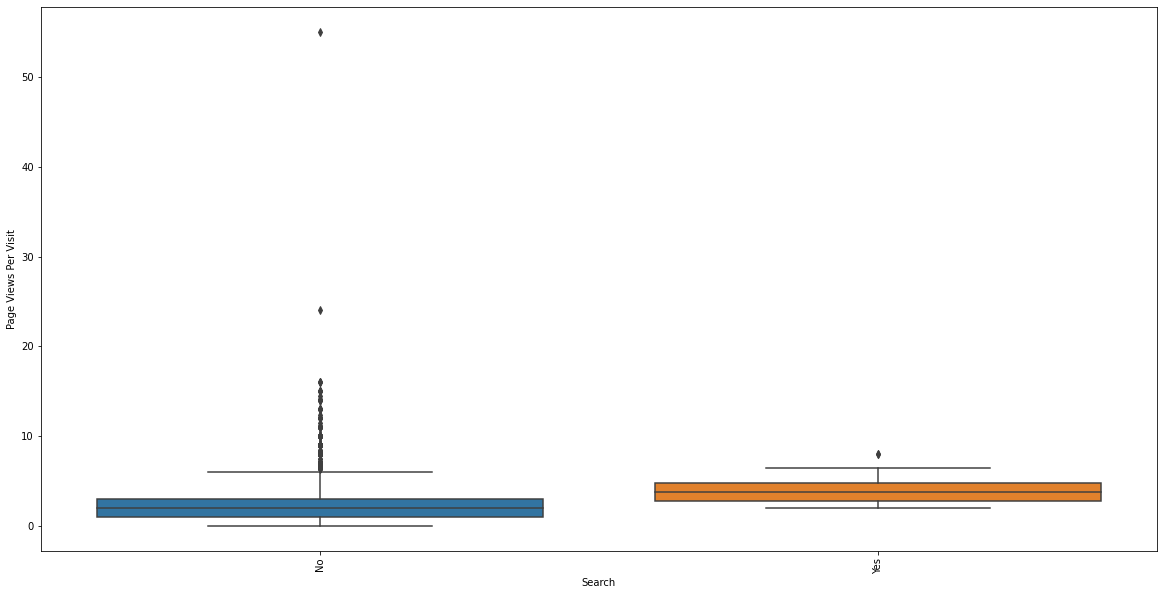

Boxplot Page Views Per Visit Vs Magazine


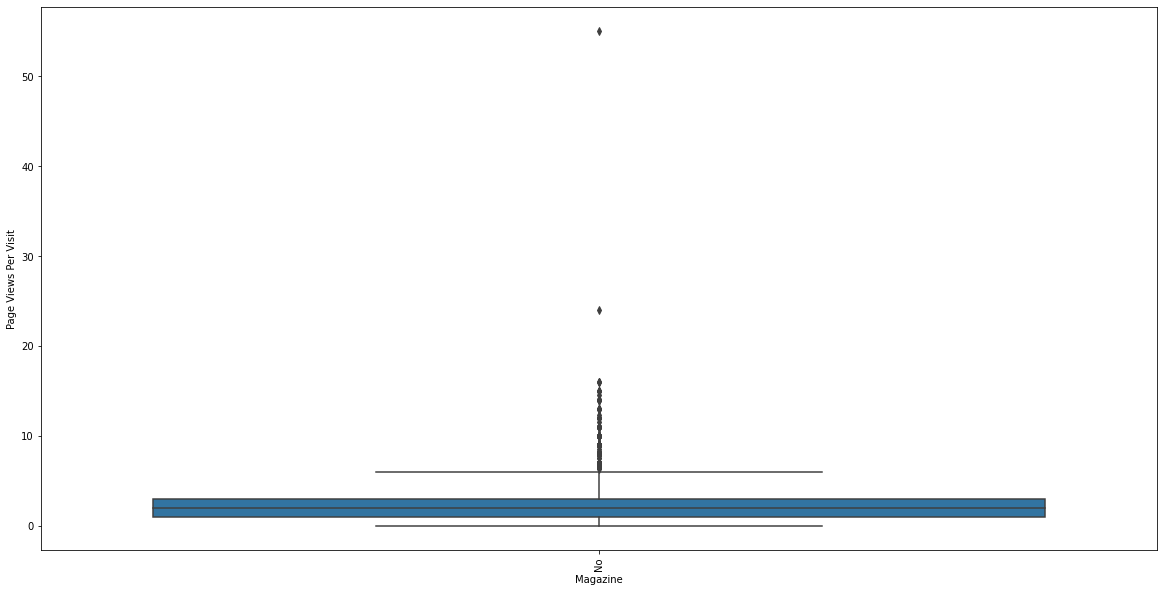

Boxplot Page Views Per Visit Vs Newspaper Article


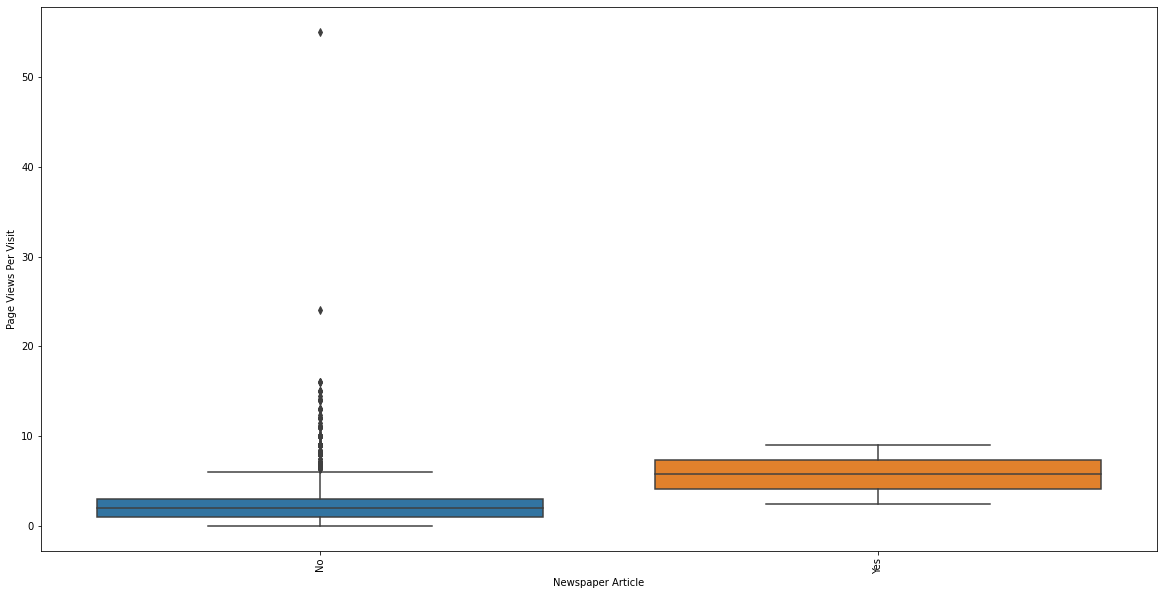

Boxplot Page Views Per Visit Vs X Education Forums


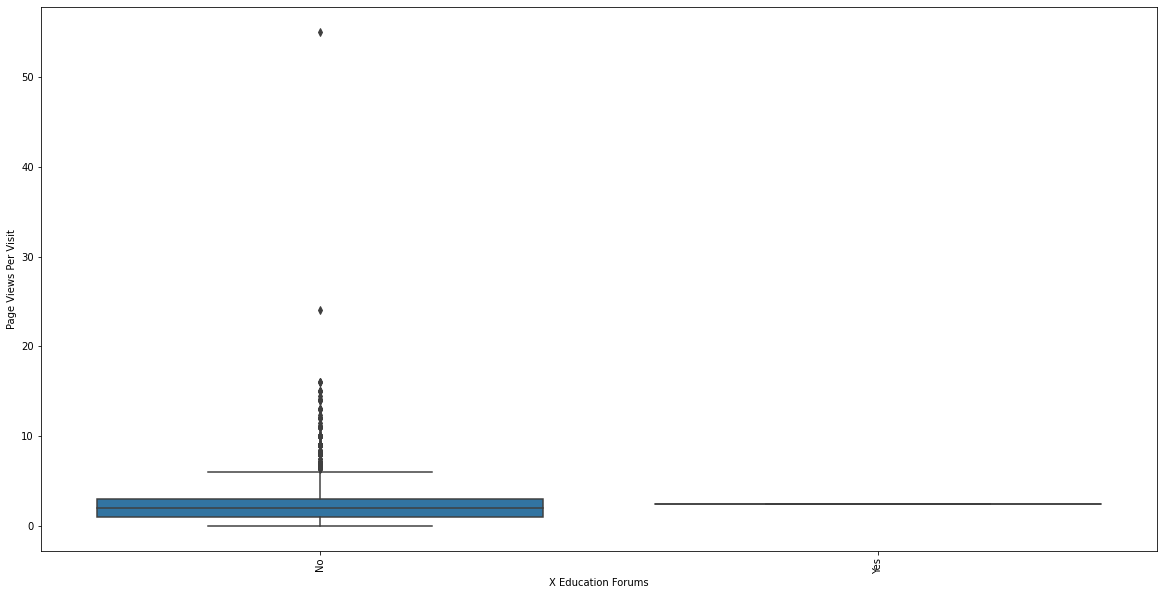

Boxplot Page Views Per Visit Vs Newspaper


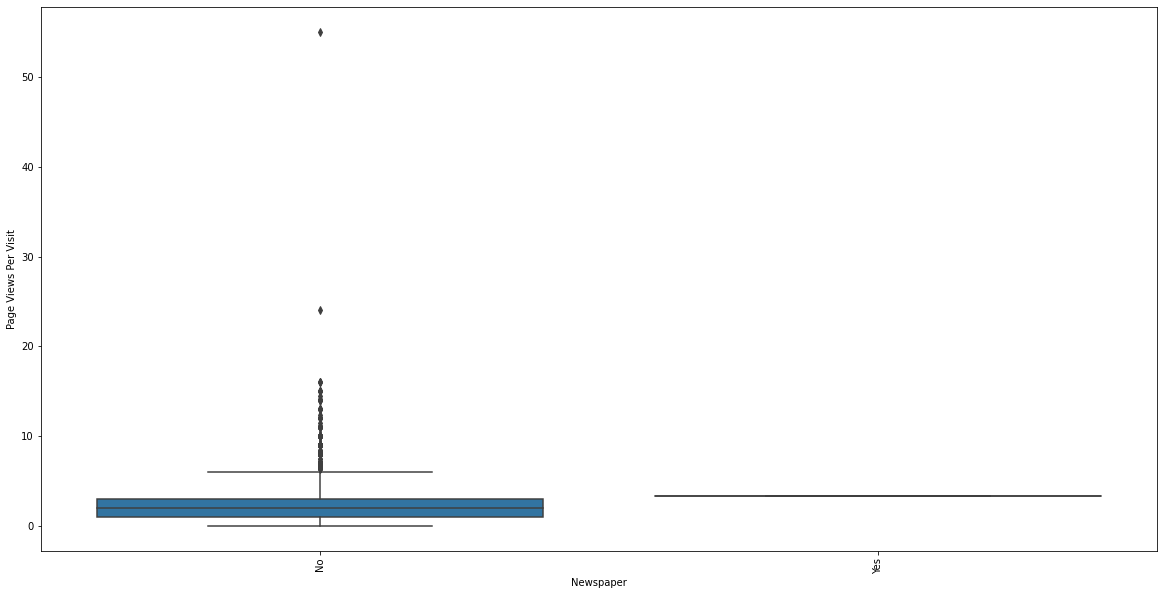

Boxplot Page Views Per Visit Vs Digital Advertisement


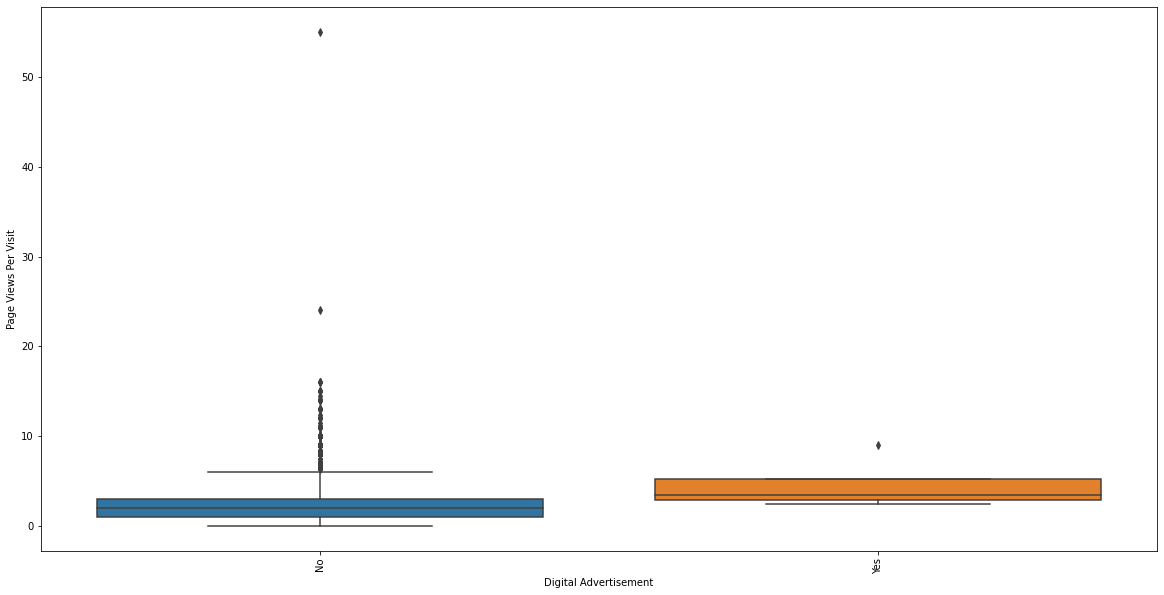

Boxplot Page Views Per Visit Vs Through Recommendations


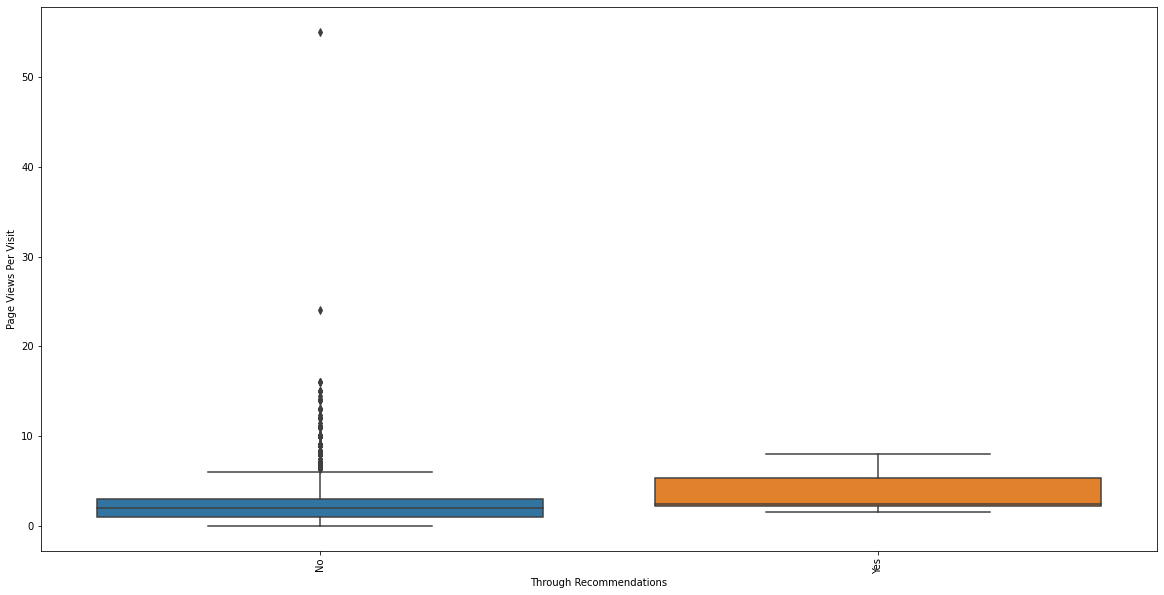

Boxplot Page Views Per Visit Vs Receive More Updates About Our Courses


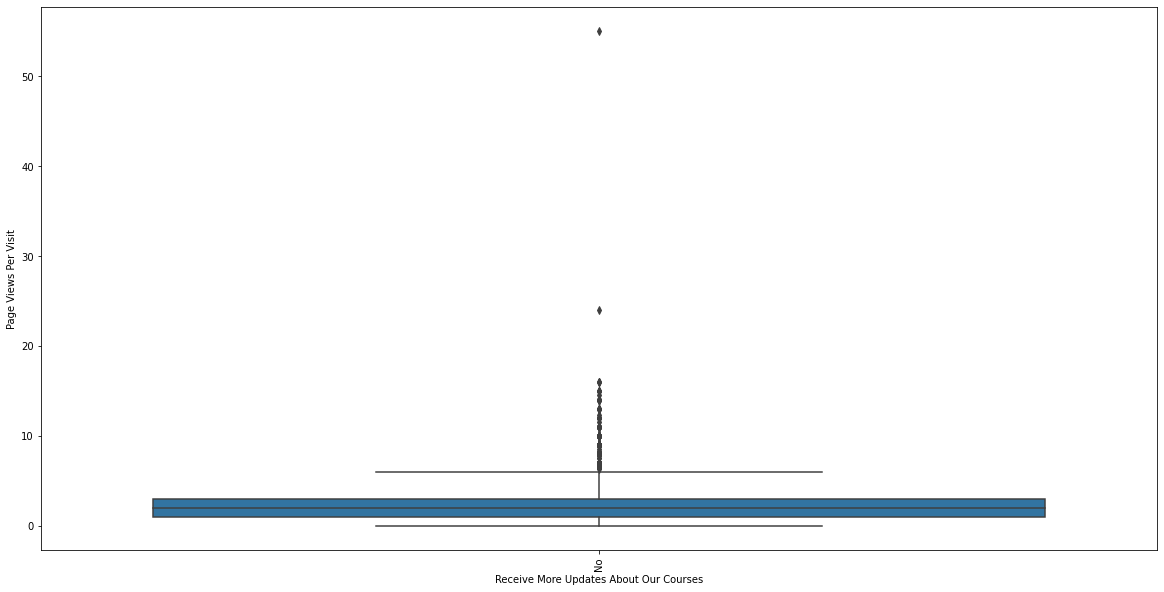

Boxplot Page Views Per Visit Vs Tags


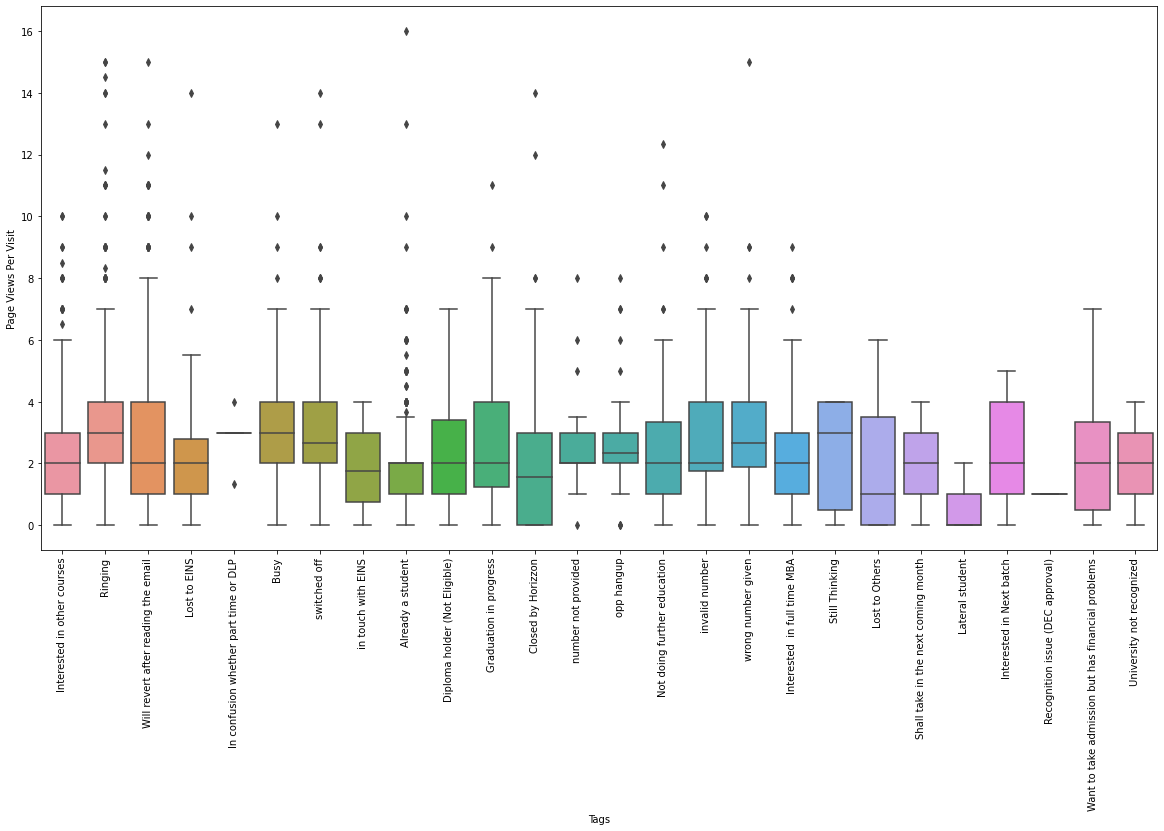

Boxplot Page Views Per Visit Vs Lead Quality


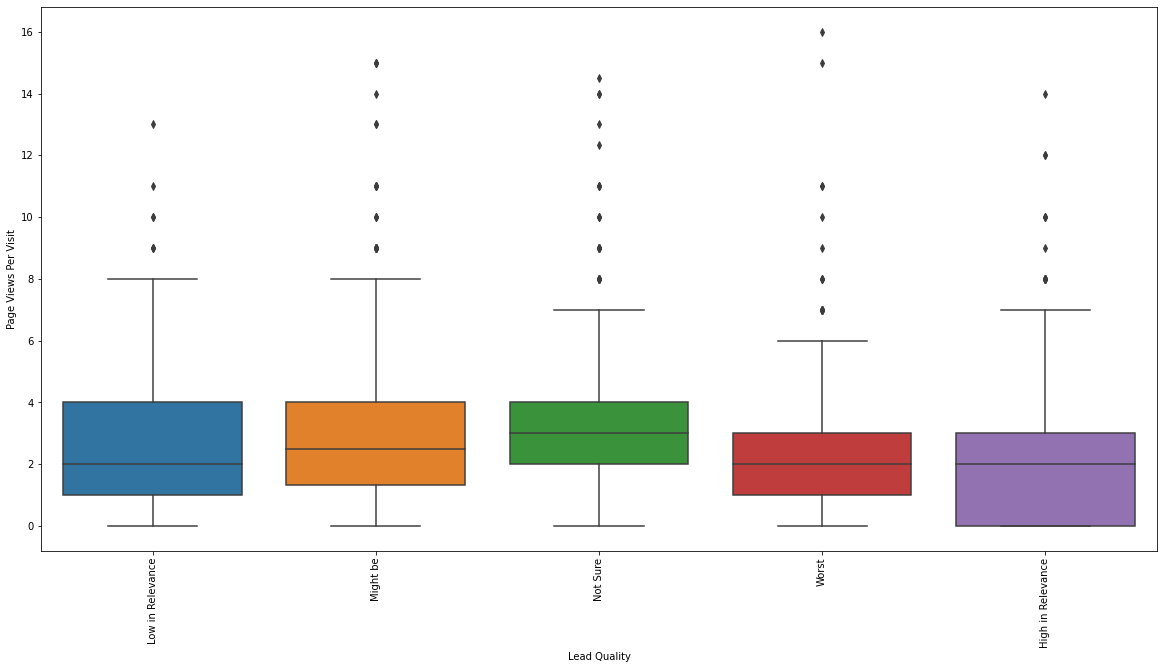

Boxplot Page Views Per Visit Vs Update me on Supply Chain Content


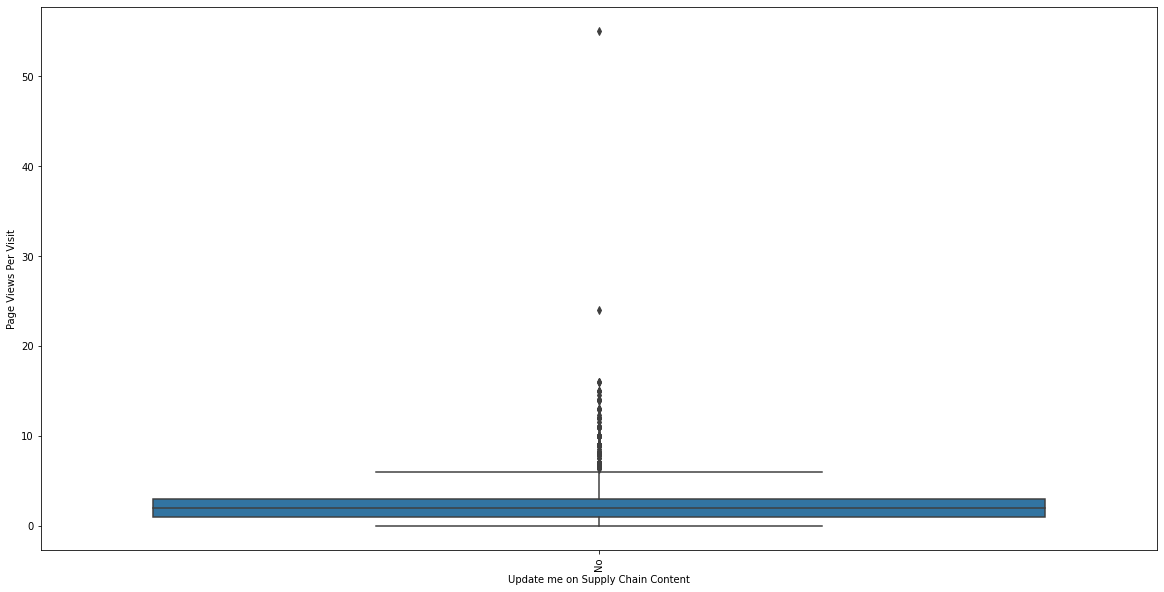

Boxplot Page Views Per Visit Vs Get updates on DM Content


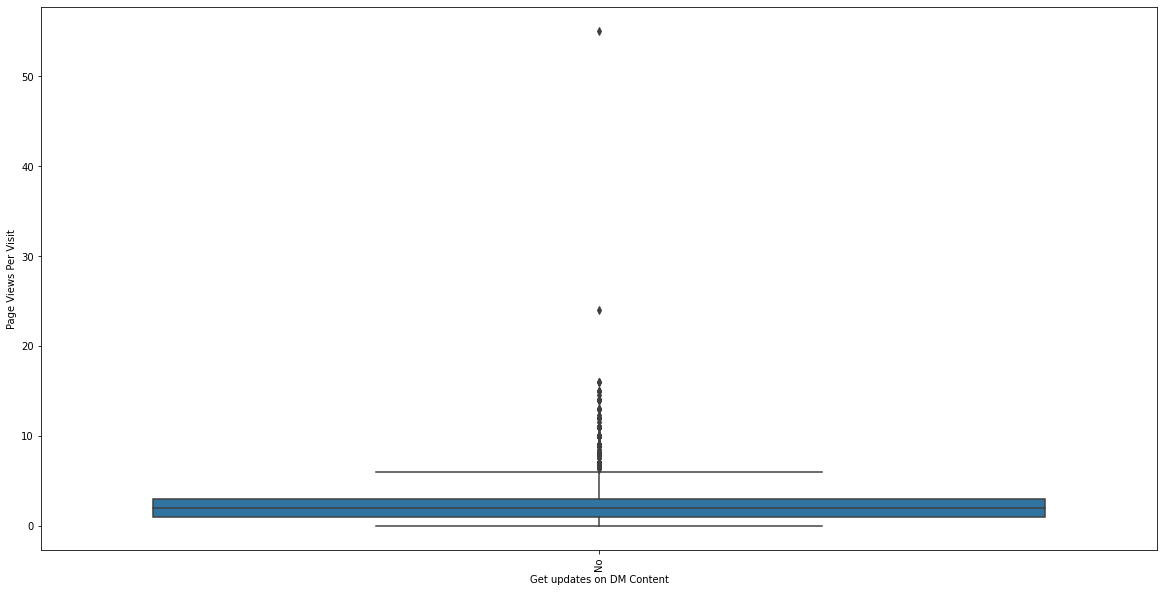

Boxplot Page Views Per Visit Vs Lead Profile


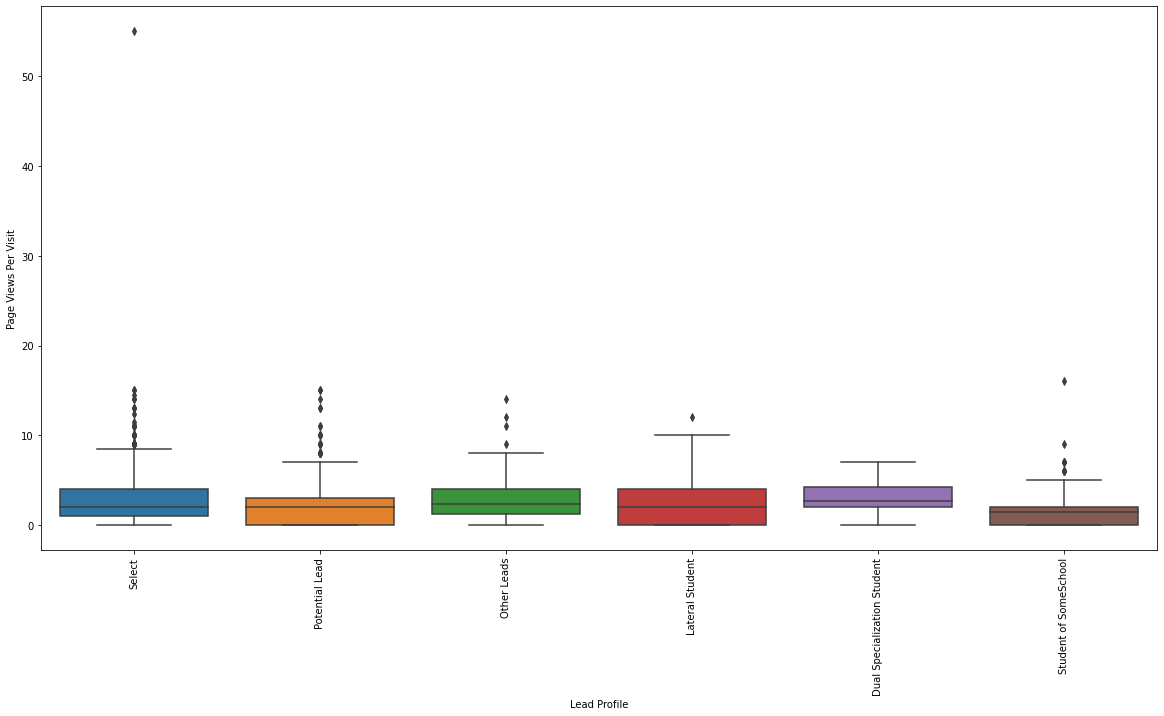

Boxplot Page Views Per Visit Vs City


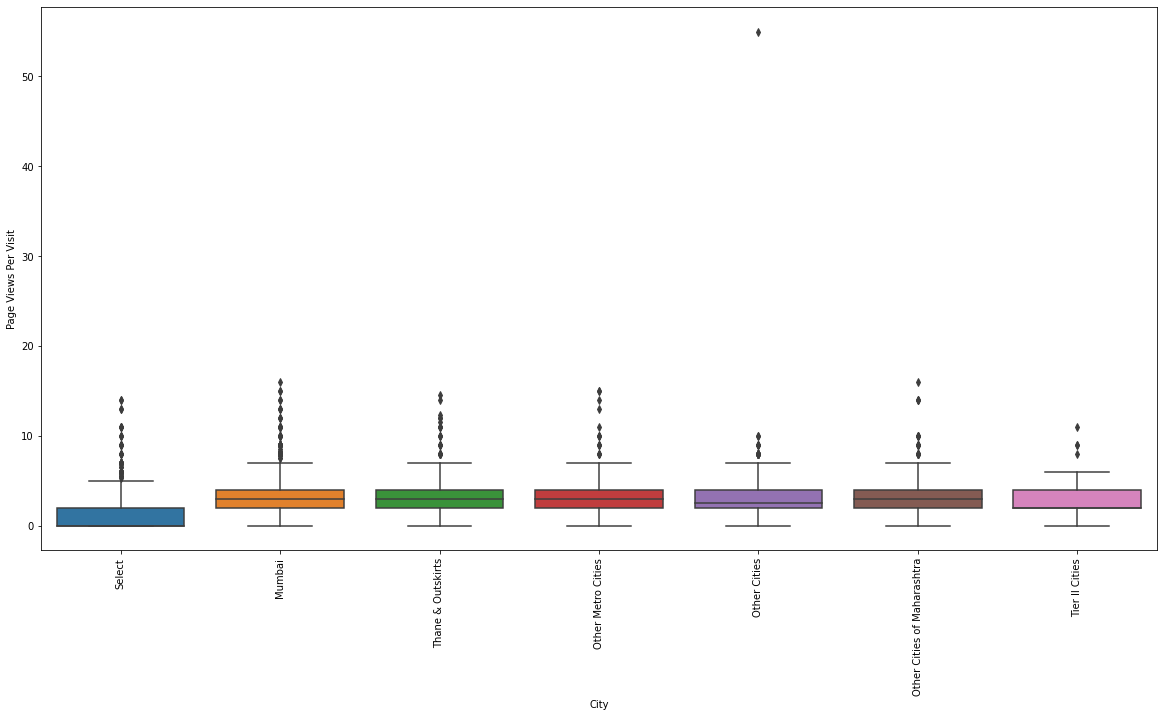

Boxplot Page Views Per Visit Vs I agree to pay the amount through cheque


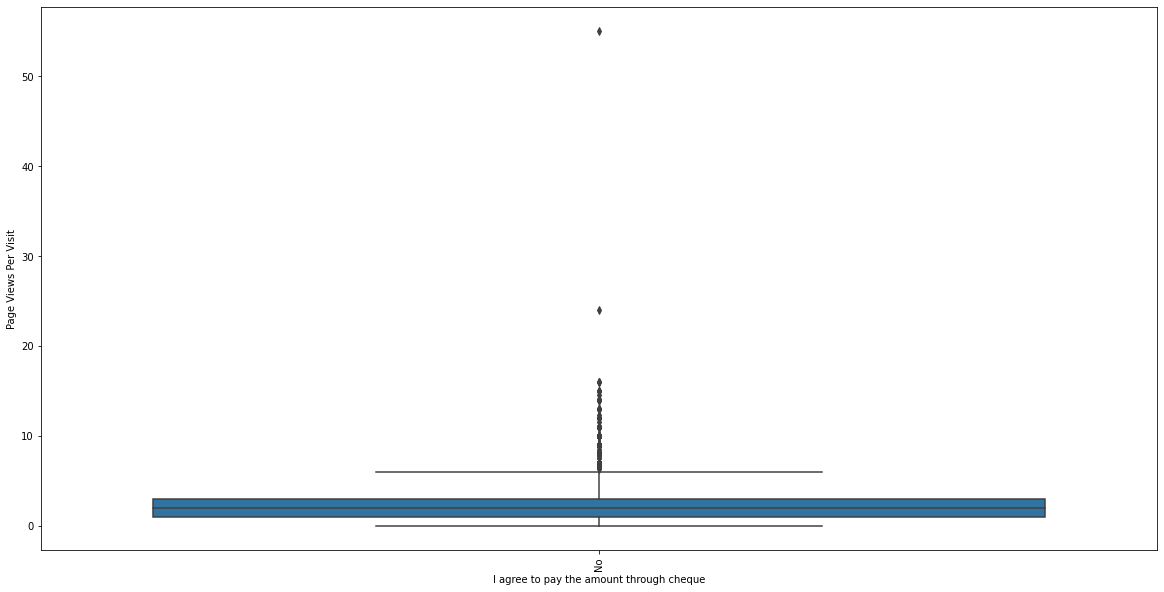

Boxplot Page Views Per Visit Vs A free copy of Mastering The Interview


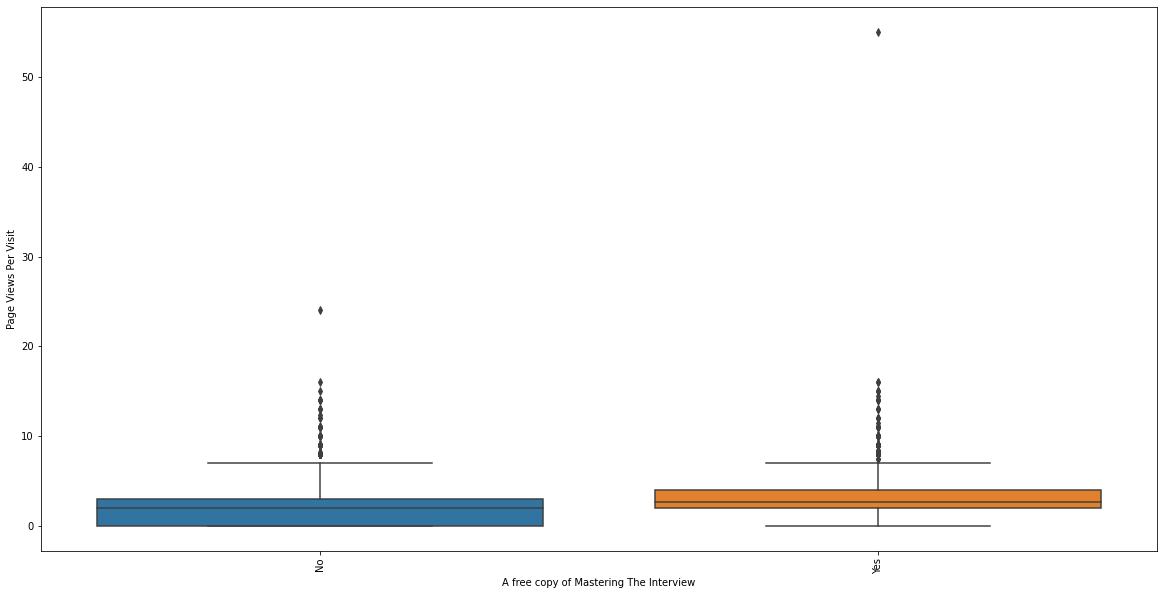

Boxplot Page Views Per Visit Vs Last Notable Activity


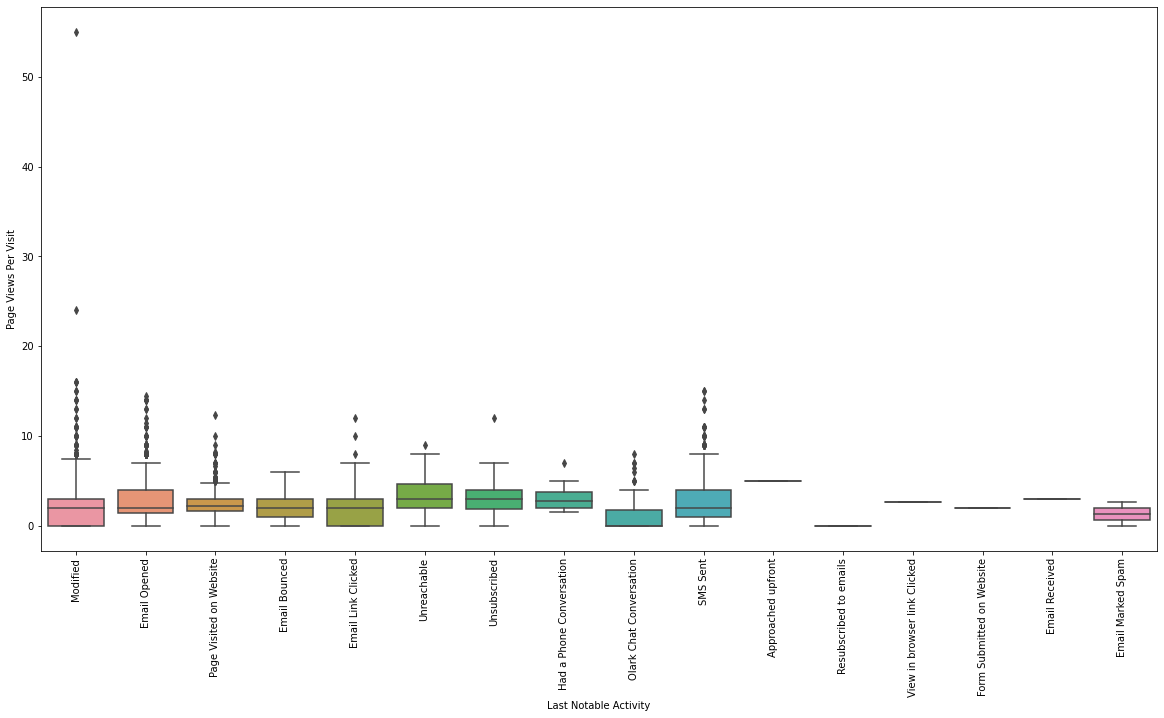

In [11]:
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot",i,"Vs",j)
        plt.figure(figsize=(20, 10))
        sb.boxplot(data=df, x=j,y=i)
        plt.xticks(rotation=90)
        plt.show()
        

ScatterPlot TotalVisits Vs Total Time Spent on Website


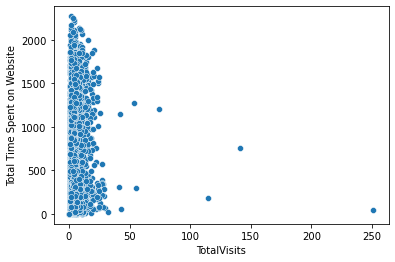

ScatterPlot TotalVisits Vs Page Views Per Visit


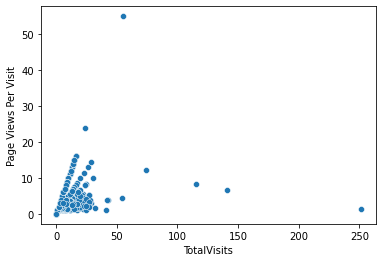

ScatterPlot Total Time Spent on Website Vs TotalVisits


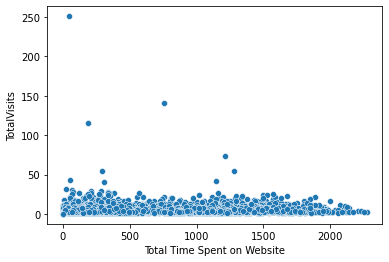

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


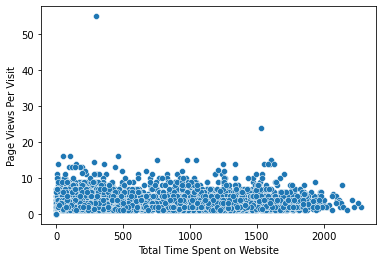

ScatterPlot Page Views Per Visit Vs TotalVisits


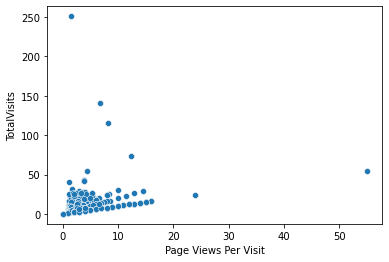

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


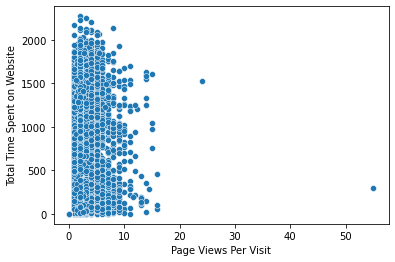

In [12]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sb.scatterplot(data=df, x=i,y=j)
            plt.show()

### Multivariate Analysis

<AxesSubplot:>

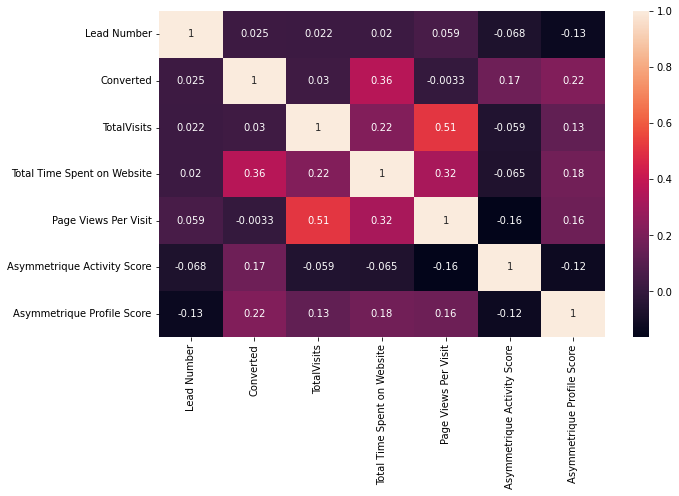

In [13]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(),annot=True)

## Data Cleaning

In [14]:
# making a function to find percentage of missing values in each of the column.
def find_null(df):
    return 100*df.isnull().mean()

In [15]:
# From above eda graph we are dropping below columns as they are irrelavant in further analysis.

df=df.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [16]:
df.shape

(9240, 28)

In [17]:
# Creating a for loop and listing the columns having 'Select'
have_select = []
for i in df.columns:
    if len(df[i].isin(['Select']).unique())>1:
        have_select.append(i)
        


In [18]:
print(have_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile']


In [19]:
# now replacing 'Select' category with null values

for i in have_select:
    df[i] = df[i].replace('Select',np.NaN)

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [20]:
find_null(df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [21]:
#dropping columns having missing values more than 40%
above_40 = list(round(100*(df.isnull().sum()/len(df.index)), 2)[round(100*(df.isnull().sum()/len(df.index)), 2) > 40].index)
df=df.drop(above_40, axis =1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [22]:
#checking shape of data set after removing columns
df.shape

(9240, 21)

In [23]:
# finding columns having missing values above 0.

above_0= list(round(100*(df.isnull().sum()/len(df.index)), 2)[round(100*(df.isnull().sum()/len(df.index)), 2) > 0].index)

above_0

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

In [24]:
# Managing Lead Source

print(df['Lead Source'].value_counts())
print('Missing values count->', df['Lead Source'].isna().sum())

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Missing values count-> 36


In [25]:
df['Lead Source'] =df['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
df['Lead Source'] =df['Lead Source'].replace('google','Google')

print(df['Lead Source'].value_counts())
print('Missing values count->',df['Lead Source'].isna().sum())

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
Missing values count-> 36


In [26]:
# Filling missing values to max occuring value.

df['Lead Source'] =df['Lead Source'].replace(np.NaN,'Google')

print(df['Lead Source'].value_counts())
print('Missing values count --->',df['Lead Source'].isna().sum())

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
Missing values count ---> 0


In [27]:
# Managing Specialization

print(df['Specialization'].value_counts())
print('Missing values count->',df['Specialization'].isna().sum())

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
Missing values count-> 3380


In [28]:
# filling missing values with value 'Missing'

df['Specialization'] =df['Specialization'].replace(np.NaN,'Missing')
df['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
# managing column-> What is your current occupation

print(df['What is your current occupation'].value_counts())
print('Missing values count --->',df['What is your current occupation'].isna().sum())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Missing values count ---> 2690


In [30]:
# filling missing values with value 'Missing'

df['What is your current occupation'] =df['What is your current occupation'].replace(np.NaN,'Missing')
df['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
# managing column ->What matters most to you in choosing a course

print(df['What matters most to you in choosing a course'].value_counts())
print('Missing values count --->',df['What matters most to you in choosing a course'].isna().sum())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Missing values count ---> 2709


In [32]:
# Dropping this column as only one value came form too many times.
df=df.drop('What matters most to you in choosing a course', axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [33]:
find_null(df)

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
What is your current occupation            0.000000
Search                                     0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
Tags                                      36.287879
A free copy of Mastering The Interview     0.000000
Last Notable

In [34]:
miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags']
for i in df[miss_max].columns:
    print(df[i].value_counts())
    print('Missing values count->',df[i].isna().sum())

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
Missing values count-> 137
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.5

In [35]:
# filling all the missing values with label shows max occurences
for i in df[miss_max].columns:
    max_str = df[i].value_counts()[df[i].value_counts() ==df[i].value_counts().max()].index[0]
    df[i] =df[i].fillna(value=max_str)
    print(df[i].value_counts())
    print('Missing values count->',df[i].isna().sum())

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
Missing values count-> 0
0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50 

In [36]:
find_null(df)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [37]:
#checking data set information to check the columns yes/no labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [38]:
yes_no = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
category={"No":0,"Yes":1}    

for i in yes_no:
    df[i]=df[i].map(category)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


### Outlier detection 

In [39]:
# checking the statistical data
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
97%,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


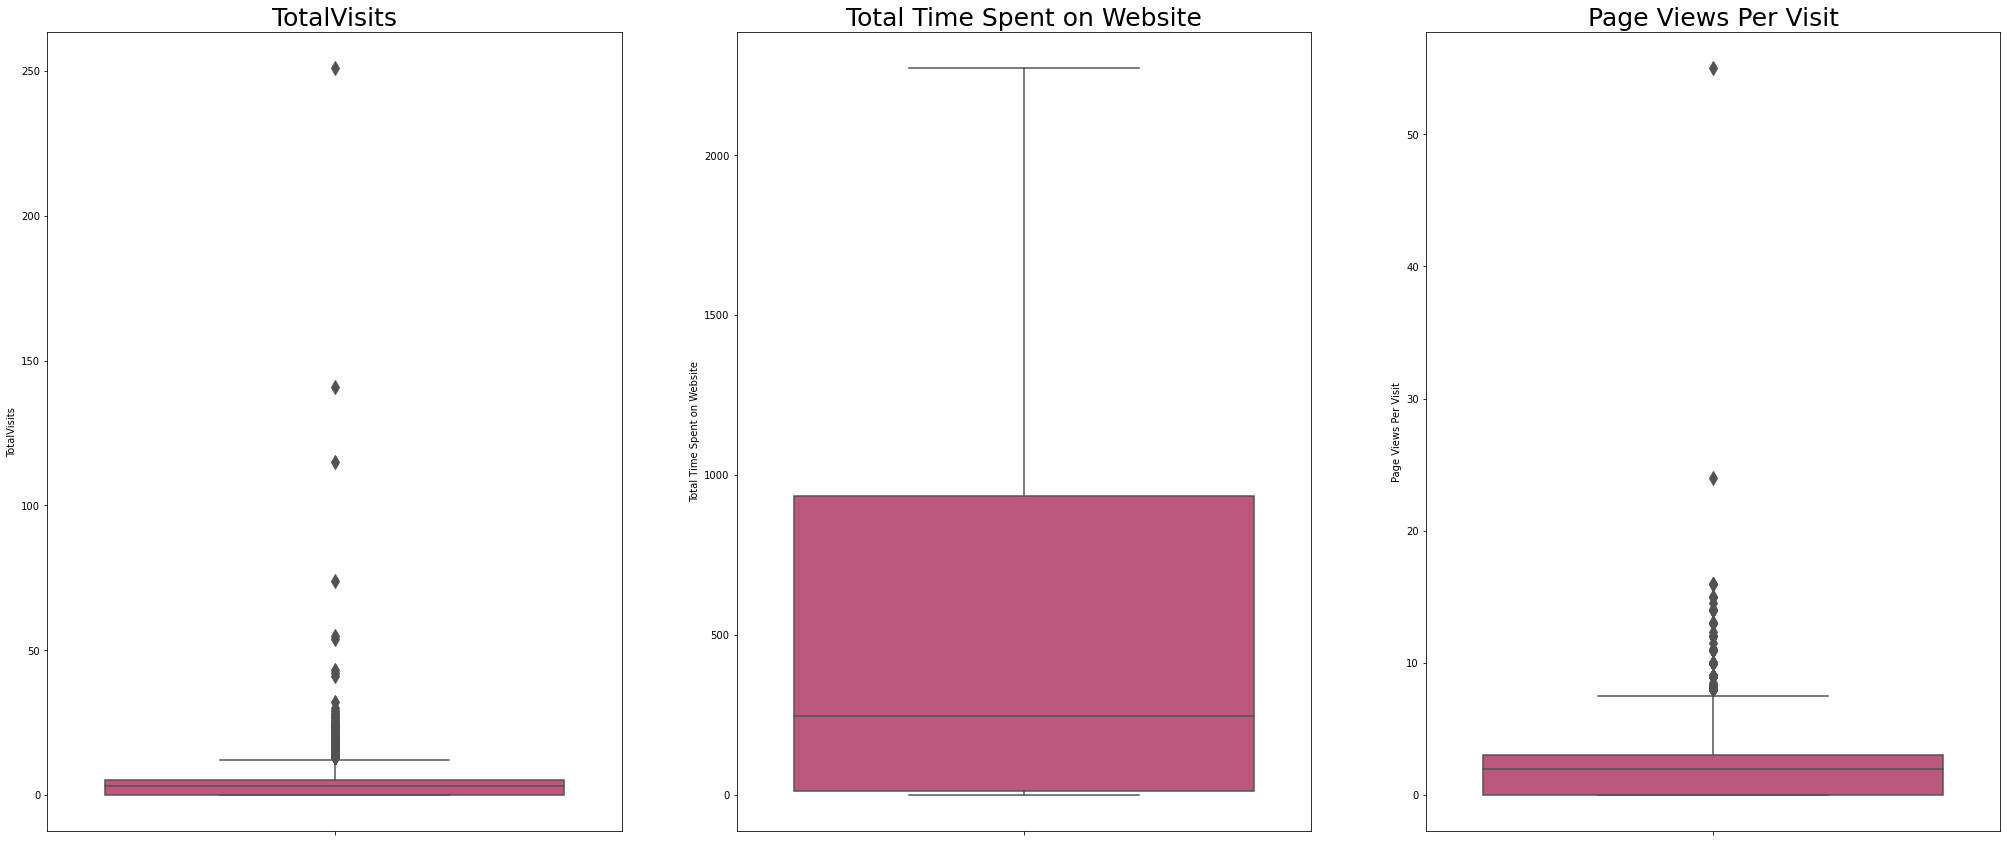

In [40]:
plt.figure(figsize=(35,50))
col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sb.boxplot(y=df[col_title[i]],data=df,palette='plasma',fliersize=10)

In [41]:
# dropping irrelevant column

irrelevant=['Last Activity', 'Tags', 'Last Notable Activity']

df=df.drop(irrelevant,axis=1)

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Missing,Unemployed,0,0,0,0,0,0,0


In [42]:
df.shape

(9240, 17)

## Dummy variablee creation

In [43]:
#Creating a dummy variables for 4 categories and dropping the first level. 

cat_col = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']

#creating dummy variables data set
dum = pd.get_dummies(df[cat_col], drop_first=True)

# Adding these dummies to our original dataset
df=pd.concat([df,dum],axis=1)

#dropping the duplicate columns
df=df.drop(cat_col, axis=1)

#viewing the dataset
df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
#checking statistical data
df.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,0.528788,0.077706,0.005952,0.000108,0.314827,0.189935,0.124892,0.037338,0.057792,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.365801,0.054437,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.291126,0.001732,0.022727,0.606061,0.076407
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,0.499198,0.267722,0.076926,0.010403,0.464472,0.392271,0.330614,0.189598,0.233363,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.481680,0.226891,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.454306,0.041579,0.149041,0.488648,0.265662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000

In [55]:
#checking shape of the data set
df.shape

(9240, 44)

## Train_test_split

In [57]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [58]:
# putting feature varibales in "X" and target variable in "y" 

y=df['Converted'] 
X=df.drop('Converted',1)

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 43)
X_test: (2772, 43)
y_train: (6468,)
y_test: (2772,)


## Scaling

In [62]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [63]:
# Now, Scaling  'Total Time Spent on Website' variables with standard scaler and fitting on X_train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-1.609377e-16,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843,0.528139,0.079468,0.005102,0.000155,0.320810,0.190167,0.121058,0.036178,0.060297,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613
std,0.268799,0.017583,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282,0.499246,0.270489,0.071252,0.012434,0.466824,0.392463,0.326219,0.186748,0.238054,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.482162,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582
min,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.634138e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-4.352528e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,8.098906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [66]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 38.54


## Model Building

In [67]:
# importing statmodels library for statistical summary and model creation

import statsmodels.api as sm

In [68]:
# Importing RFE and logistic regression libraries from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# creating an object
logreg = LogisticRegression() 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create a logistic regression model
logreg = LogisticRegression()

# Create an RFE model with logistic regression and select top 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model using training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [78]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 27),
 ('Newspaper Article', False, 5),
 ('X Education Forums', False, 14),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 10),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other', False, 7),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-Business', False, 20),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 29),
 ('Specialization_Healthcare Management', False, 22),
 ('Specialization_Hospitality Managemen

In [79]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed'], dtype='object')

In [80]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Newspaper,Digital Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Specialization_Hospitality Management,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Working Professional
1871,0,-0.885371,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,0,0.005716,0,0,1,0,0,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,0,1,0,0,1,0,0,0,0
8105,0,1.365219,0,0,1,0,0,0,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,0,0,1,0,0,1,0,0,0,0


In [81]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()                                                       #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.3
Date:                Mon, 05 Jun 2023   Deviance:                       5724.6
Time:                        14:00:21   Pearson chi2:                 7.90e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0442      0.119      0.373      0.709      -0.188       0.277
Do Not Email                                            -1.3183      0.161     -8.178      0.000      -1.634      -1.002
Total Time Spent on Website                              1.0793      0.038     28.147      0.000       1.004       1.154
Newspaper                                              -24.4151   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -20.9702   2.76e+04     -0.001      0.999    -5.4e+04     5.4e+04
Lead Origin_Landing Page Submission                     -0.8179      0.123     -6.647      0.000      -1.059      -0.577
Lead Origin_Lead Add Form                                4.3947      0.368     11.935      0.000       3.673       5.116
Lead Origin_Lead Import                                 -0.5152      0.532     -0.969      0.333      -1.558       0.527
Lead Source_Olark Chat                                   0.8804      0.114      7.698      0.000       0.656       1.105
Lead Source_Reference                                   -1.2448      0.408     -3.051      0.002      -2.044      -0.445
Specialization_Hospitality Management                   -0.9569      0.318     -3.008      0.003      -1.580      -0.333
Specialization_Missing                                  -0.9151      0.118     -7.762      0.000      -1.146      -0.684
What is your current occupation_Housewife               22.2831   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.1766      0.083    -14.111      0.000      -1.340      -1.013
What is your current occupation_Other                   -0.9055      0.796     -1.138      0.255      -2.465       0.654
What is your current occupation_Working Professional     2.4050      0.184     13.093      0.000       2.045       2.765
========================================================================================================================
"""

In [82]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
5,Lead Origin_Lead Add Form,4.51
8,Lead Source_Reference,4.35
10,Specialization_Missing,2.05
7,Lead Source_Olark Chat,1.89
12,What is your current occupation_Missing,1.59
4,Lead Origin_Landing Page Submission,1.36
1,Total Time Spent on Website,1.23
14,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
6,Lead Origin_Lead Import,1.02


In [83]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','What is your current occupation_Housewife'],1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.1
Date:                Mon, 05 Jun 2023   Deviance:                       5734.1
Time:                        14:01:23   Pearson chi2:                 7.92e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3578
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0476      0.119      0.401      0.688      -0.185       0.280
Do Not Email                                            -1.3222      0.161     -8.203      0.000      -1.638      -1.006
Total Time Spent on Website                              1.0786      0.038     28.148      0.000       1.004       1.154
Newspaper                                              -23.4201   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                  -19.9747   1.67e+04     -0.001      0.999   -3.28e+04    3.27e+04
Lead Origin_Landing Page Submission                     -0.8147      0.123     -6.623      0.000      -1.056      -0.574
Lead Origin_Lead Add Form                                4.3946      0.368     11.933      0.000       3.673       5.116
Lead Origin_Lead Import                                 -0.5162      0.532     -0.971      0.332      -1.558       0.526
Lead Source_Olark Chat                                   0.8800      0.114      7.696      0.000       0.656       1.104
Lead Source_Reference                                   -1.2350      0.408     -3.027      0.002      -2.035      -0.435
Specialization_Hospitality Management                   -0.9620      0.318     -3.024      0.002      -1.586      -0.339
Specialization_Missing                                  -0.9179      0.118     -7.787      0.000      -1.149      -0.687
What is your current occupation_Missing                 -1.1796      0.083    -14.151      0.000      -1.343      -1.016
What is your current occupation_Other                   -0.9094      0.796     -1.143      0.253      -2.469       0.650
What is your current occupation_Working Professional     2.3996      0.184     13.065      0.000       2.040       2.760
========================================================================================================================
"""

In [84]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,4.51
8,Lead Source_Reference,4.35
10,Specialization_Missing,2.05
7,Lead Source_Olark Chat,1.89
11,What is your current occupation_Missing,1.59
4,Lead Origin_Landing Page Submission,1.36
1,Total Time Spent on Website,1.23
13,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
6,Lead Origin_Lead Import,1.02


In [85]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_2.drop(['const','Specialization_Missing'],1)

# Creating a new model 3

X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2898.0
Date:                Mon, 05 Jun 2023   Deviance:                       5796.0
Time:                        14:01:47   Pearson chi2:                 7.46e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3516
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6581      0.076     -8.701      0.000      -0.806      -0.510
Do Not Email                                            -1.3345      0.160     -8.323      0.000      -1.649      -1.020
Total Time Spent on Website                              1.1019      0.038     28.839      0.000       1.027       1.177
Newspaper                                              -23.4555   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                  -20.2263   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
Lead Origin_Landing Page Submission                     -0.1302      0.085     -1.541      0.123      -0.296       0.035
Lead Origin_Lead Add Form                                4.2817      0.366     11.686      0.000       3.564       5.000
Lead Origin_Lead Import                                 -0.4198      0.524     -0.801      0.423      -1.447       0.608
Lead Source_Olark Chat                                   0.8629      0.112      7.727      0.000       0.644       1.082
Lead Source_Reference                                   -0.8257      0.403     -2.049      0.040      -1.615      -0.036
Specialization_Hospitality Management                   -0.8330      0.313     -2.660      0.008      -1.447      -0.219
What is your current occupation_Missing                 -1.2595      0.083    -15.261      0.000      -1.421      -1.098
What is your current occupation_Other                   -0.7311      0.767     -0.953      0.341      -2.235       0.773
What is your current occupation_Working Professional     2.5411      0.181     14.061      0.000       2.187       2.895
========================================================================================================================
"""

In [86]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Lead Source_Reference,4.25
5,Lead Origin_Lead Add Form,4.19
10,What is your current occupation_Missing,1.42
7,Lead Source_Olark Chat,1.36
4,Lead Origin_Landing Page Submission,1.34
1,Total Time Spent on Website,1.23
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.10
9,Specialization_Hospitality Management,1.02
2,Newspaper,1.00


### Predicting the train dataset with our final model

In [87]:
#predicting train dataset with final model

y_train_pred=logr3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.316316,1871
6795,0,0.313886,6795
3516,0,0.364234,3516
8105,0,0.671730,8105
3934,0,0.316316,3934


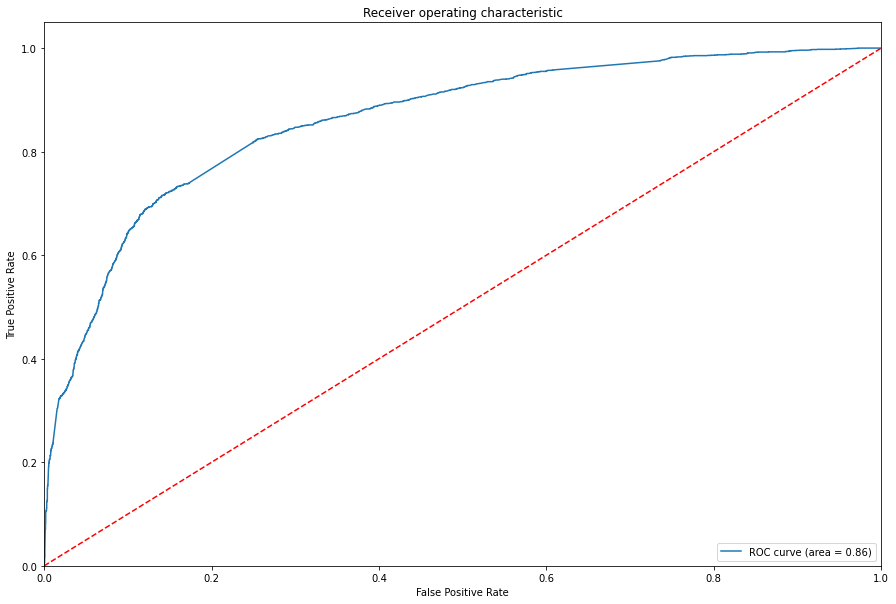

In [89]:
#ROC Curve Plotting
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

# Calling the roc curve function for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [90]:
numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.316316,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.313886,6795,1,1,1,1,0,0,0,0,0,0
3516,0,0.364234,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.671730,8105,1,1,1,1,1,1,1,0,0,0
3934,0,0.316316,3934,1,1,1,1,0,0,0,0,0,0


In [91]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.524119    0.982968     0.241379
0.2          0.2  0.694805    0.898621     0.569215
0.3          0.3  0.772418    0.825223     0.739880
0.4          0.4  0.804267    0.703569     0.866317
0.5          0.5  0.802876    0.652068     0.895802
0.6          0.6  0.789425    0.580697     0.918041
0.7          0.7  0.766388    0.486212     0.939030
0.8          0.8  0.738250    0.369019     0.965767
0.9          0.9  0.695733    0.214517     0.992254


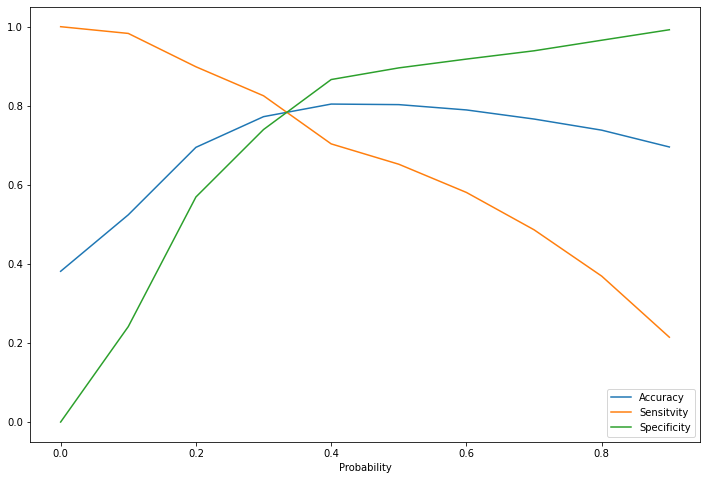

In [92]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [93]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.316316,1871,1,1,1,1,0,0,0,0,0,0,1
6795,0,0.313886,6795,1,1,1,1,0,0,0,0,0,0,1
3516,0,0.364234,3516,1,1,1,1,0,0,0,0,0,0,1
8105,0,0.671730,8105,1,1,1,1,1,1,1,0,0,0,1
3934,0,0.316316,3934,1,1,1,1,0,0,0,0,0,0,1


In [94]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[2961, 1041],
       [ 431, 2035]], dtype=int64)

In [95]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_train)  
print('Specificity:',Specificity_train) 

Sensitivity: 82.52
Specificity: 73.99


In [96]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 66.16
Recall: 82.52


In [100]:
# Checking accuracy for train dataset 
from sklearn import metrics

Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 77.24


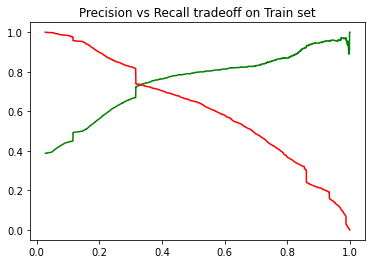

In [101]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

------
## Prediction on the test dataset


In [102]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [103]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr3.predict(X_test_final)      # Predicting the final test set

In [104]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.298429,4269
2376,1,0.860848,2376
7766,1,0.736219,7766
9199,0,0.316316,9199
4359,1,0.860848,4359


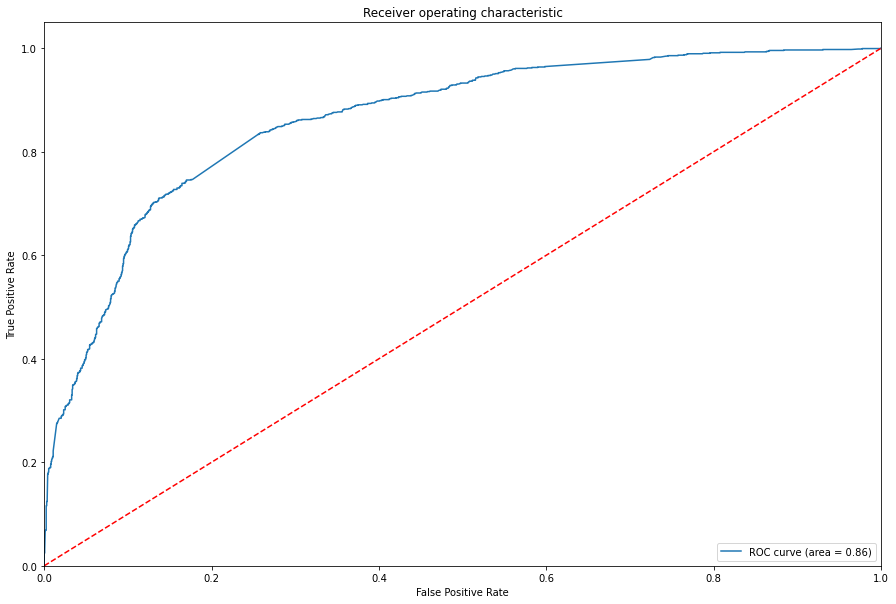

In [105]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

## Model Evaluation

In [106]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.298429,4269,0
2376,1,0.860848,2376,1
7766,1,0.736219,7766,1
9199,0,0.316316,9199,1
4359,1,0.860848,4359,1


In [107]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1227,  450],
       [ 177,  918]], dtype=int64)

In [108]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test) 

Sensitivity: 83.84
Specificity: 73.17


In [109]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)     

Precision: 67.11
Recall: 83.84


In [110]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 77.38


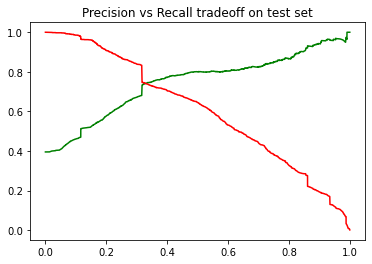

In [111]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [112]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  74.54323995127893


In [114]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=df.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.298429,4269,0,0,30
2376,1,0.860848,2376,1,0,86
7766,1,0.736219,7766,1,0,74
9199,0,0.316316,9199,1,0,32
4359,1,0.860848,4359,1,0,86
9186,1,0.370519,9186,1,0,37
1631,1,0.569179,1631,1,0,57
8963,1,0.250993,8963,0,0,25
8007,0,0.088683,8007,0,0,9
5324,1,0.191343,5324,0,0,19


#### Conclusion
##### 1)Lead Origin_Lead Add Form
##### 2)Total Time Spent on Website
##### 3)What is your current occupation

##### These all above features are the most important features in lead conversion aspect.